In [1]:
from explorerl.utils import *
from explorerl.QLearning import *

In [2]:
import numpy as np
import torch
import tensorflow as tf
import gym
import sys

# Linear QLearning on MountainCar 

In [3]:
env = gym.make("MountainCar-v0")
e = Env_Wrapper(env)

## With Featurizing

In [4]:
scaler, featurizer = create_scaler_featurizer(env,make_scaler=True)

### Tensorflow

In [5]:
qtf = QLearningTf(learning_rate=0.001,use_bias=True,featurizer=featurizer,scaler=scaler)

  0%|          | 0/200 [00:00<?, ?it/s]

Model Created!


Epsilon : 2.505568501063291e-175, Num Steps : 136, Avg Reward with Window Size 100 : -124.42: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]           
/Users/shyam/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/shyam/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


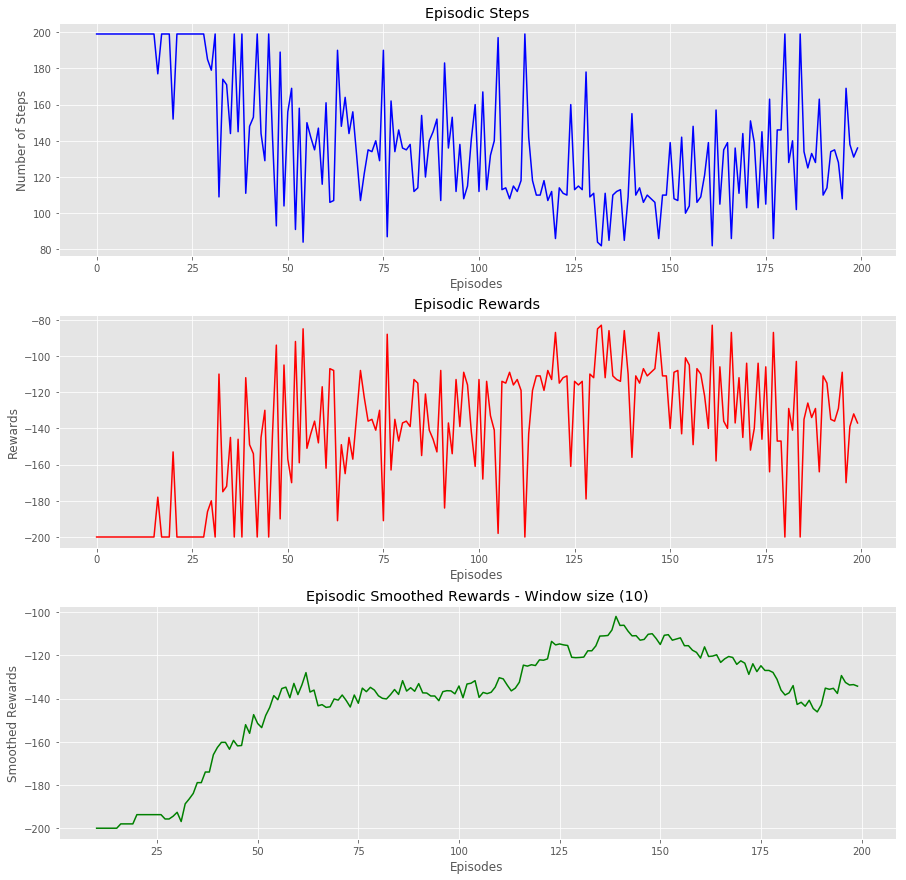

Total reward for episode 0: -127.0



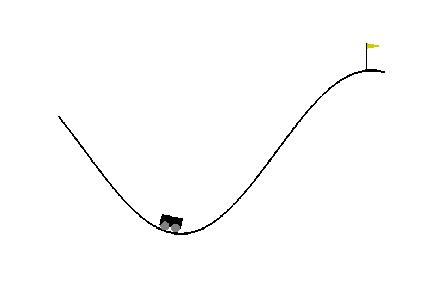
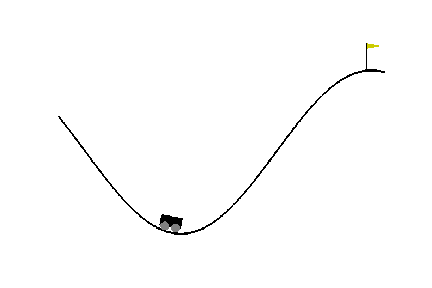
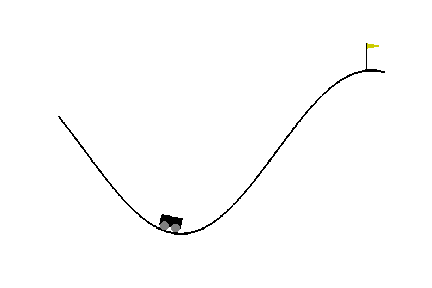
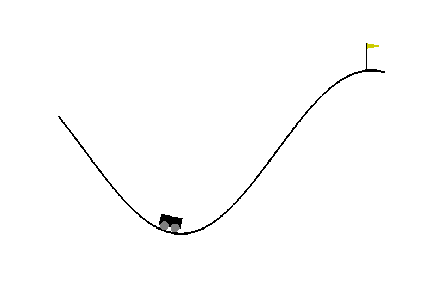
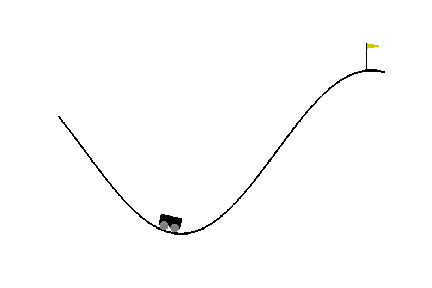
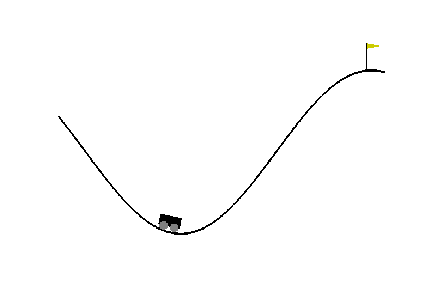
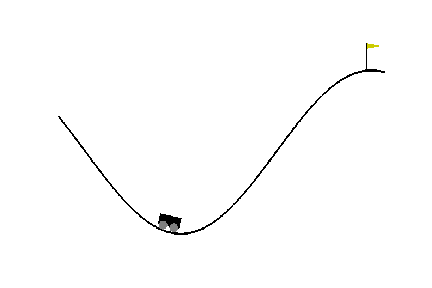
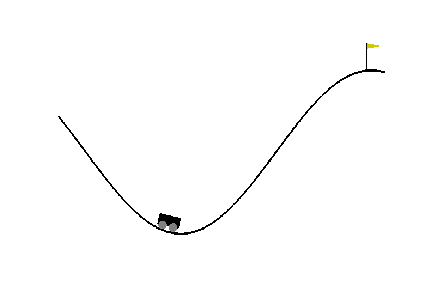
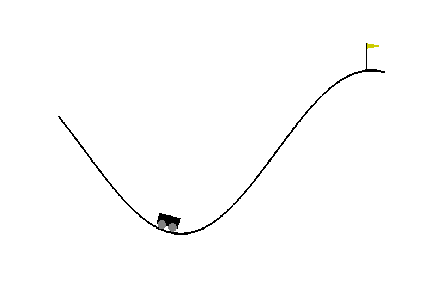
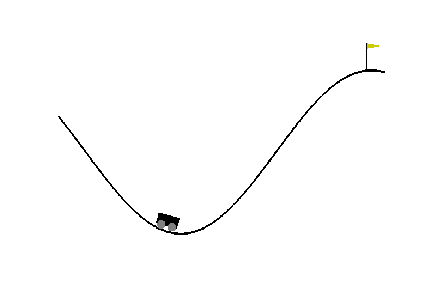
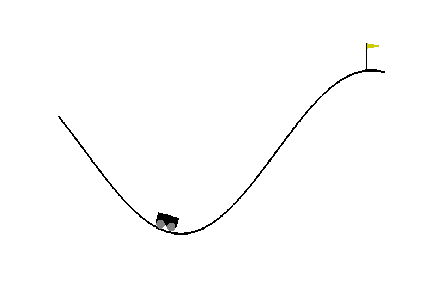
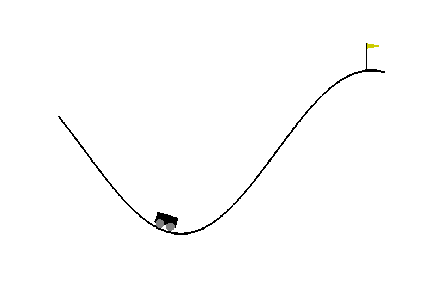
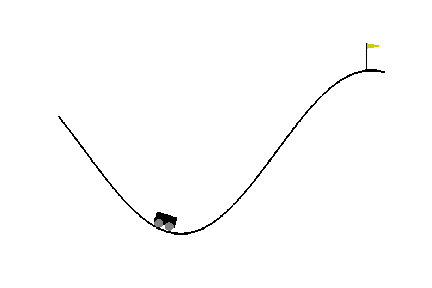
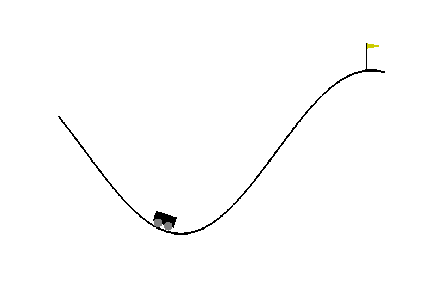
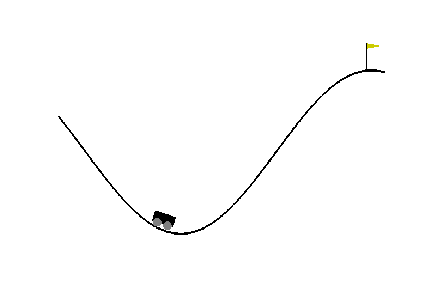
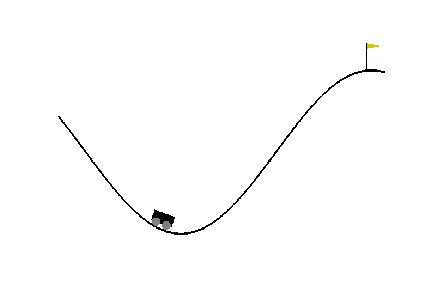
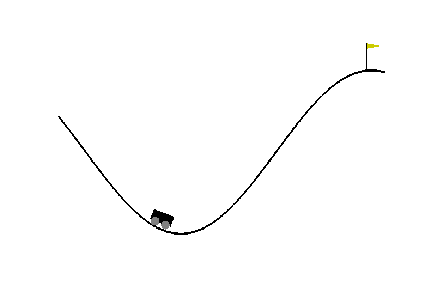
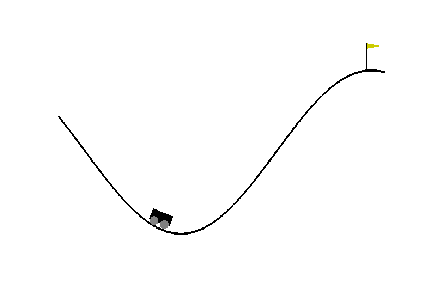
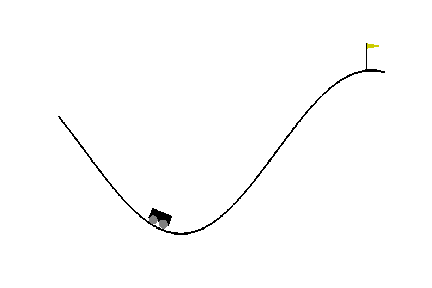
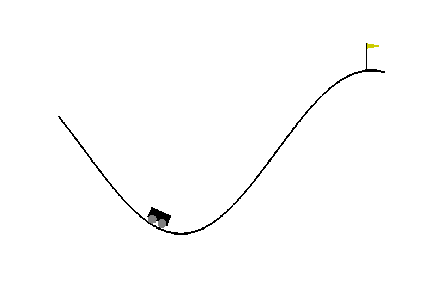
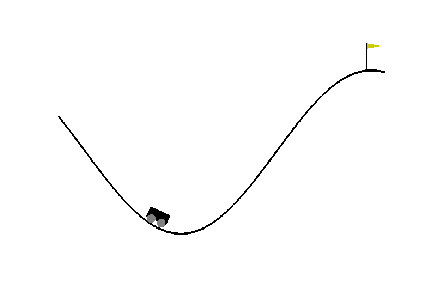
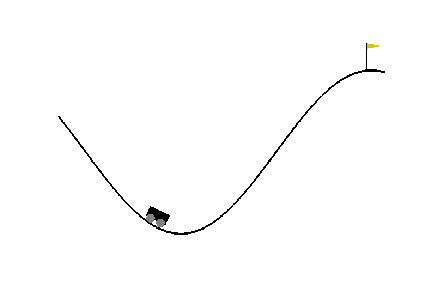
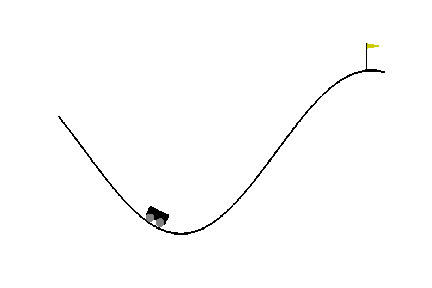
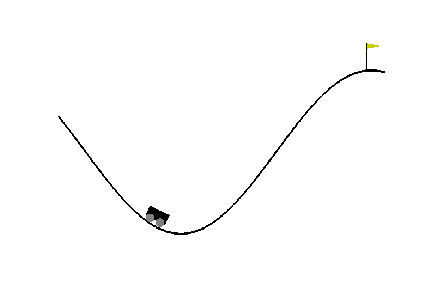
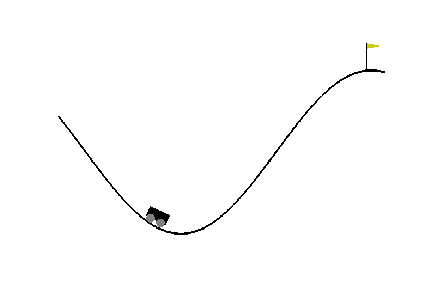
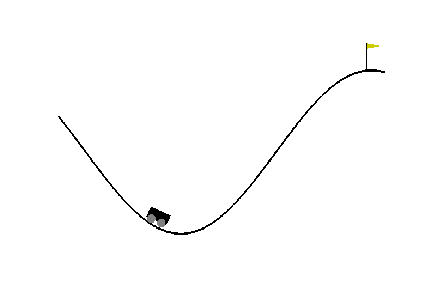
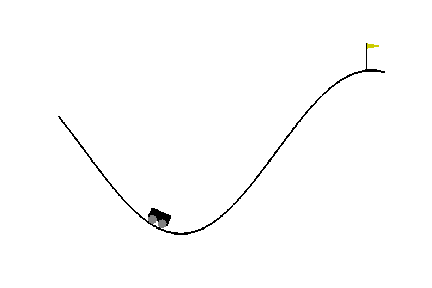
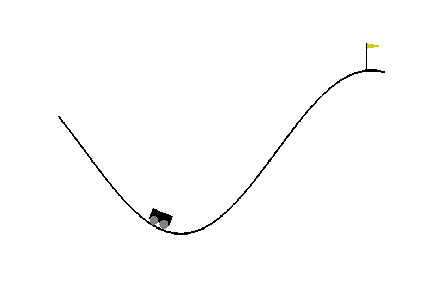
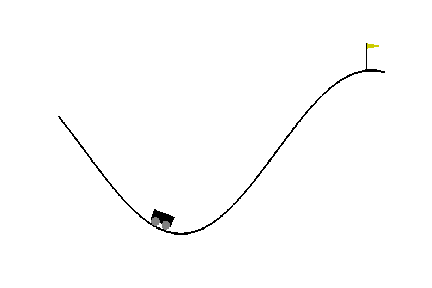
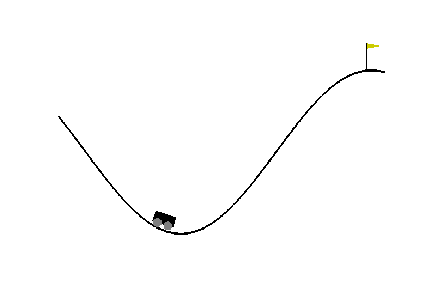
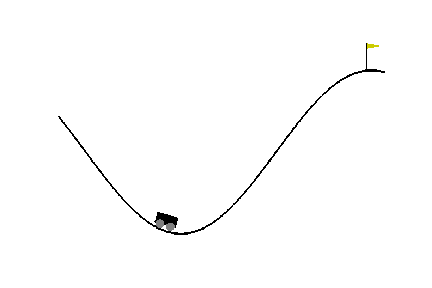
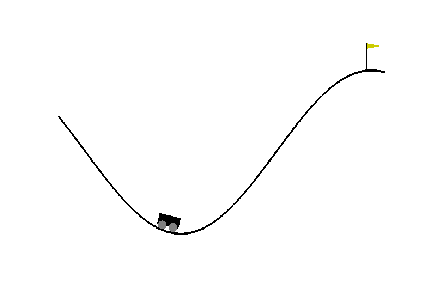
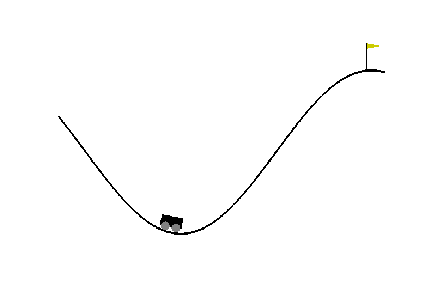
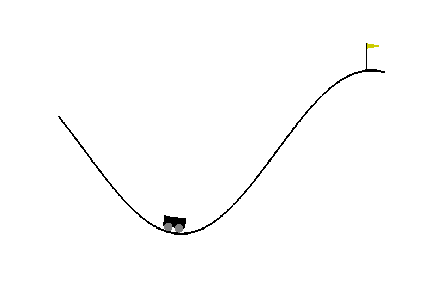
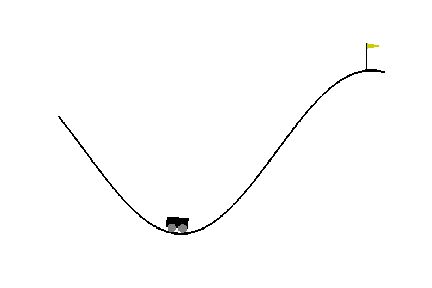
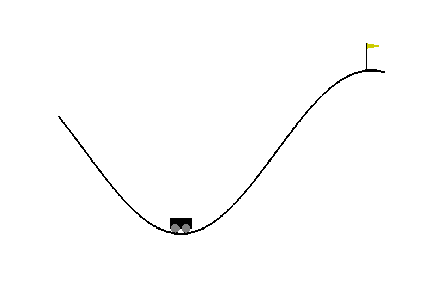
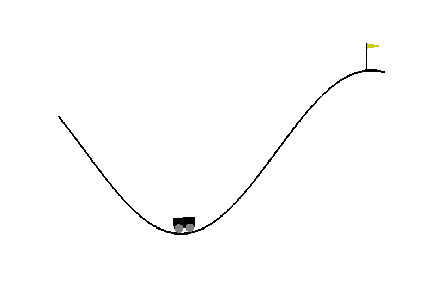
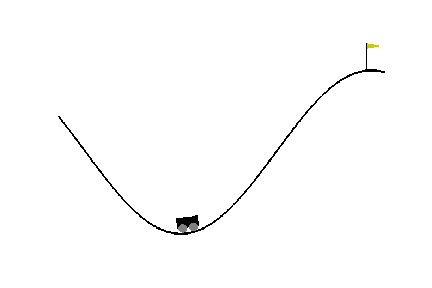
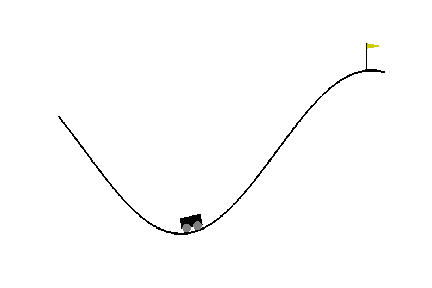
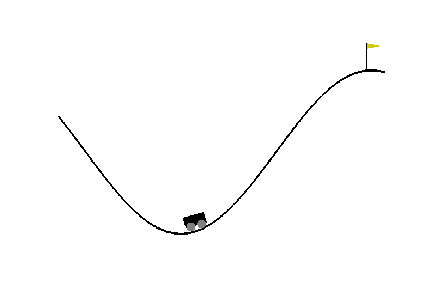
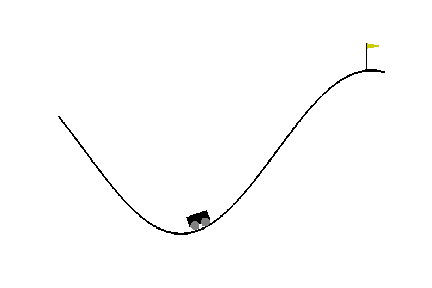
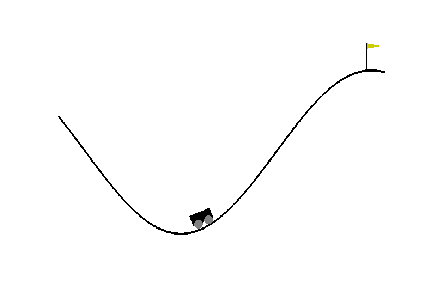
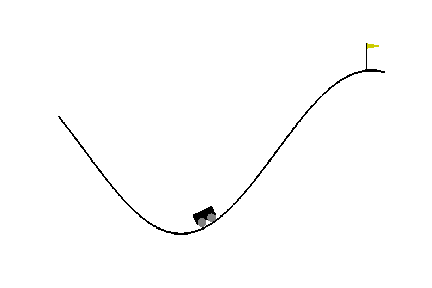
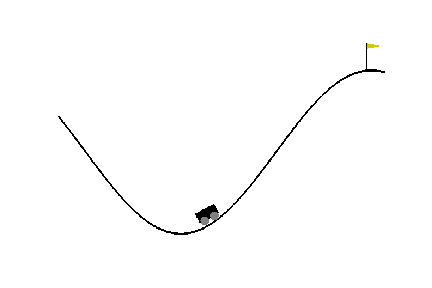
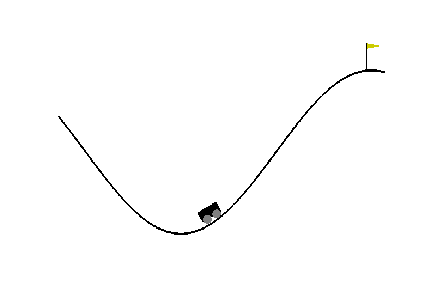
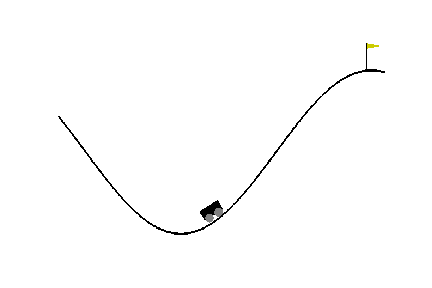
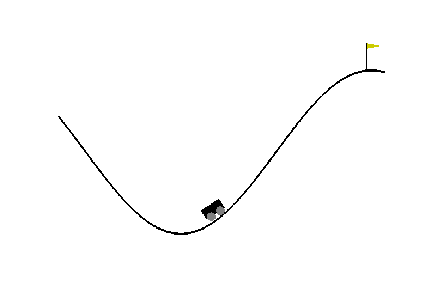
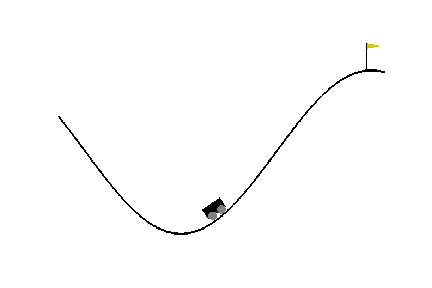
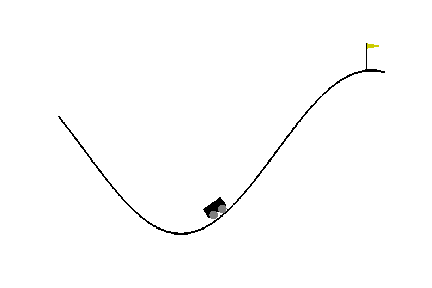
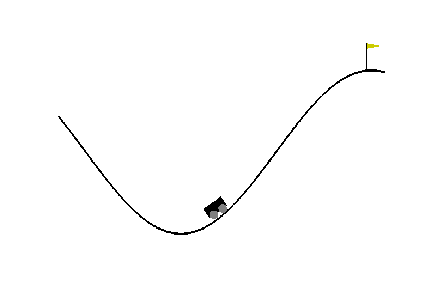
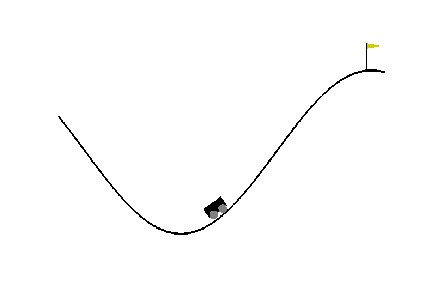
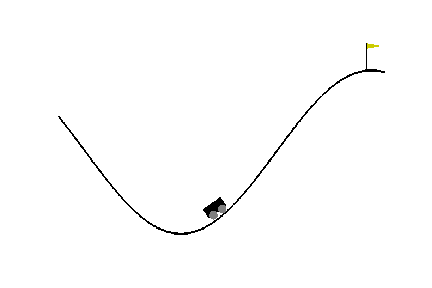
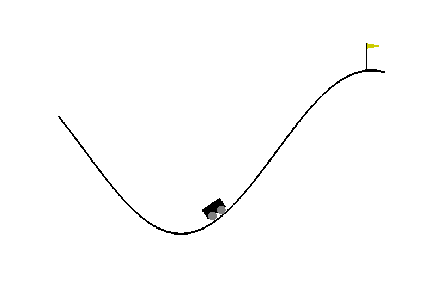
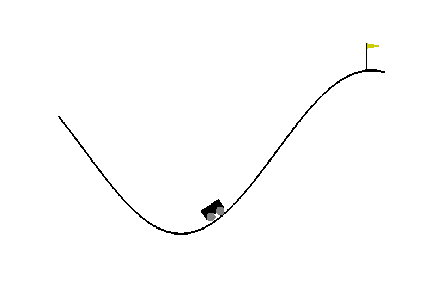
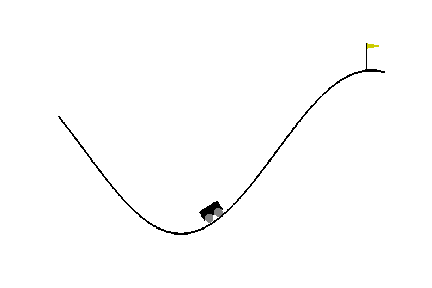
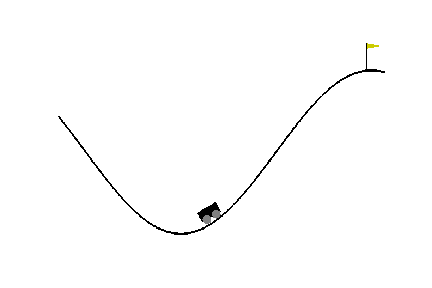
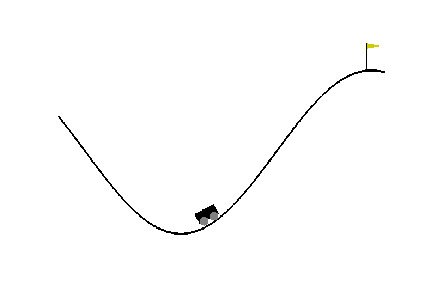
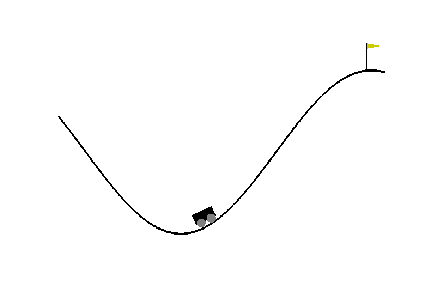
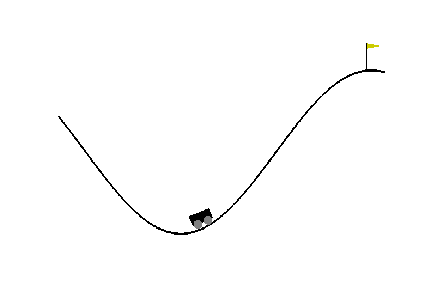
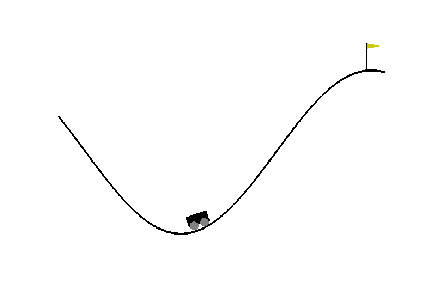
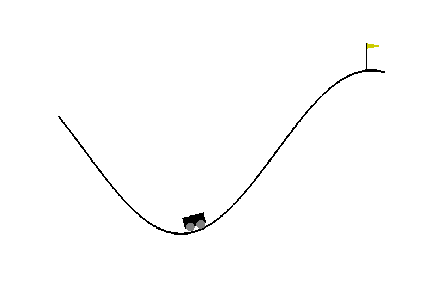
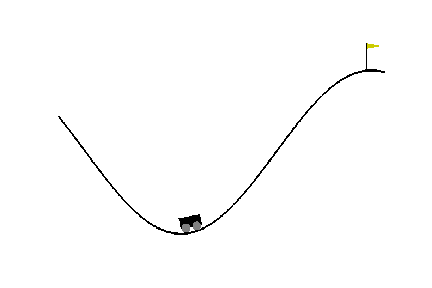
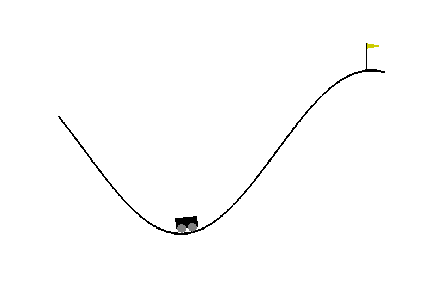
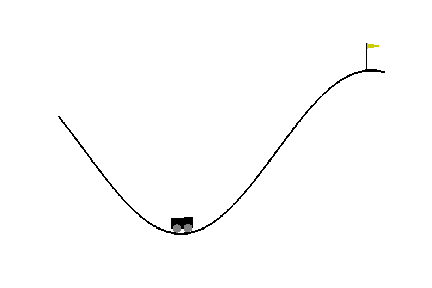
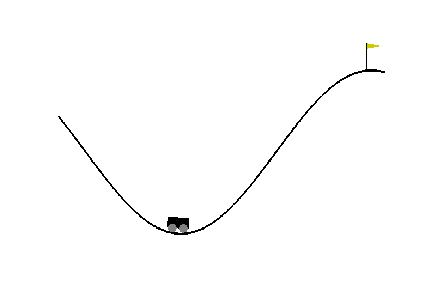
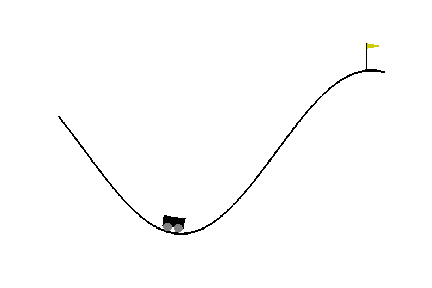
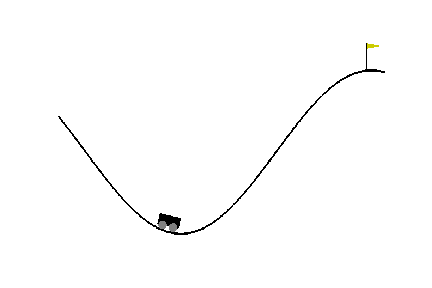
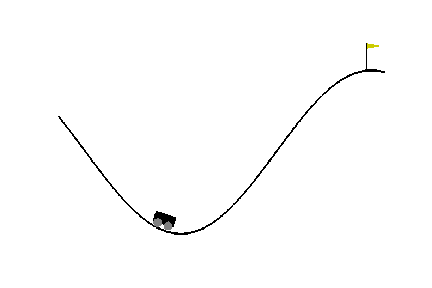
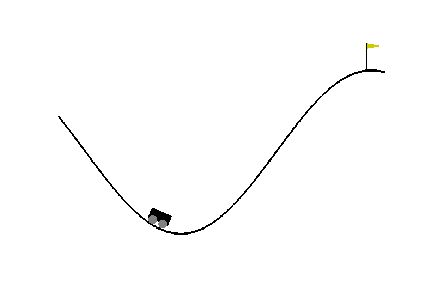
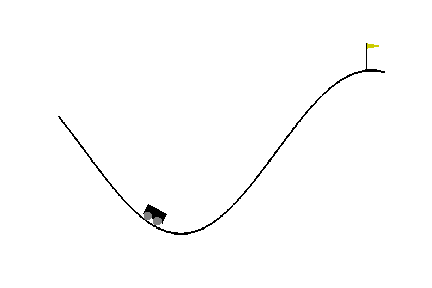
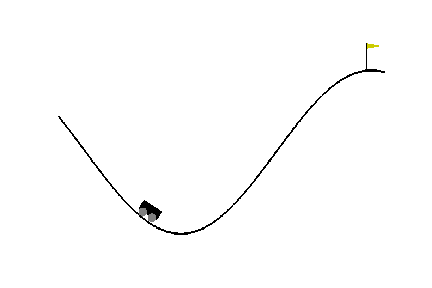
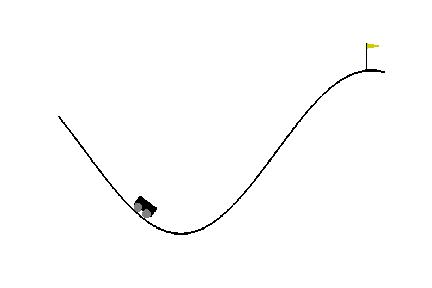
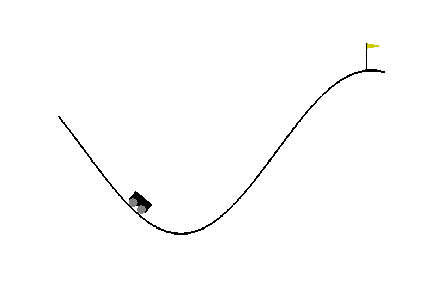
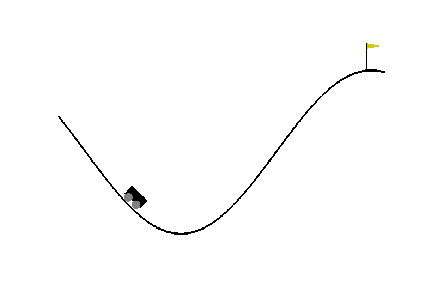
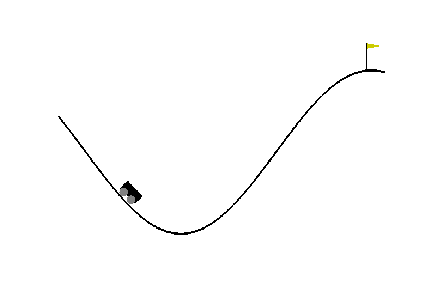
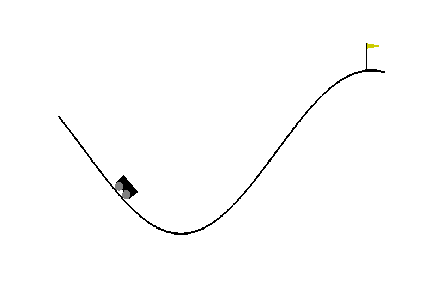
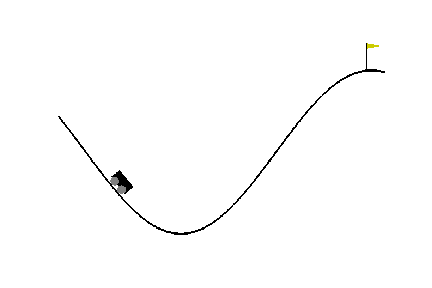
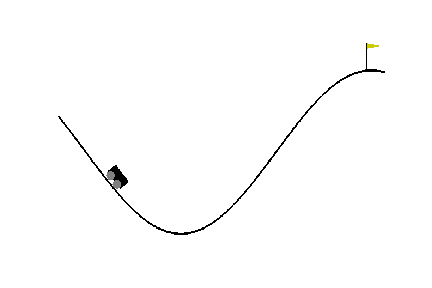
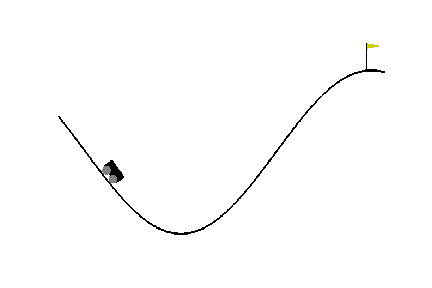
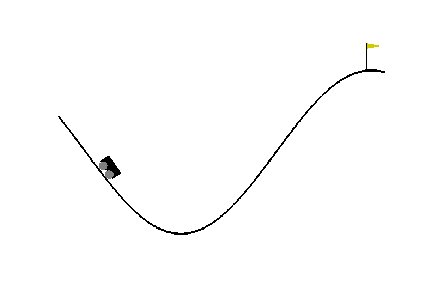
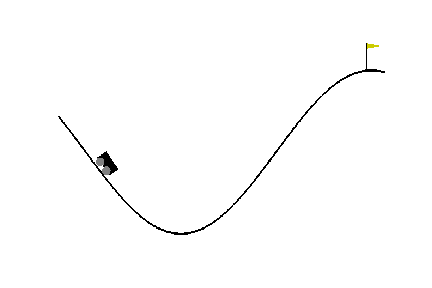
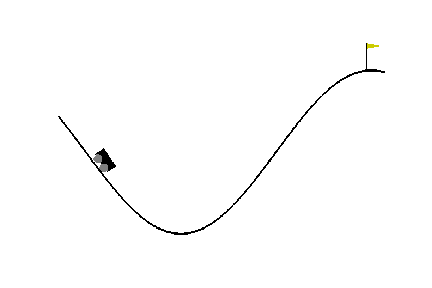
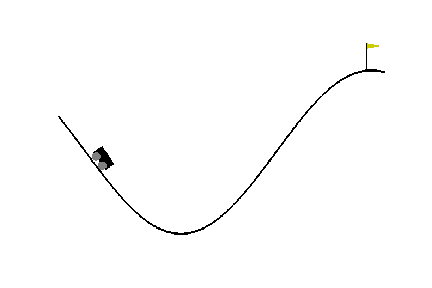
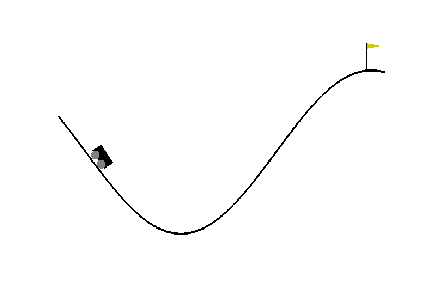
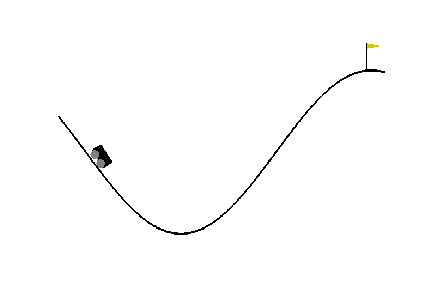
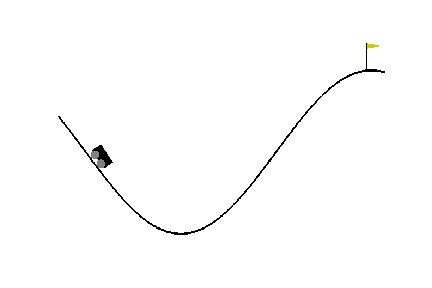
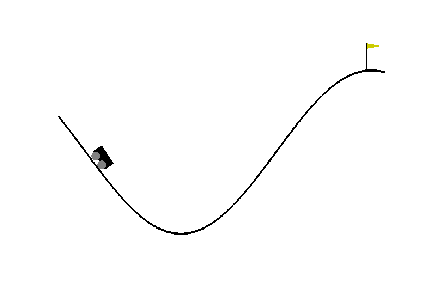
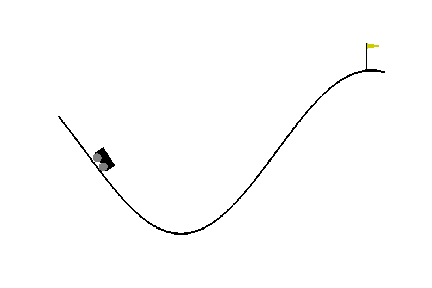
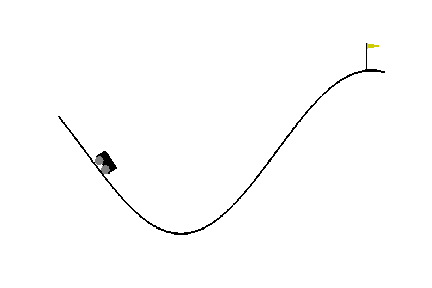
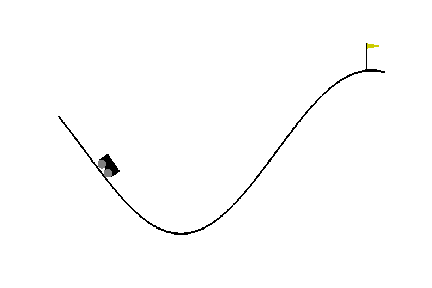
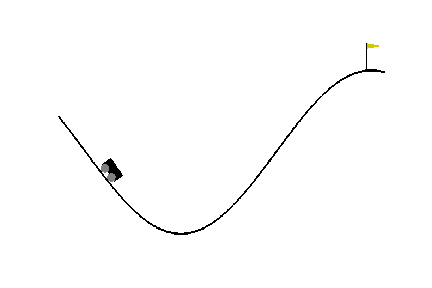
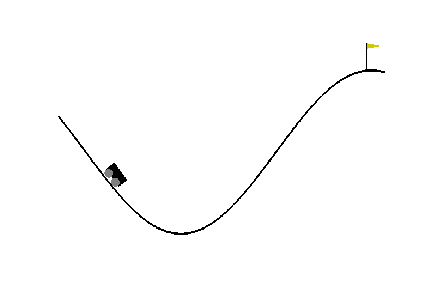
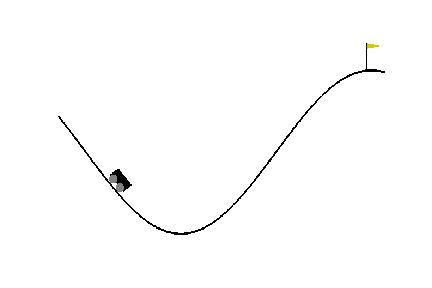
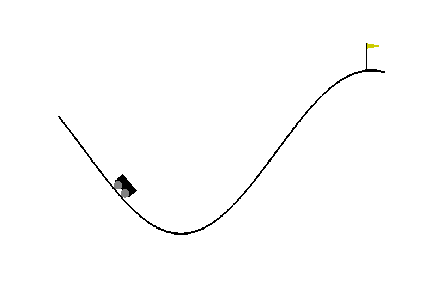
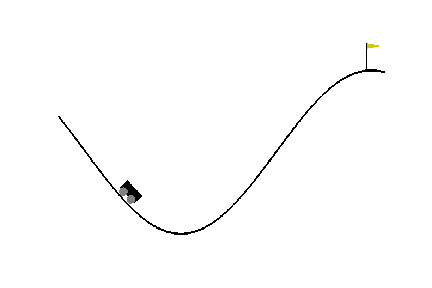
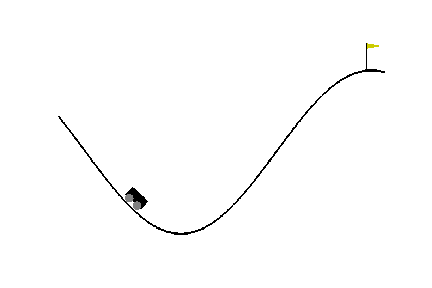
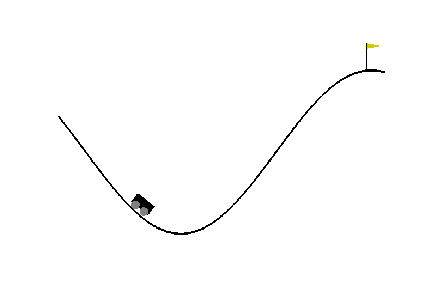
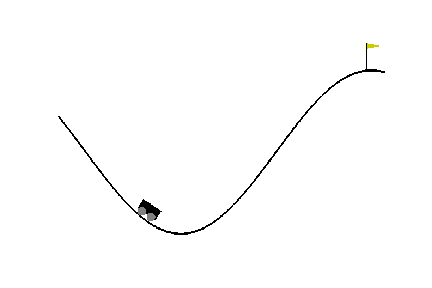
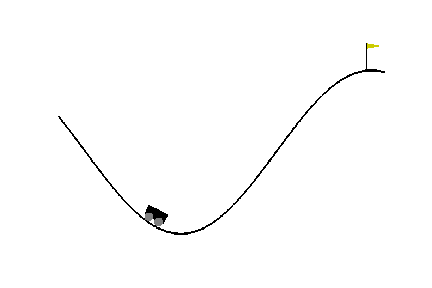
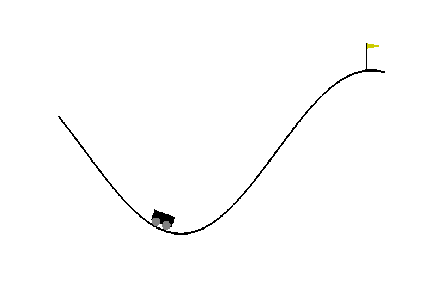
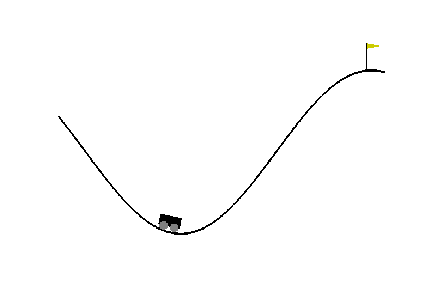
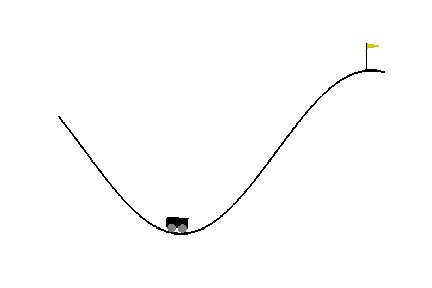
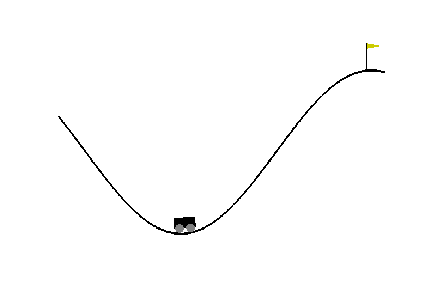
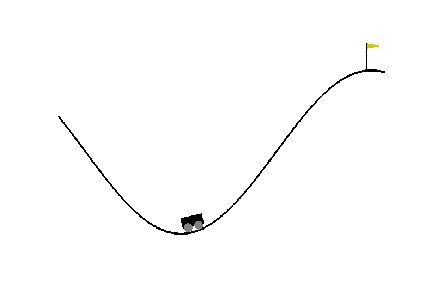
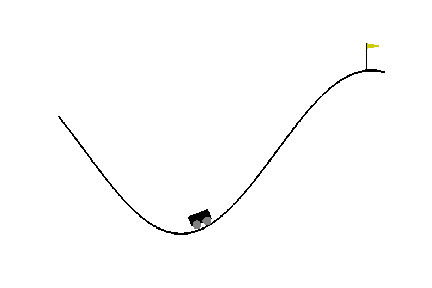
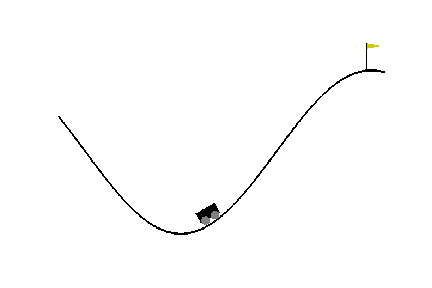
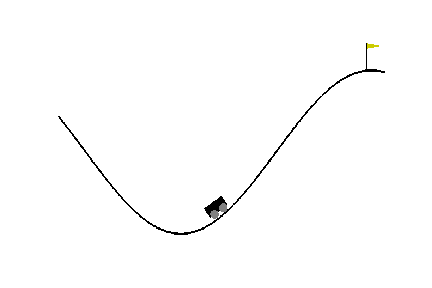
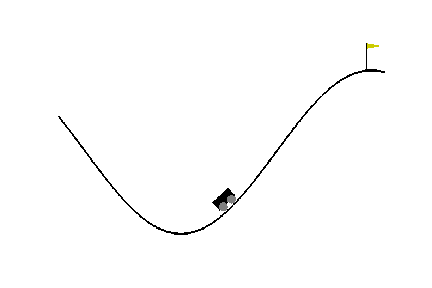
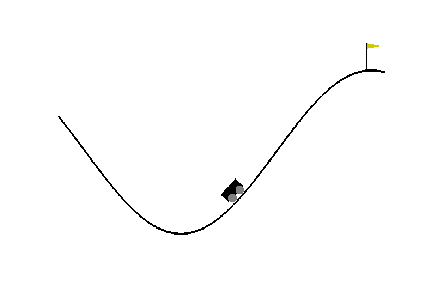
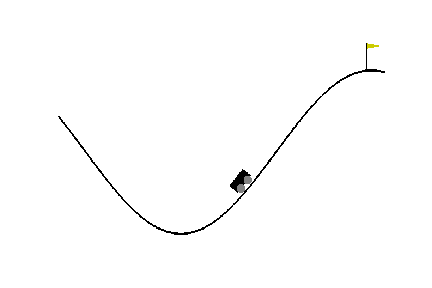
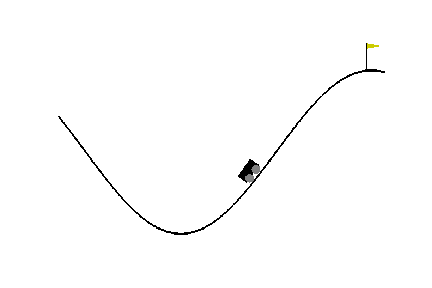
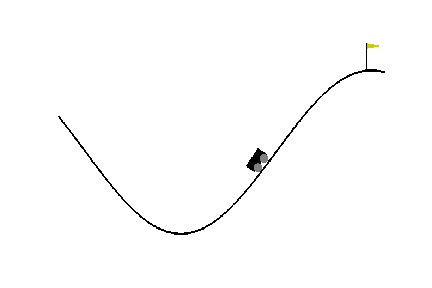
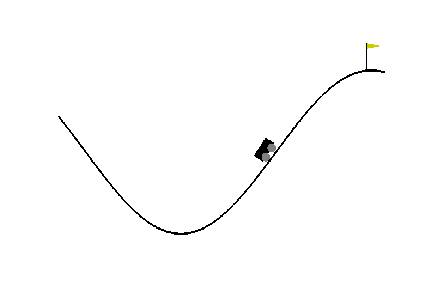
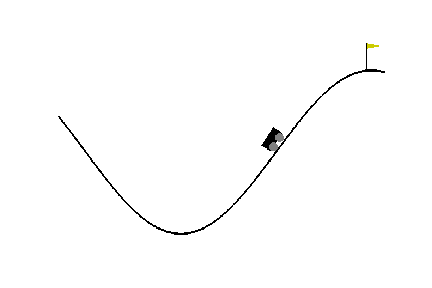
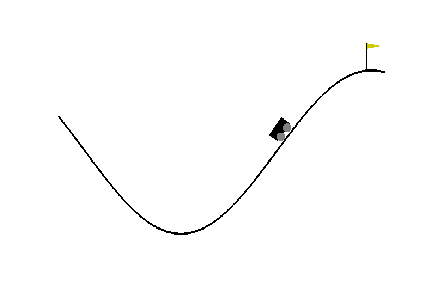
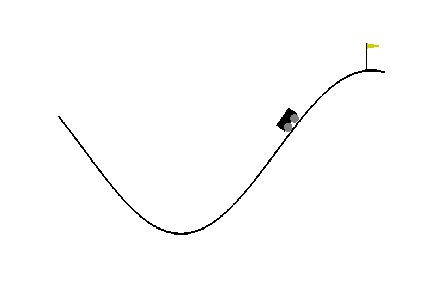
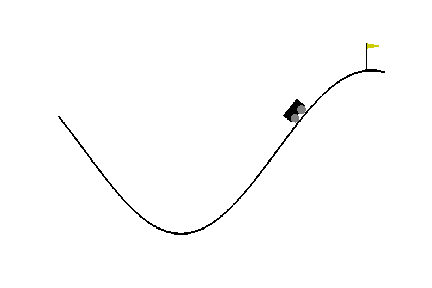
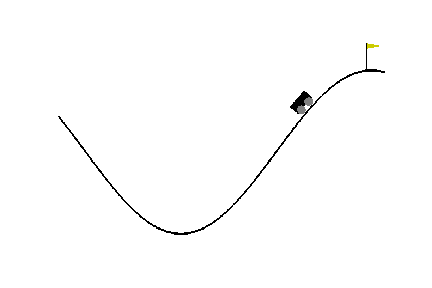
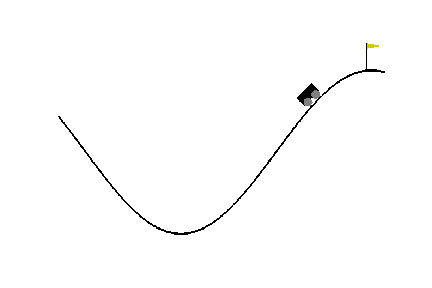
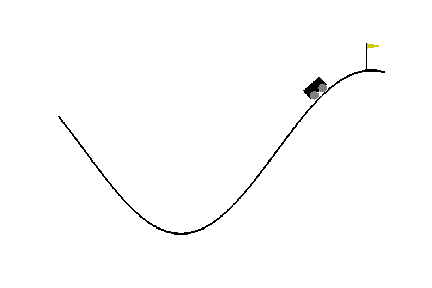
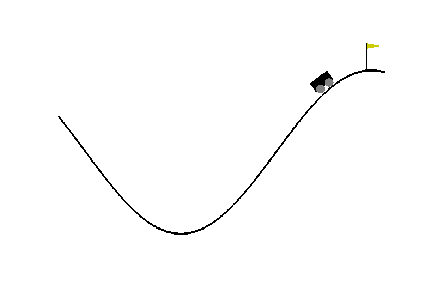
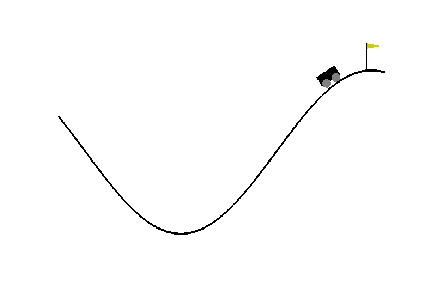
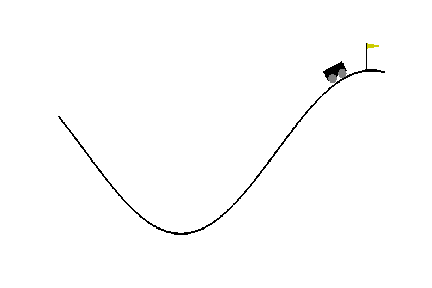
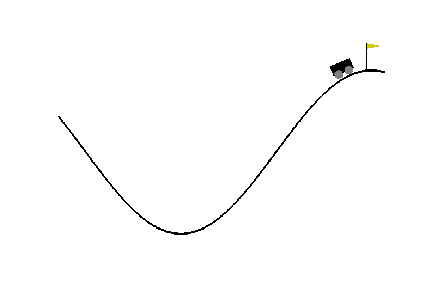
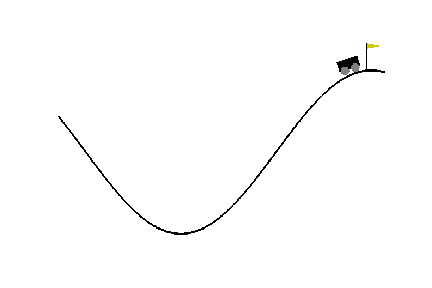
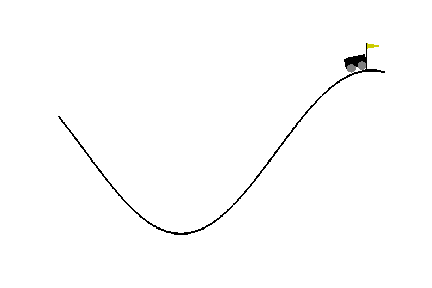
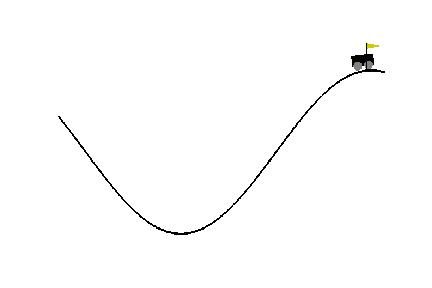

In [6]:
stat = e.train(qtf,episodes=200,plot=True)
e.test(qtf,gif=True)

### PyTorch

In [7]:
qtorch = QLearningTorch(learning_rate=0.01,
                   use_bias=True,featurizer=featurizer,scaler=scaler)

  0%|          | 0/200 [00:00<?, ?it/s]

Model Created!


Epsilon : 2.505568501063291e-175, Num Steps : 199, Avg Reward with Window Size 100 : -191.85: 100%|██████████| 200/200 [01:32<00:00,  2.17it/s]           
/Users/shyam/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/shyam/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


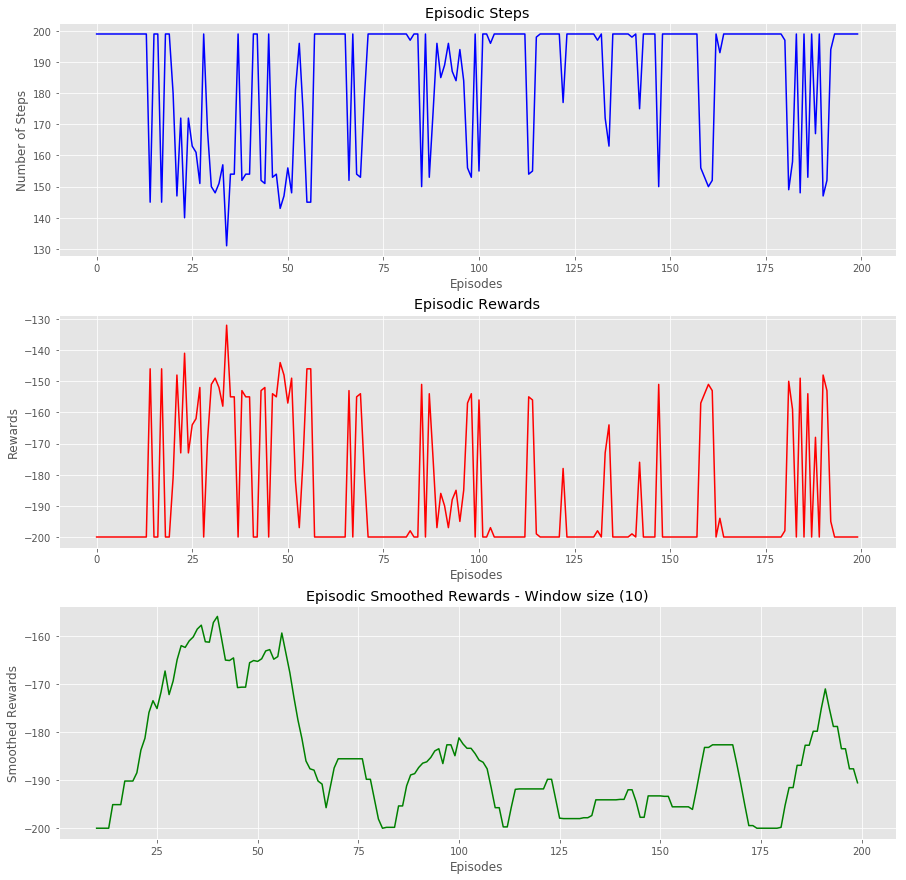

Total reward for episode 0: -200.0



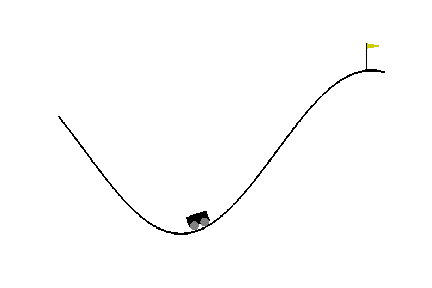
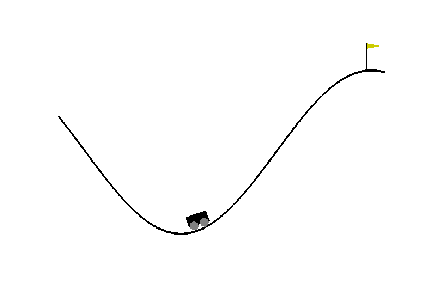
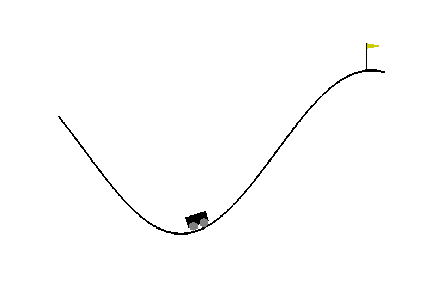
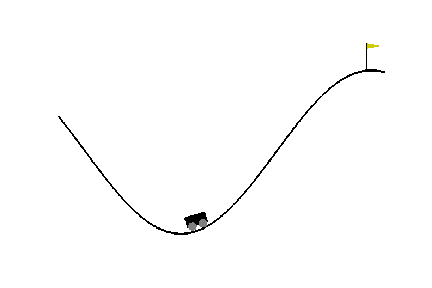
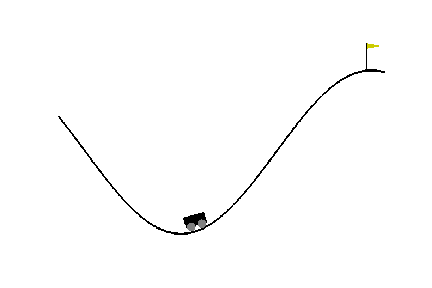
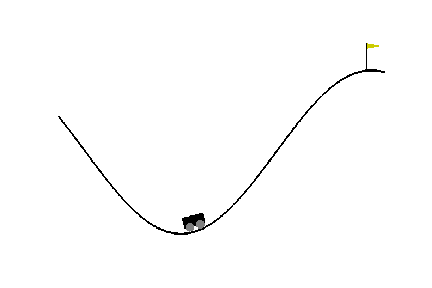
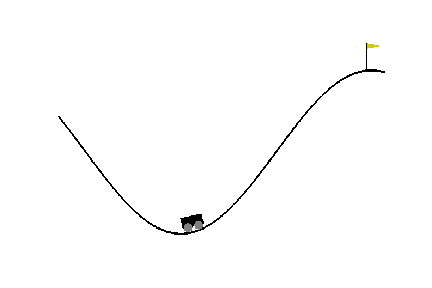
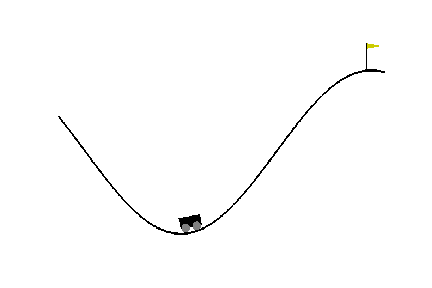
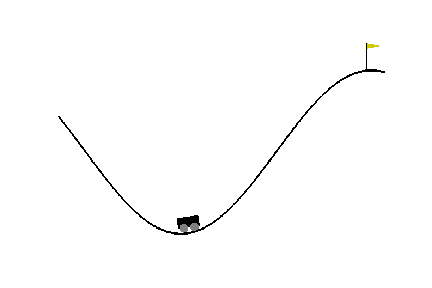
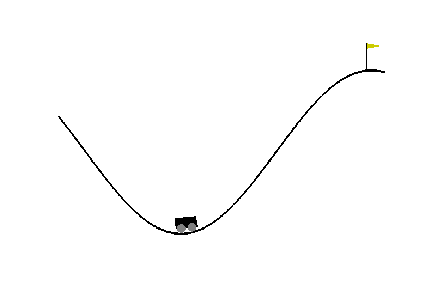
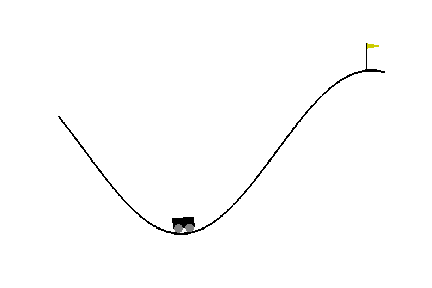
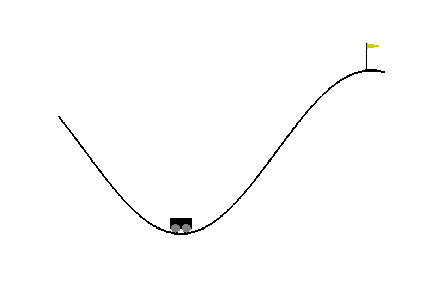
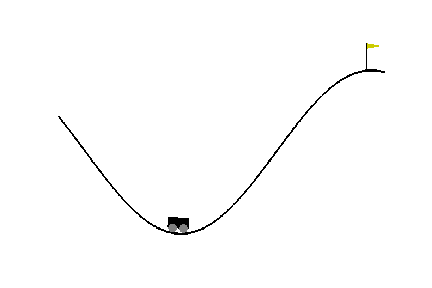
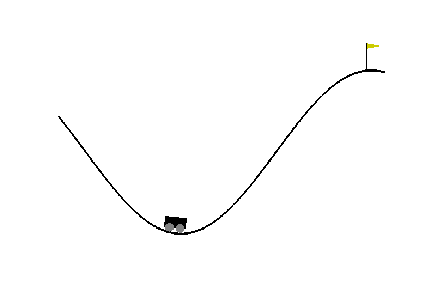
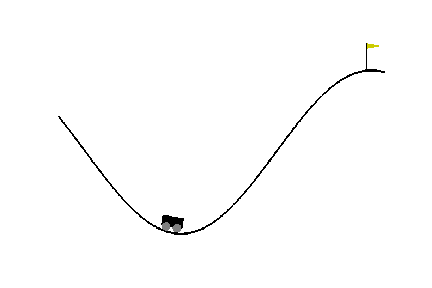
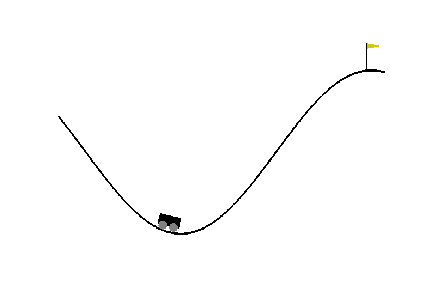
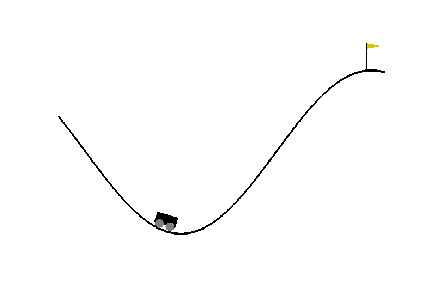
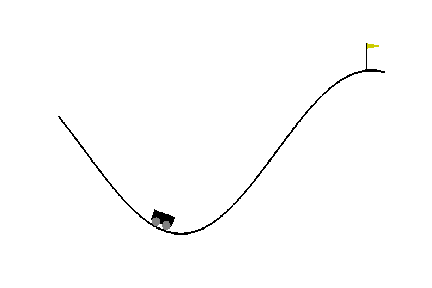
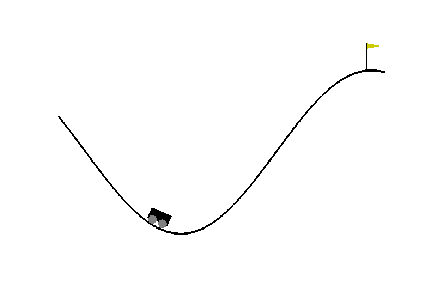
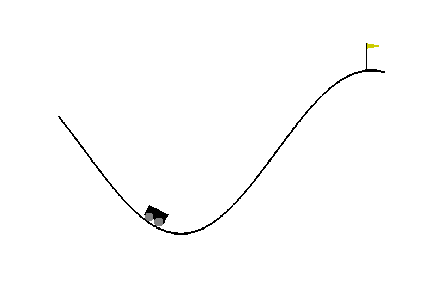
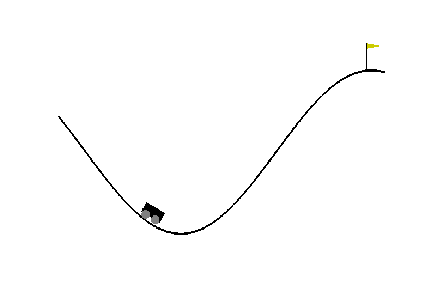
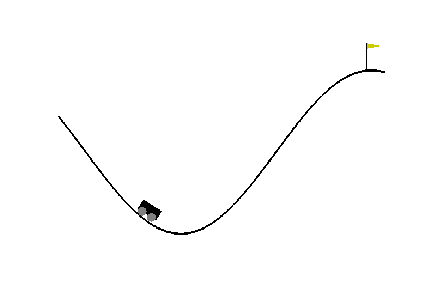
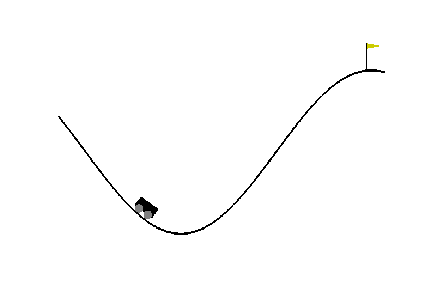
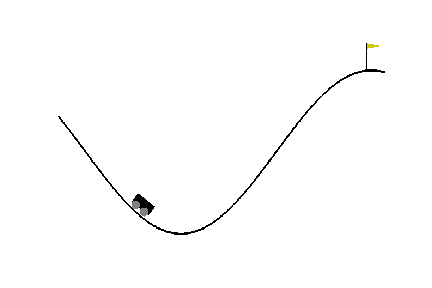
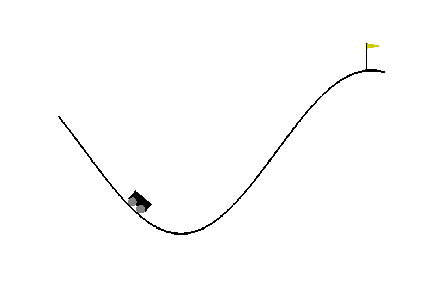
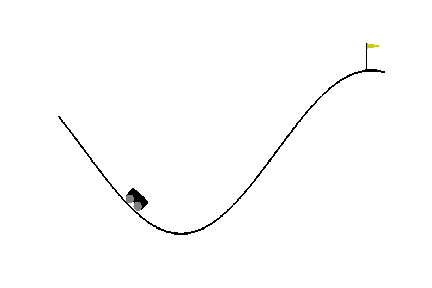
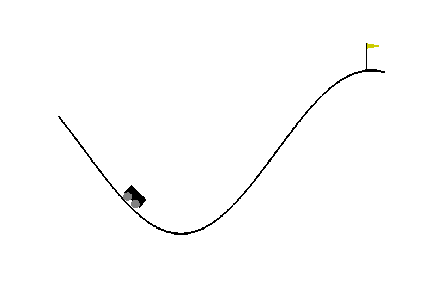
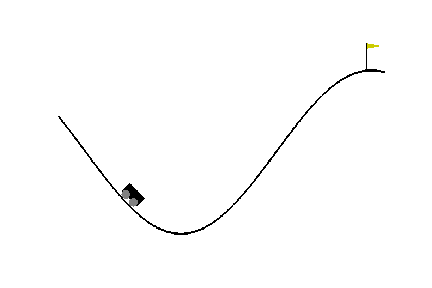
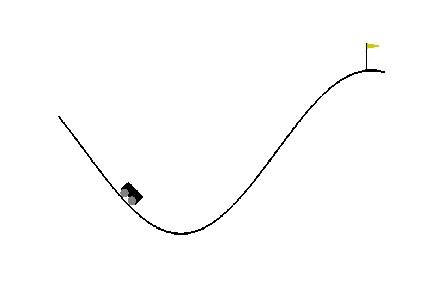
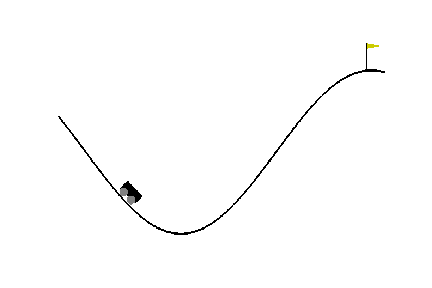
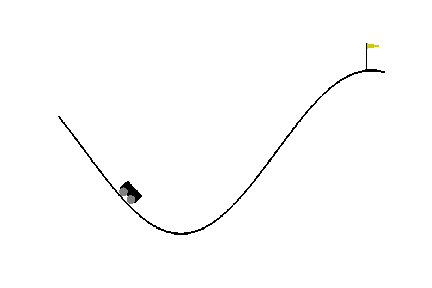
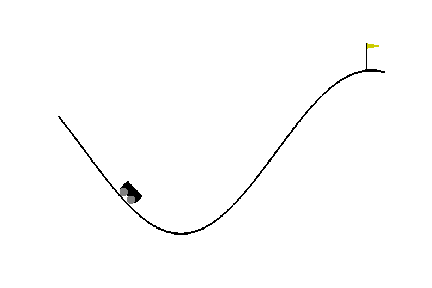
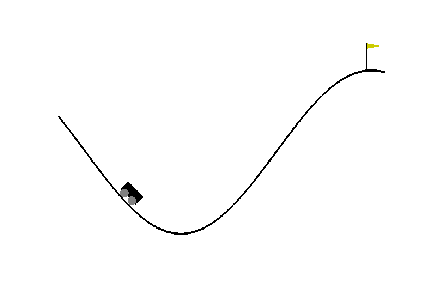
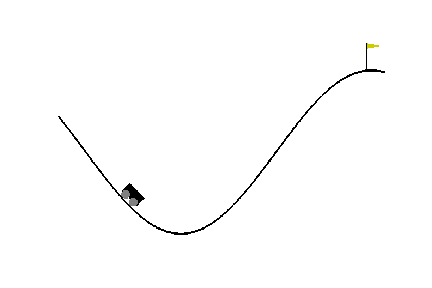
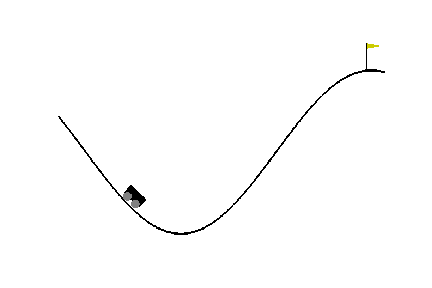
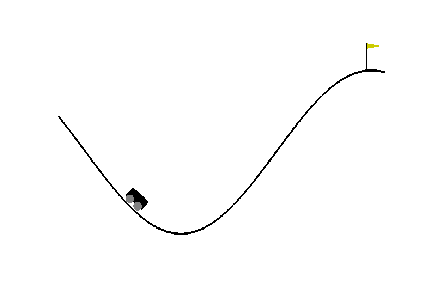
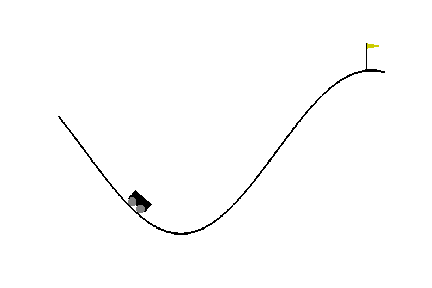
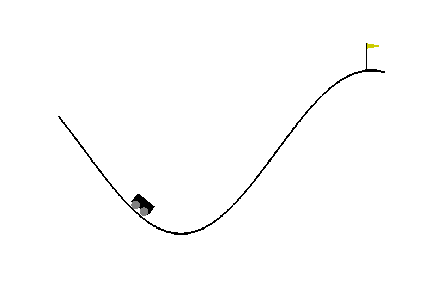
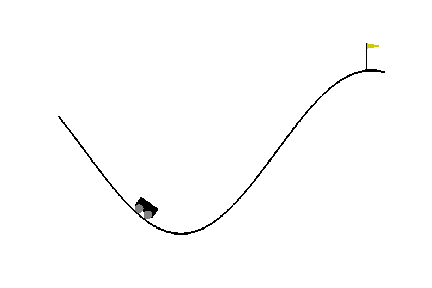
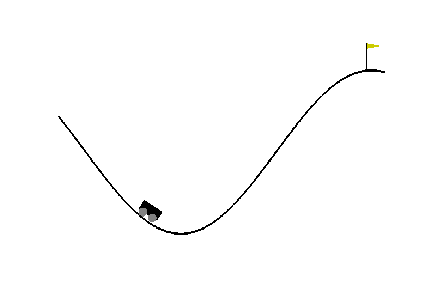
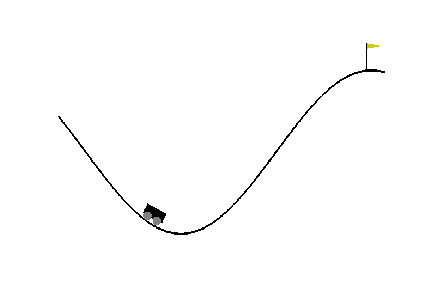
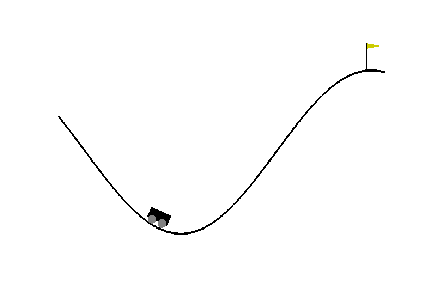
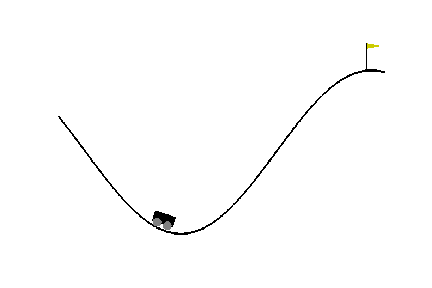
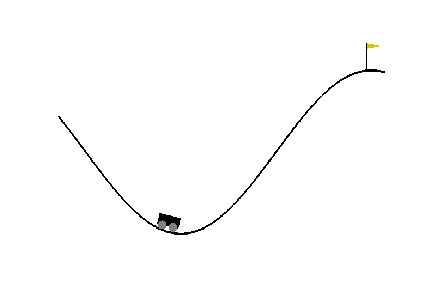
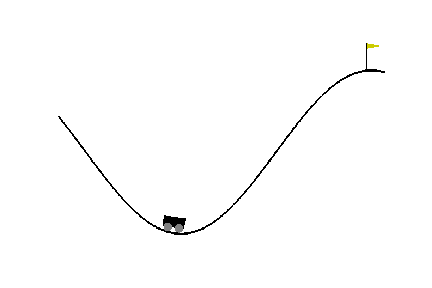
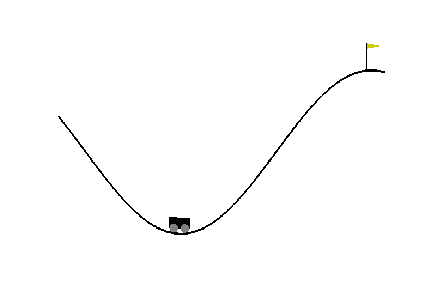
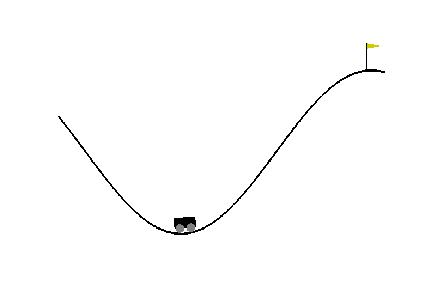
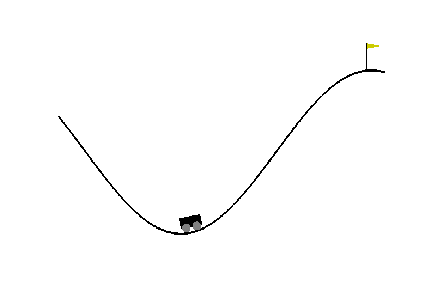
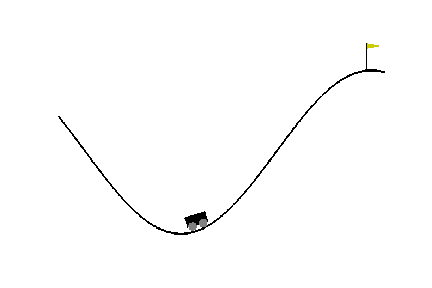
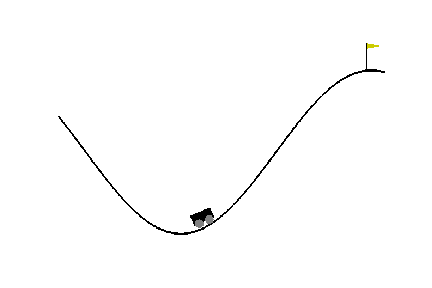
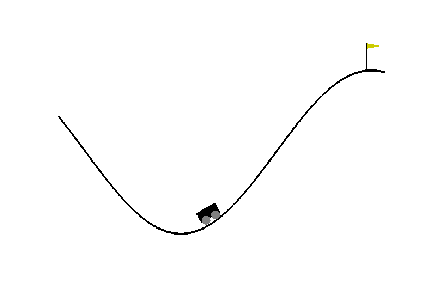
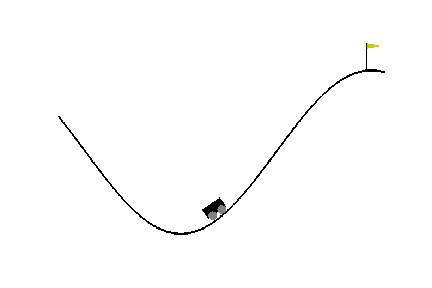
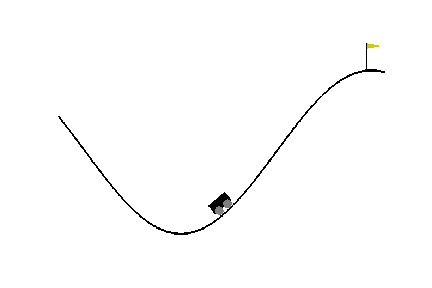
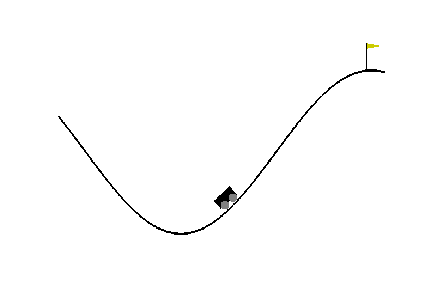
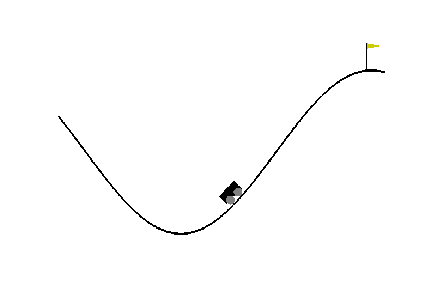
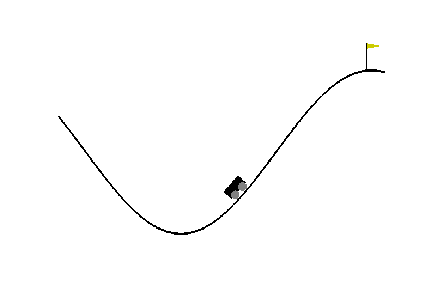
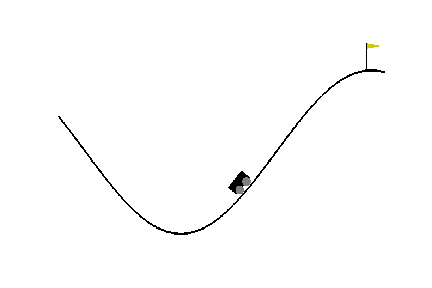
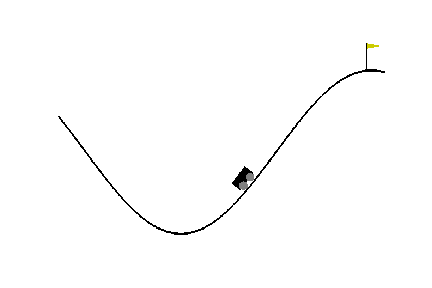
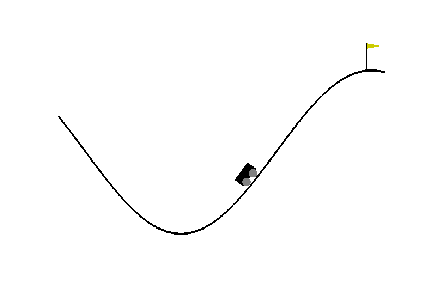
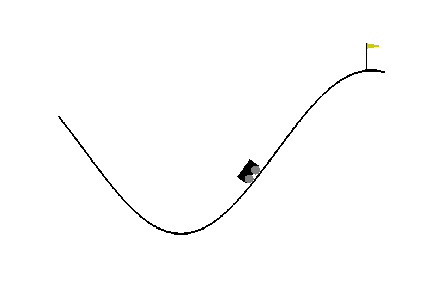
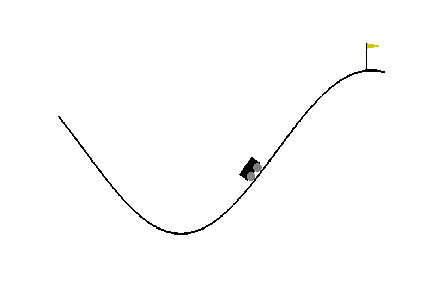
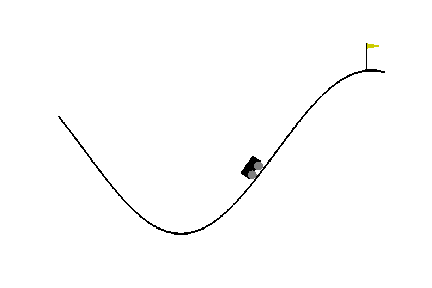
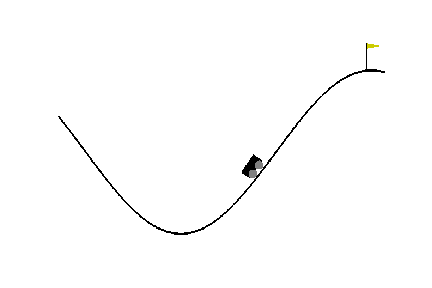
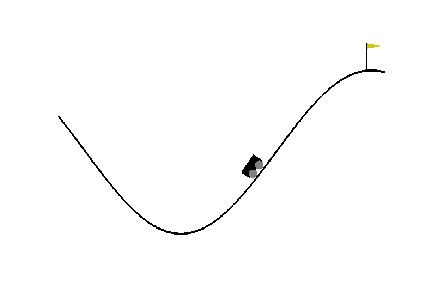
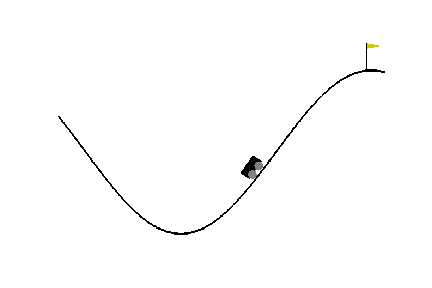
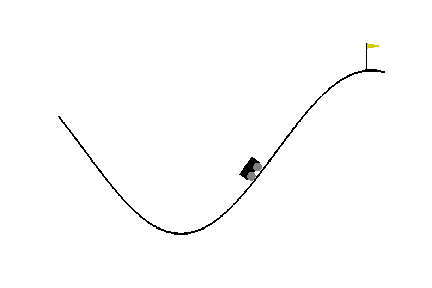
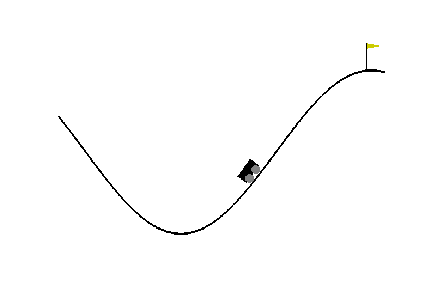
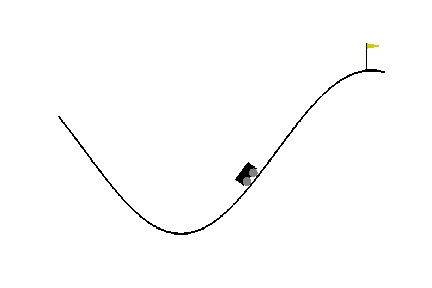
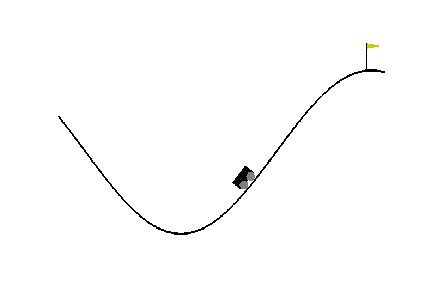
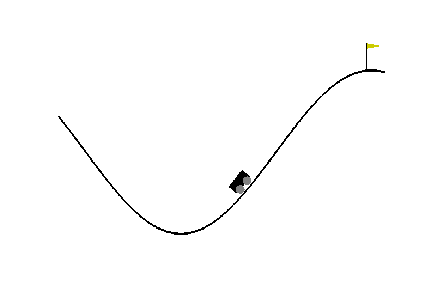
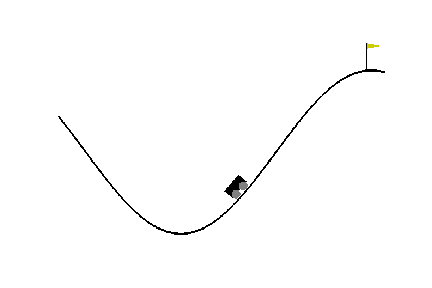
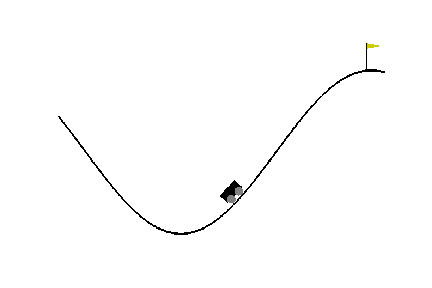
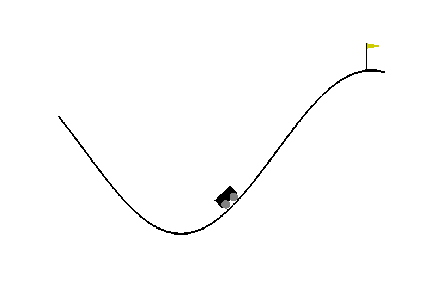
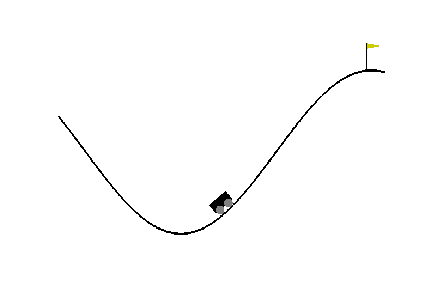
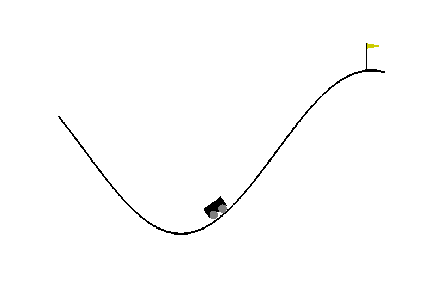
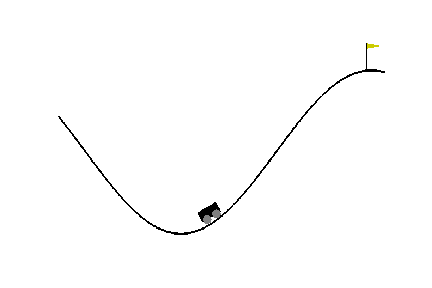
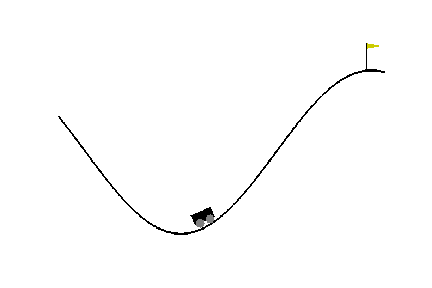
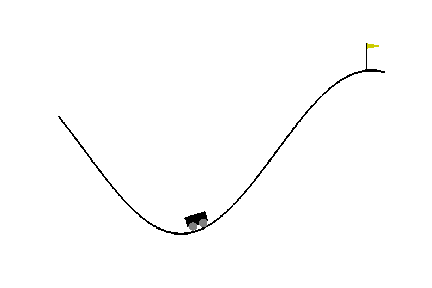
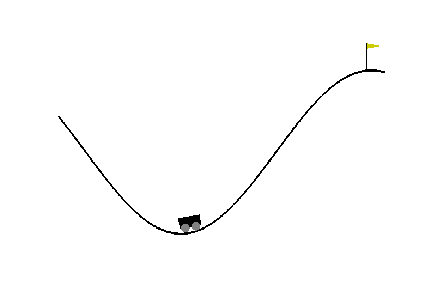
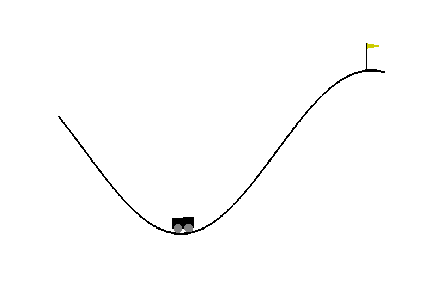
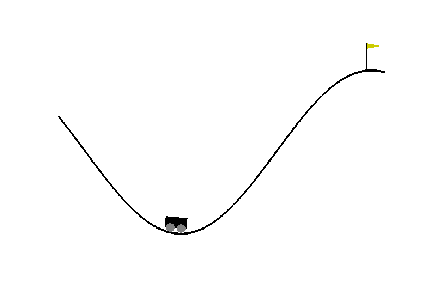
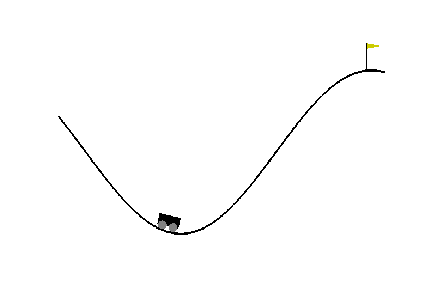
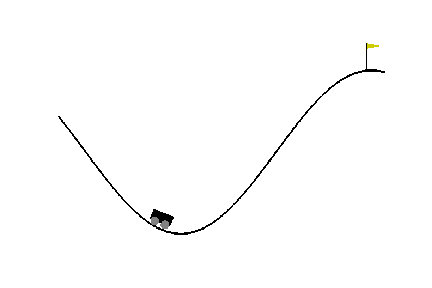
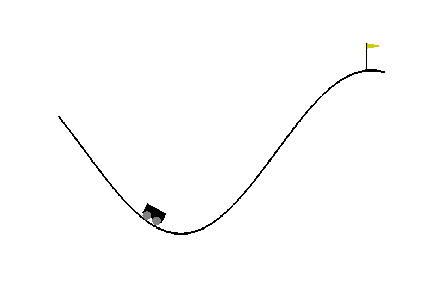
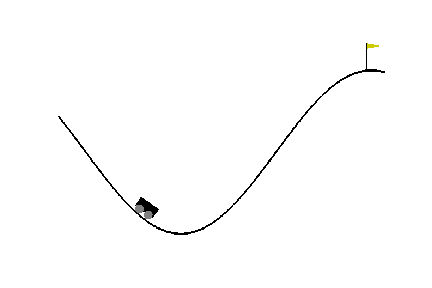
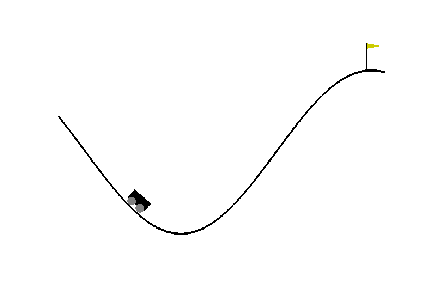
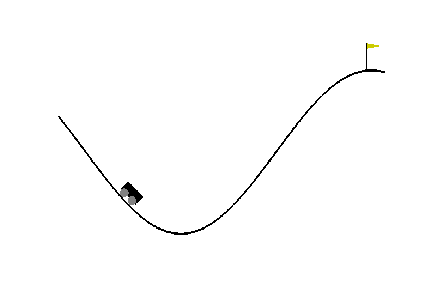
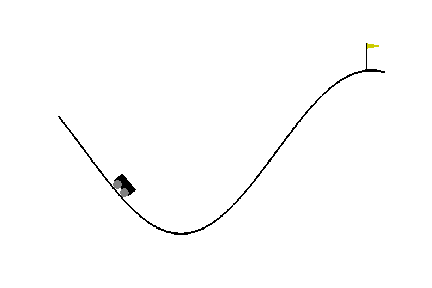
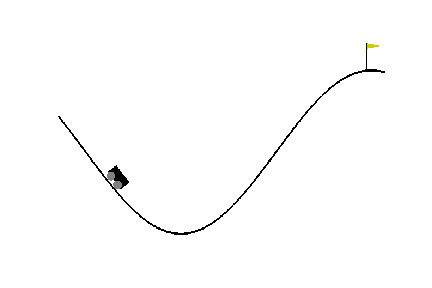
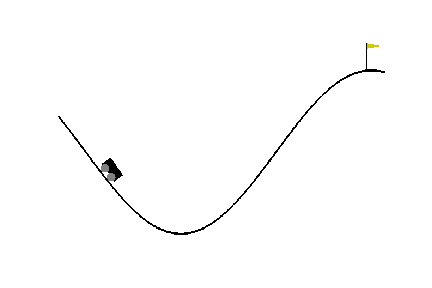
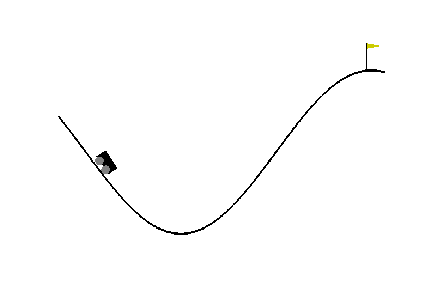
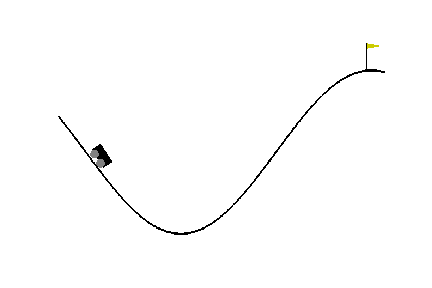
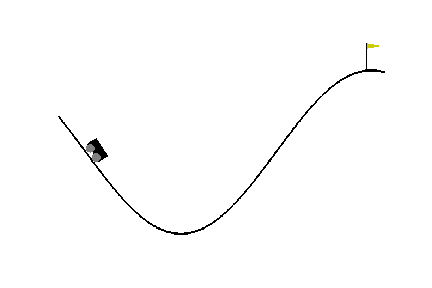
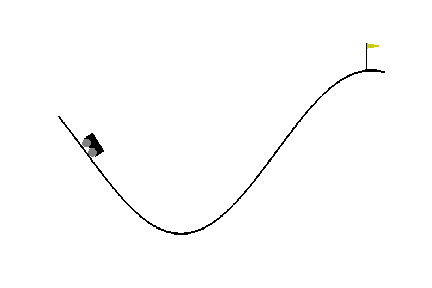
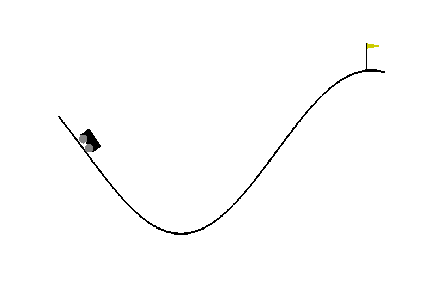
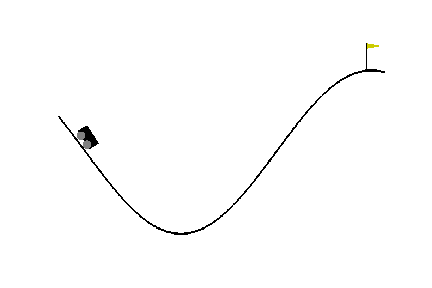
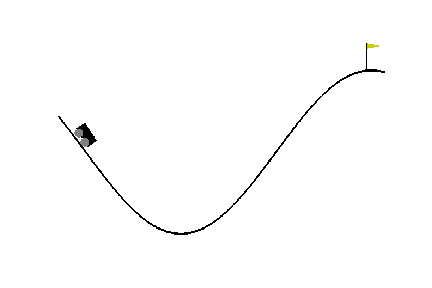
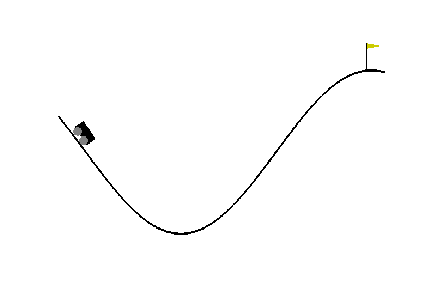
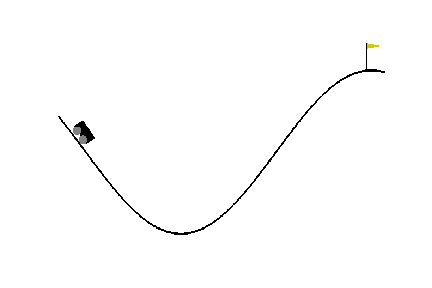
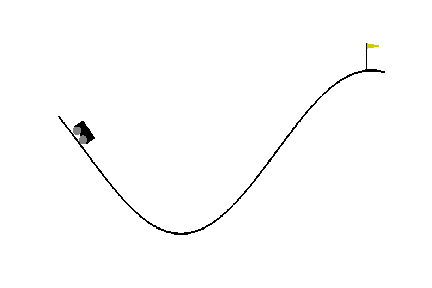
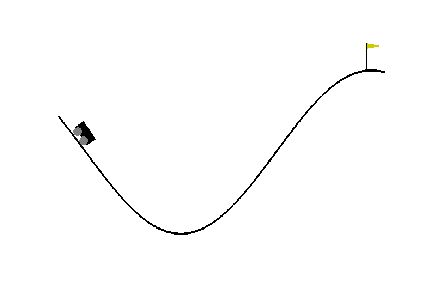
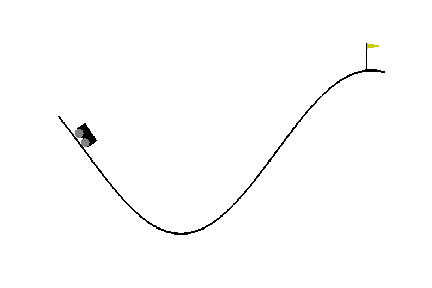
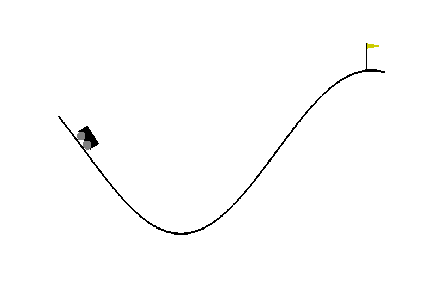
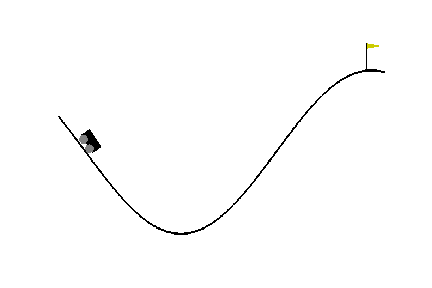
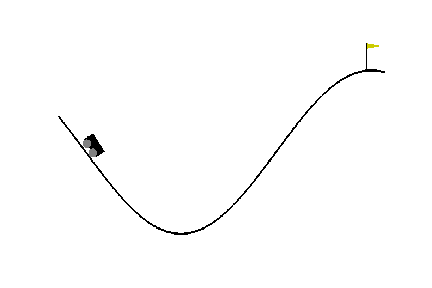
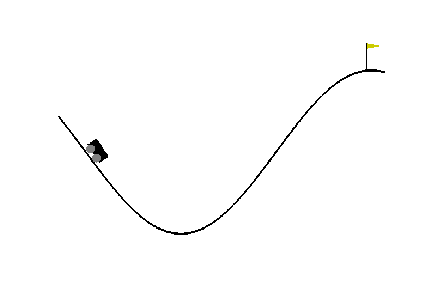
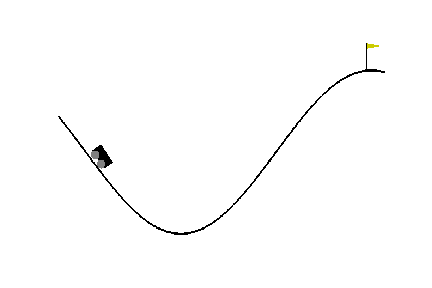
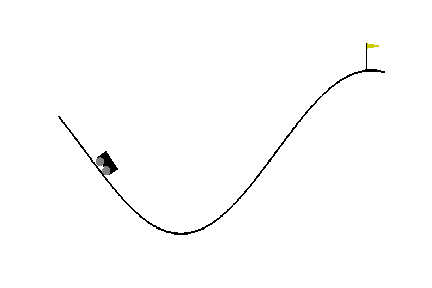
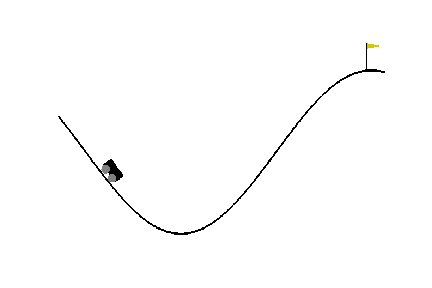
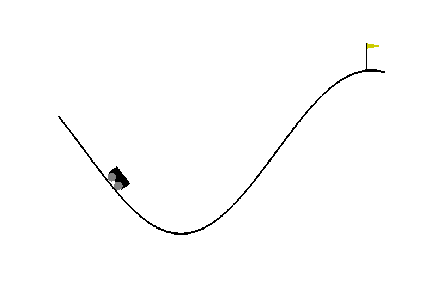
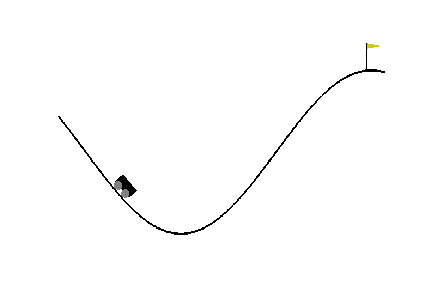
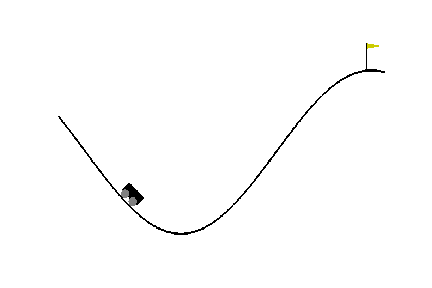
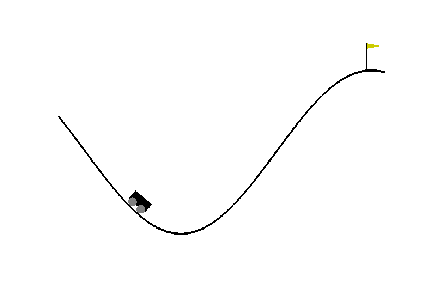
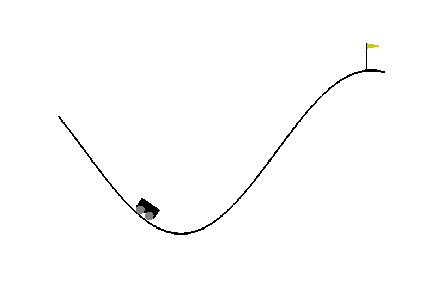
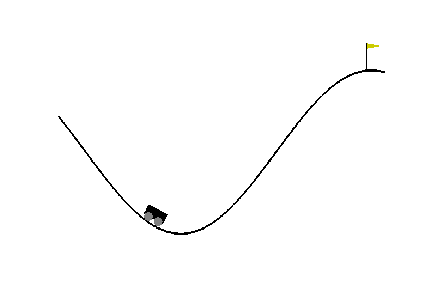
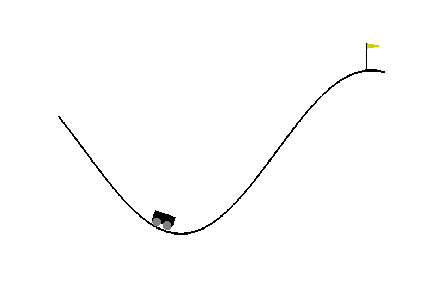
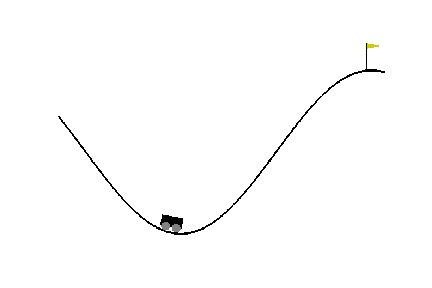
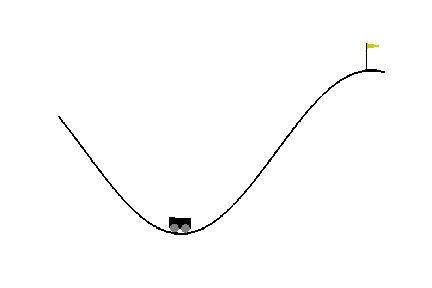
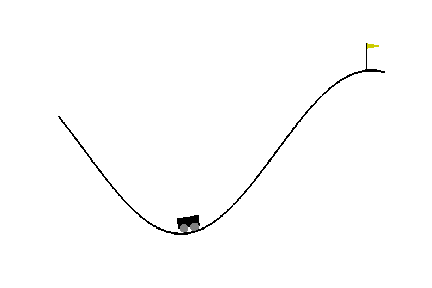
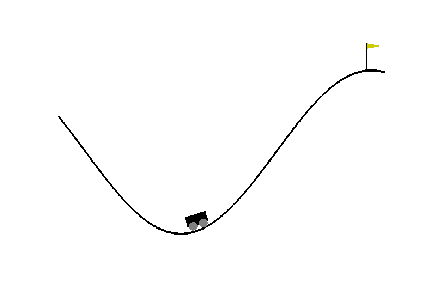
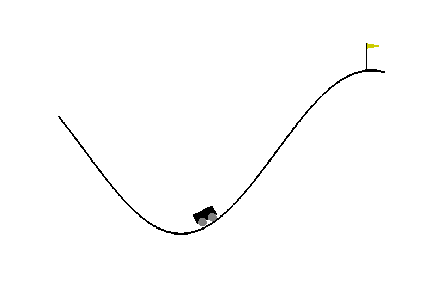
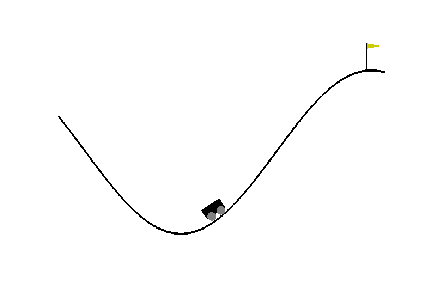
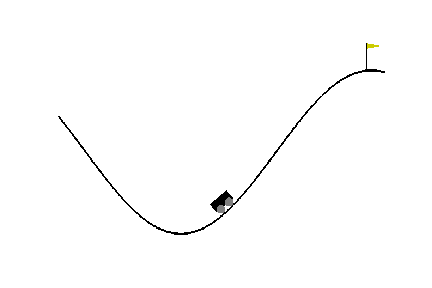
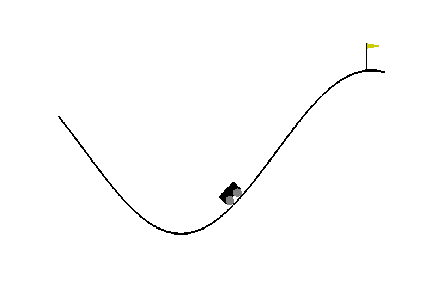
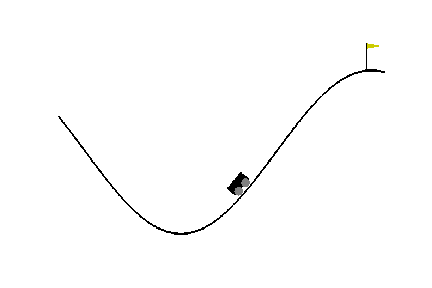
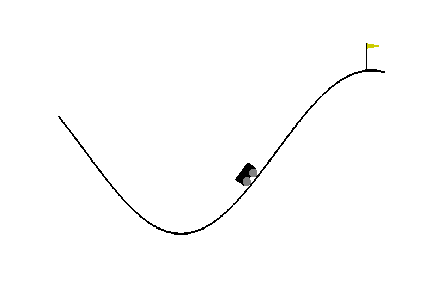
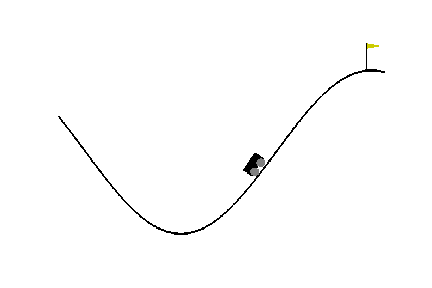
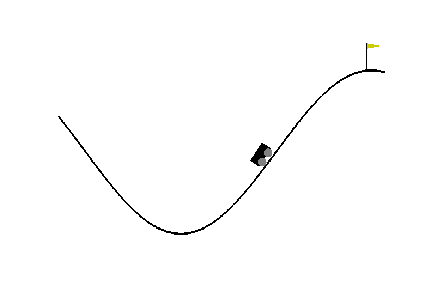
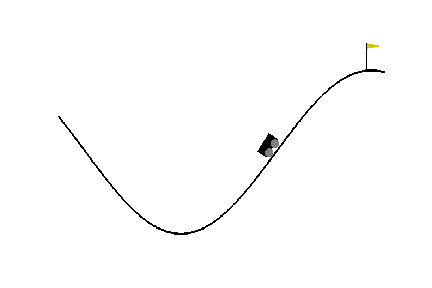
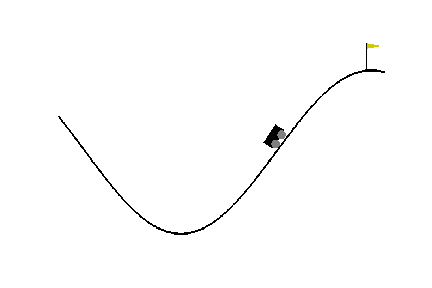
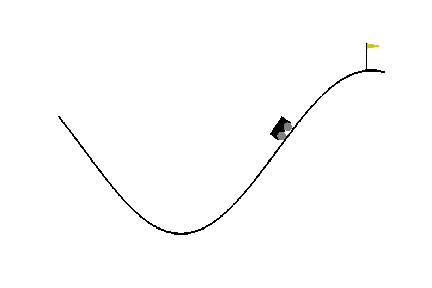
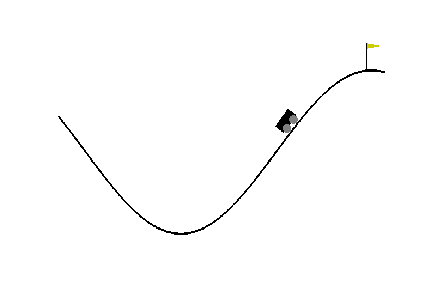
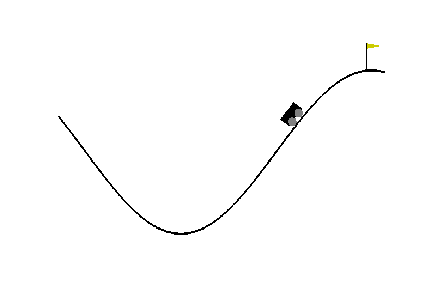
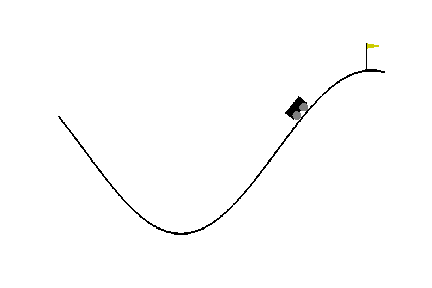
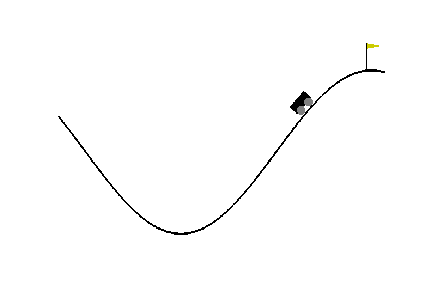
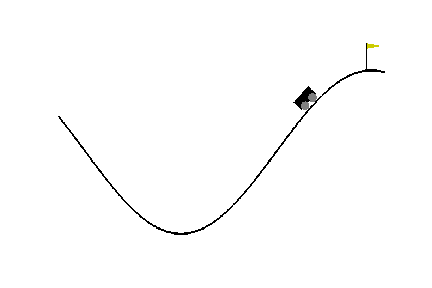
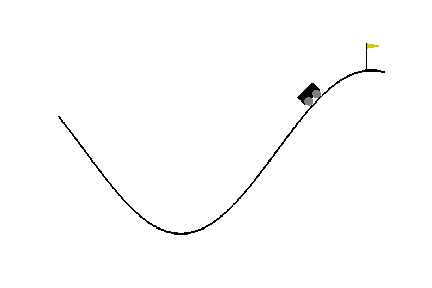
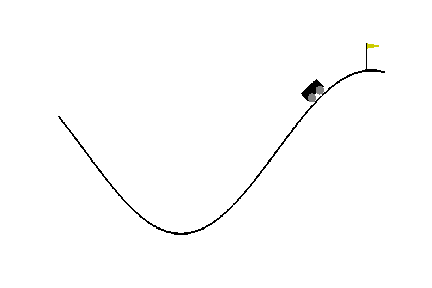
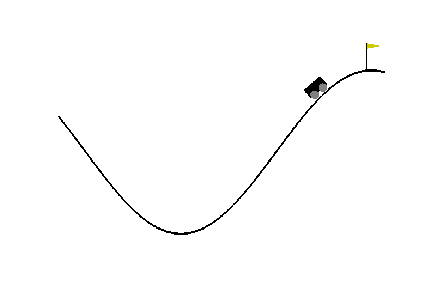
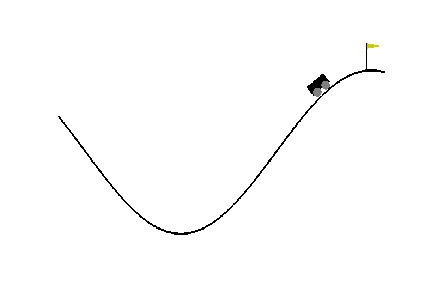
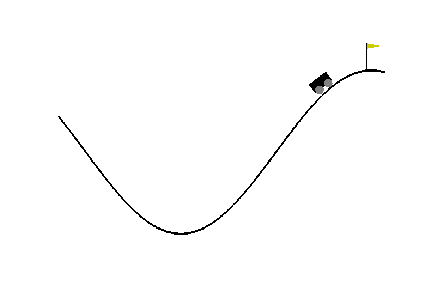
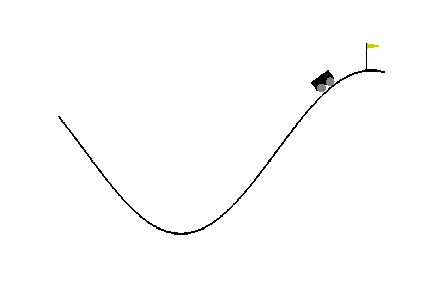
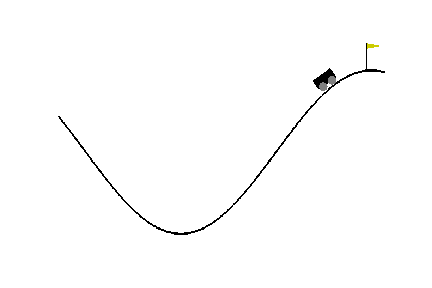
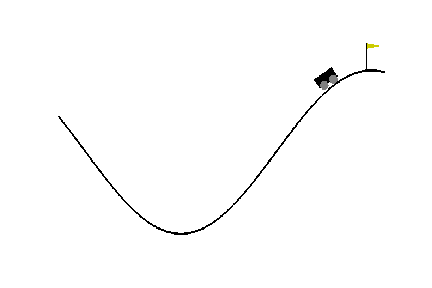
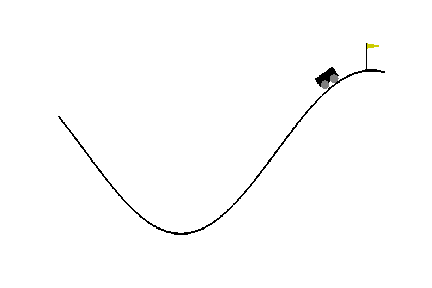
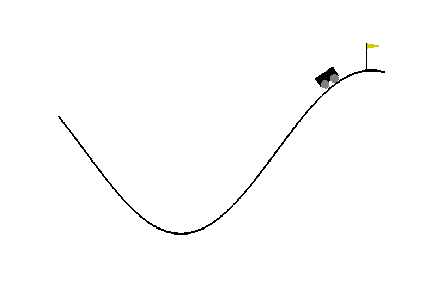
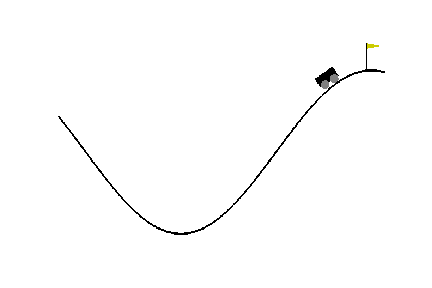
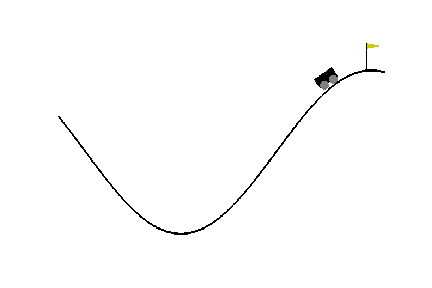
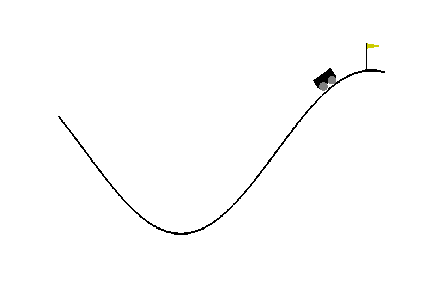
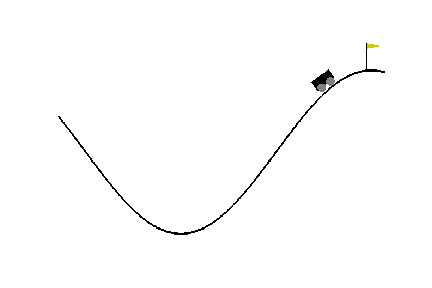
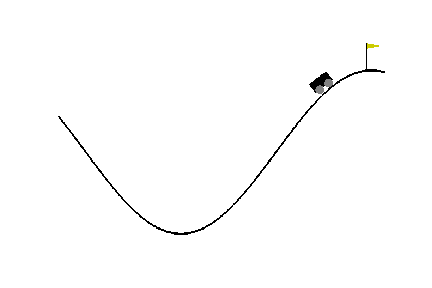
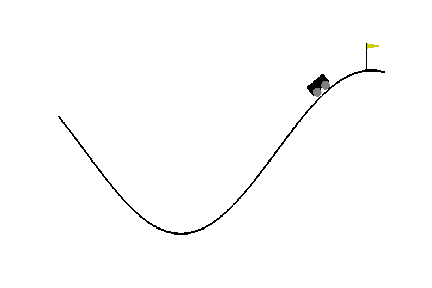
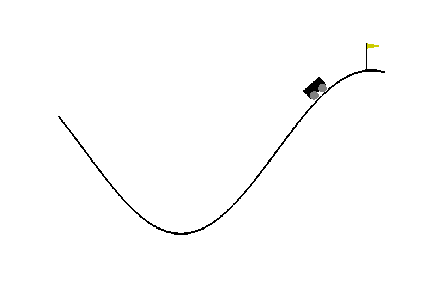
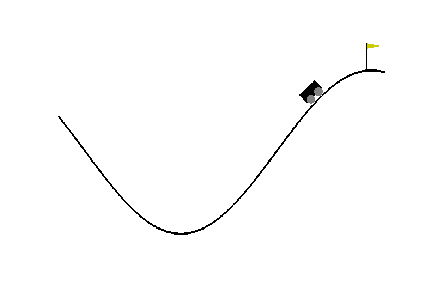
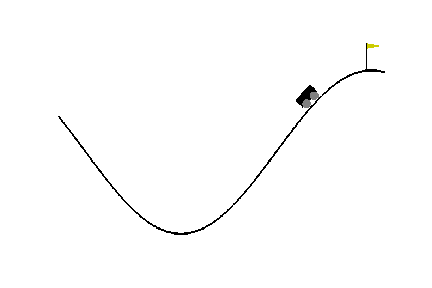
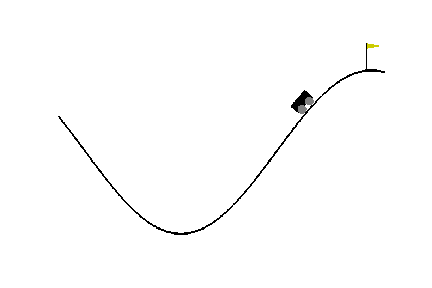
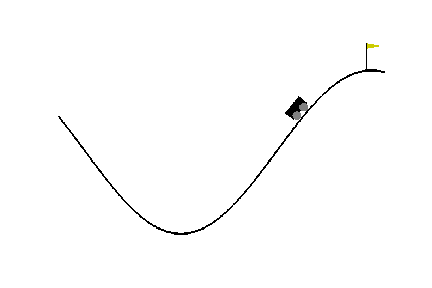
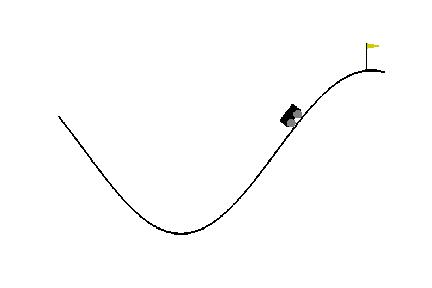
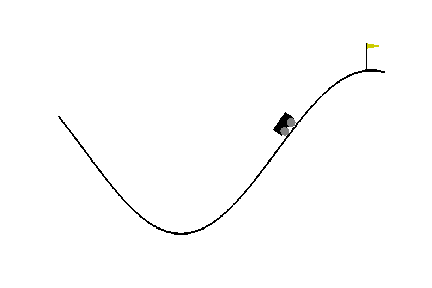
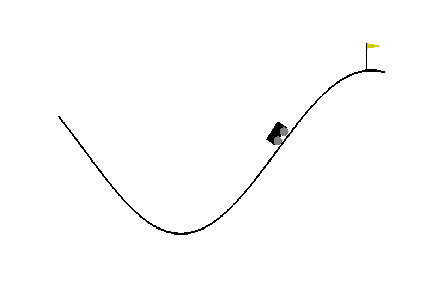
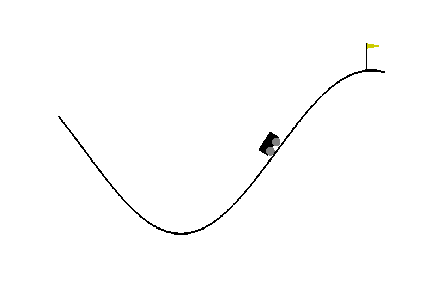
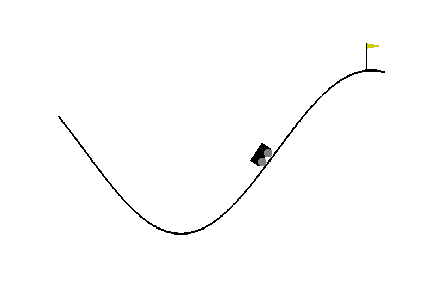
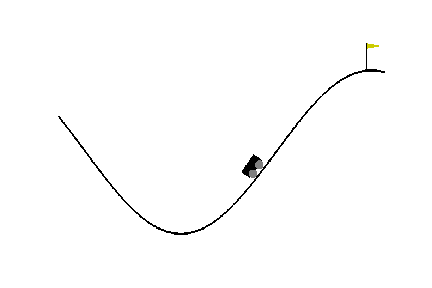
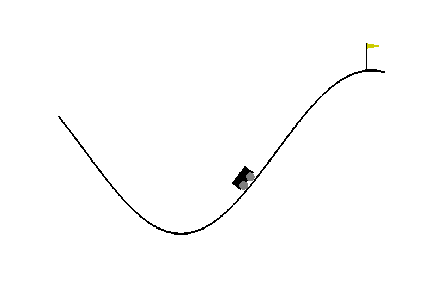
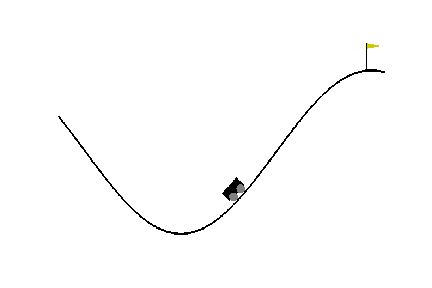
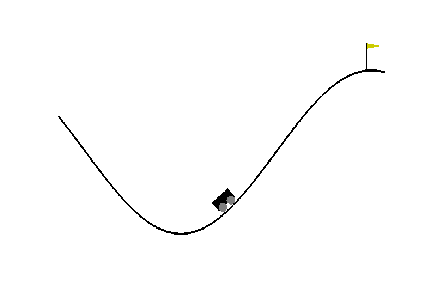
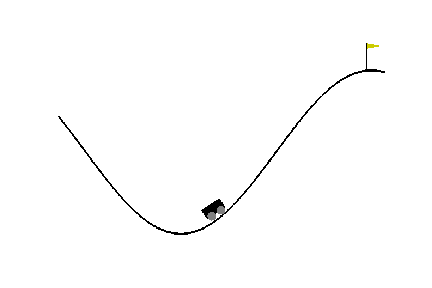
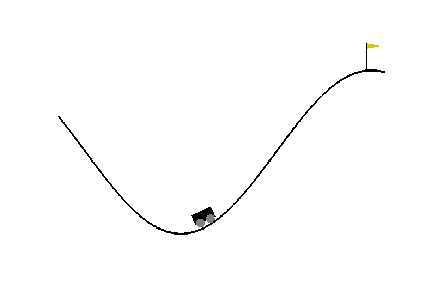
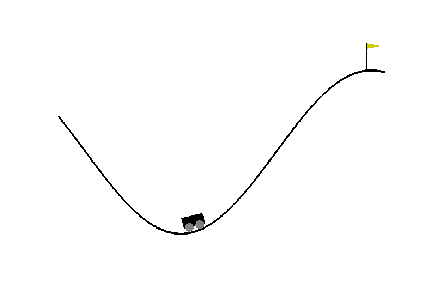
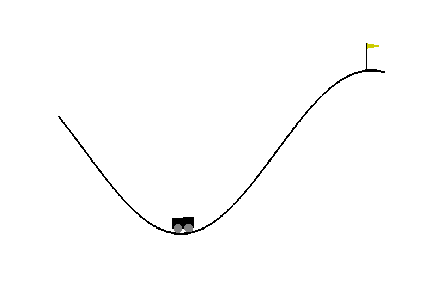
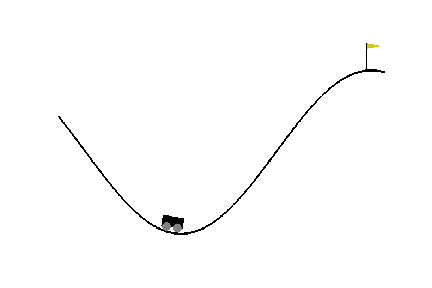
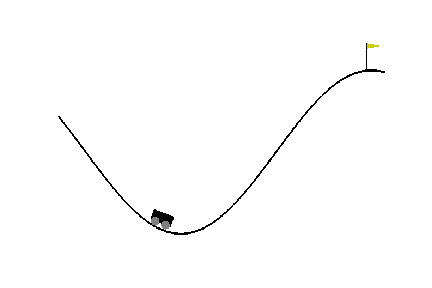
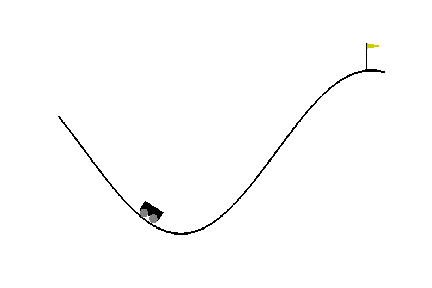
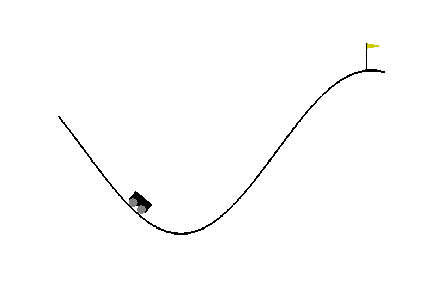
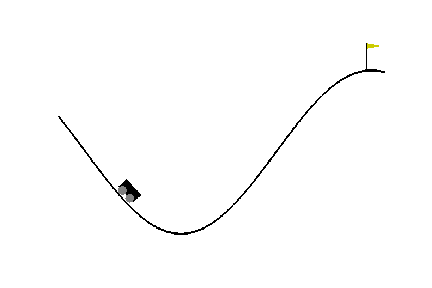
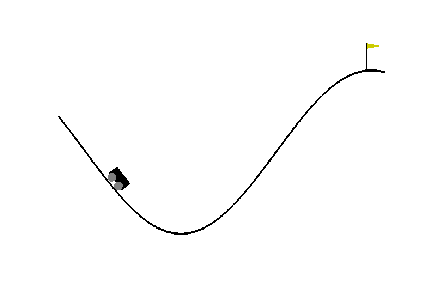
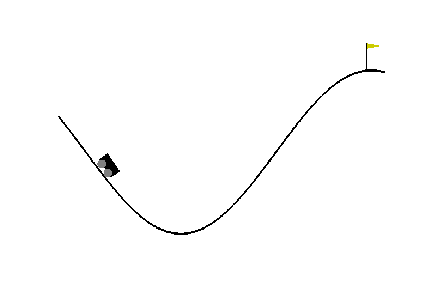
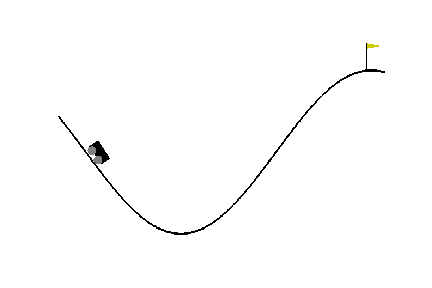
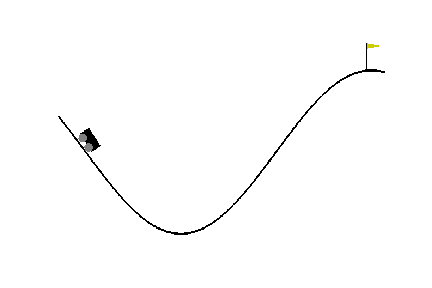
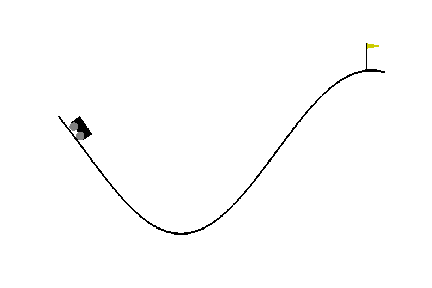
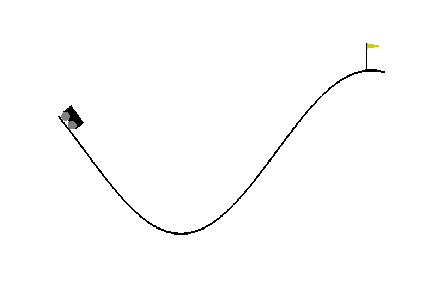
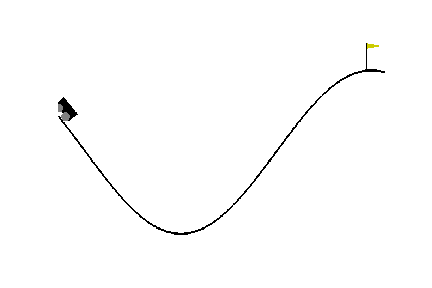
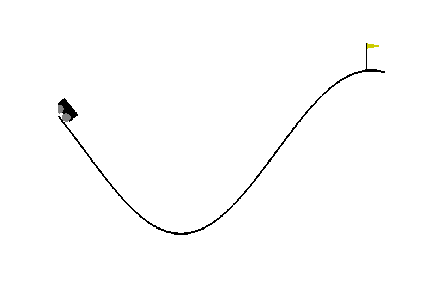
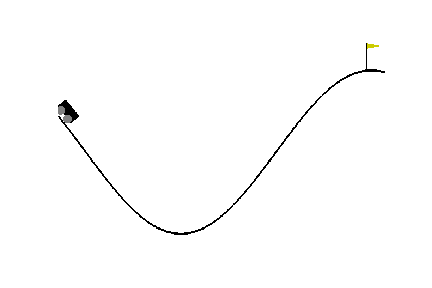
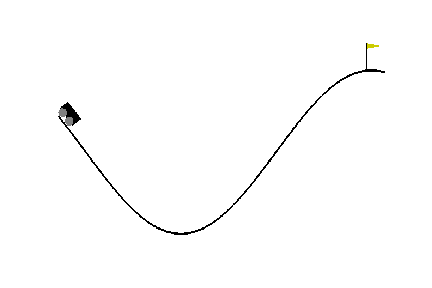
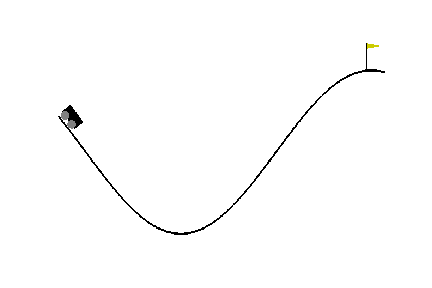
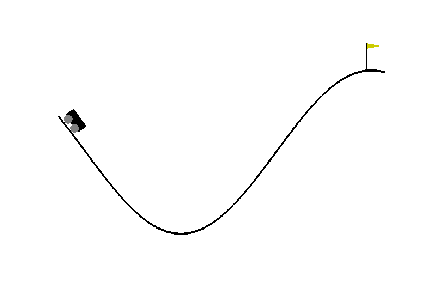
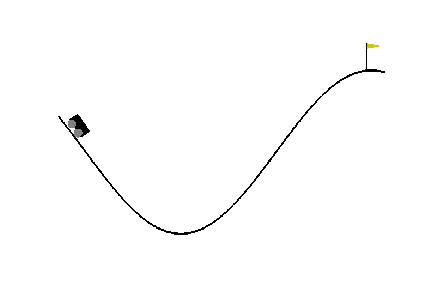
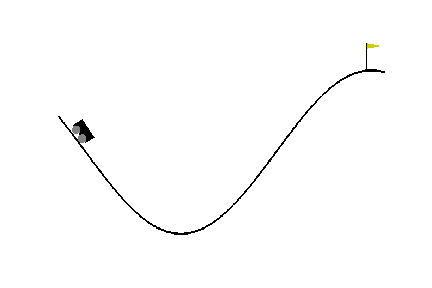
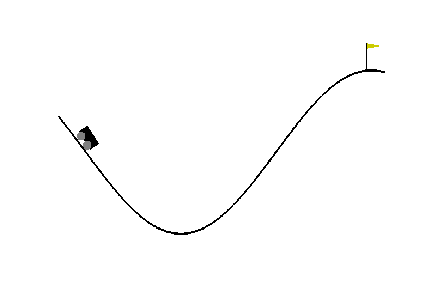
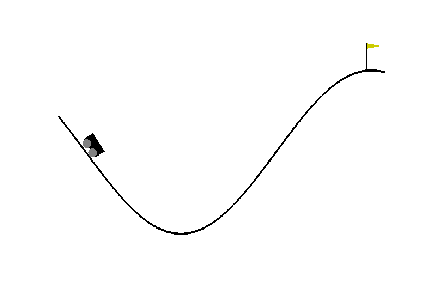
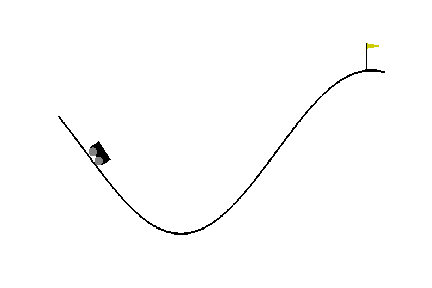
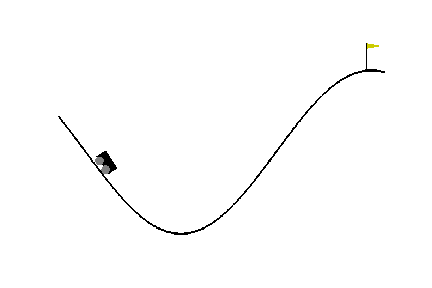
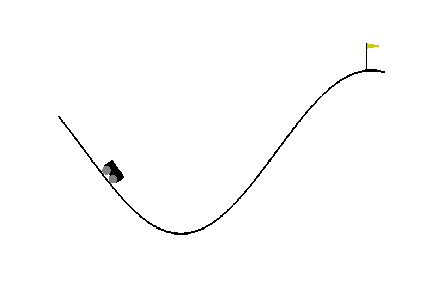
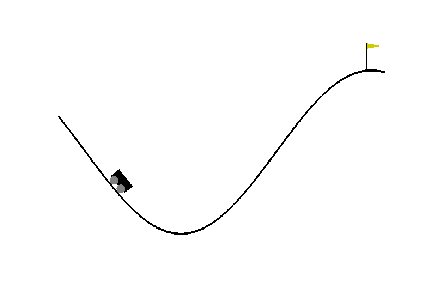
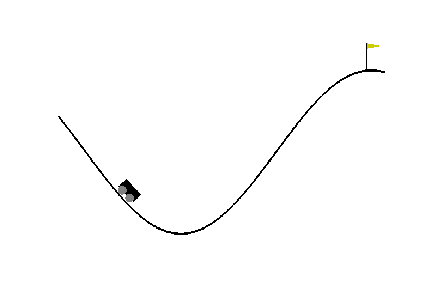
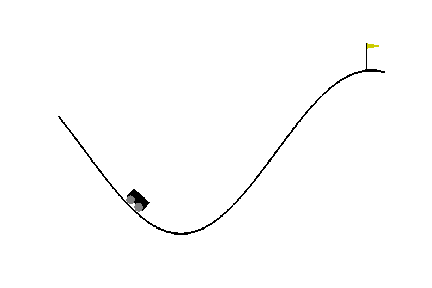
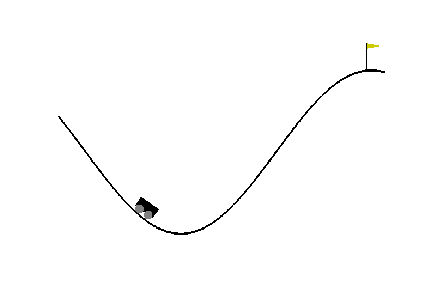
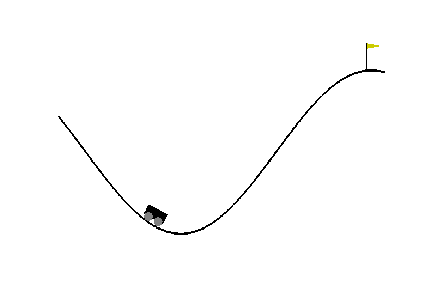
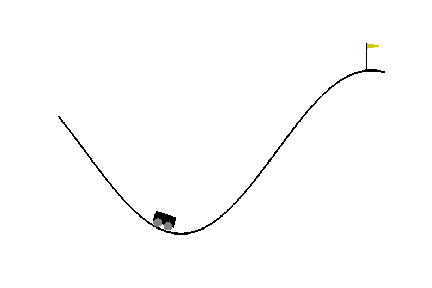

In [8]:
stat = e.train(episodes=200,agent=qtorch,plot=True)
e.test(qtorch,gif=True)

## Without Featurizing

### Tensorflow

In [9]:
qtf = QLearningTf(use_bias=True,featurizer=None,scaler=None)

  0%|          | 0/100 [00:00<?, ?it/s]

Model Created!


Epsilon : 3.7074446659261245e-44, Num Steps : 199, Avg Reward with Window Size 100 : -200.0: 100%|██████████| 100/100 [03:33<00:00,  2.13s/it]
/Users/shyam/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/shyam/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


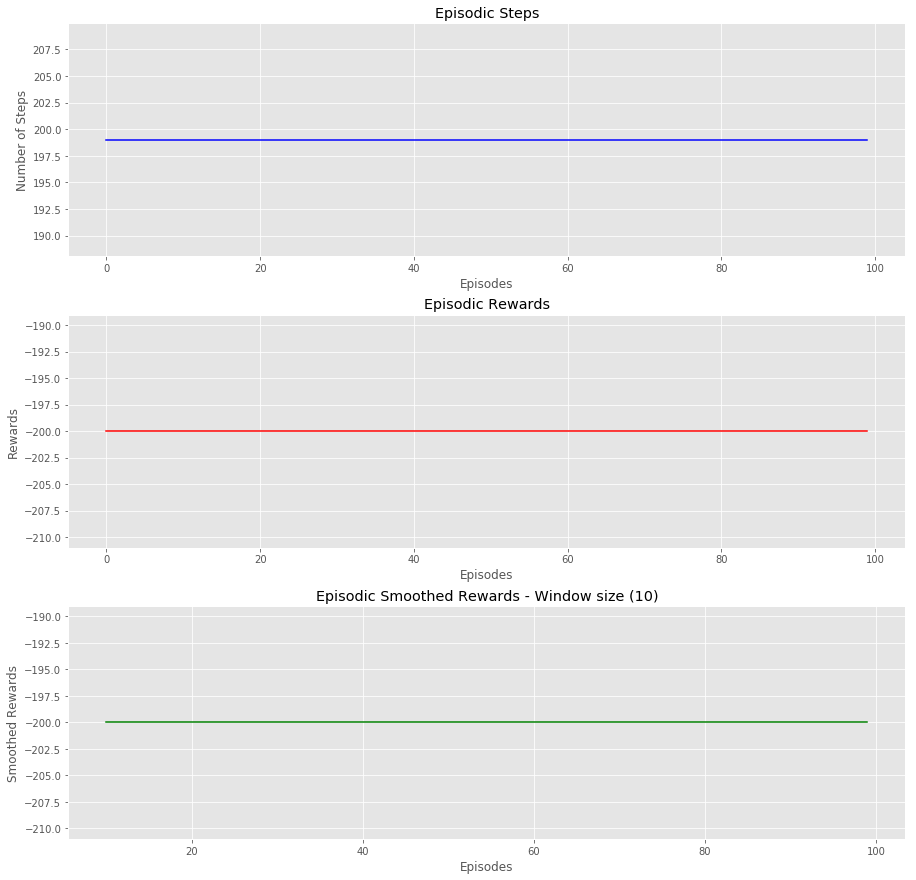

Total reward for episode 0: -200.0



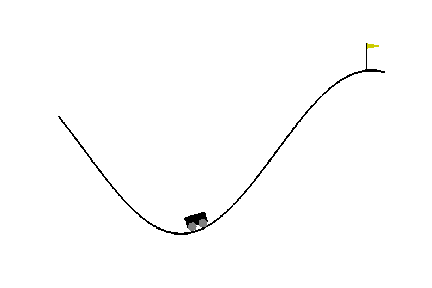
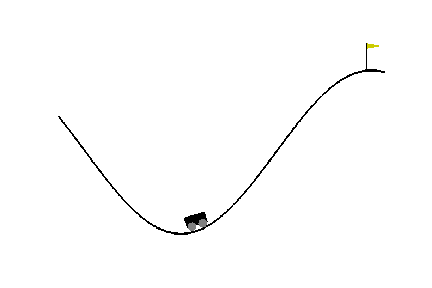
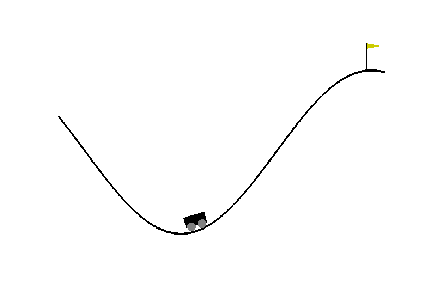
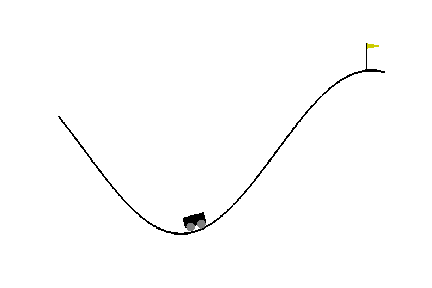
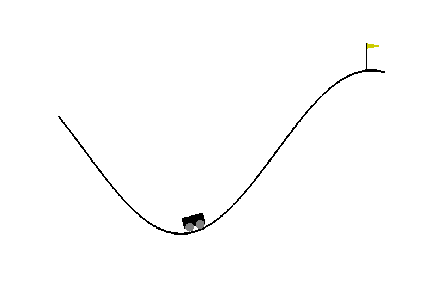
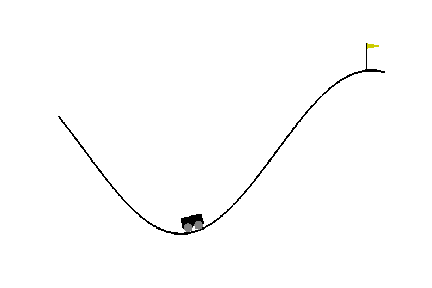
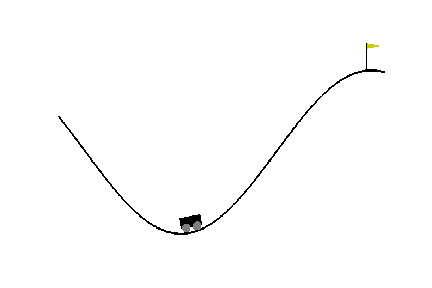
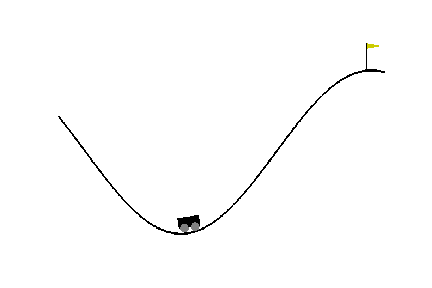
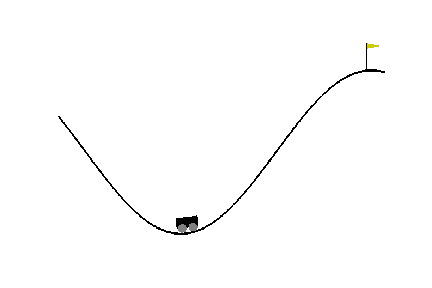
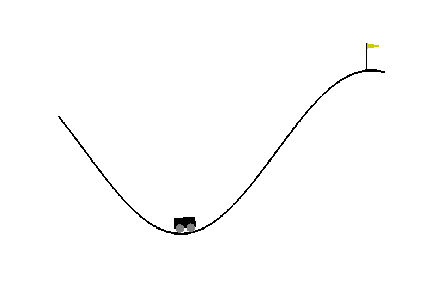
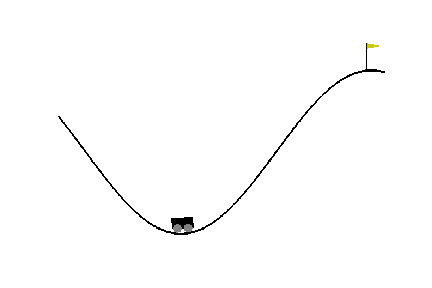
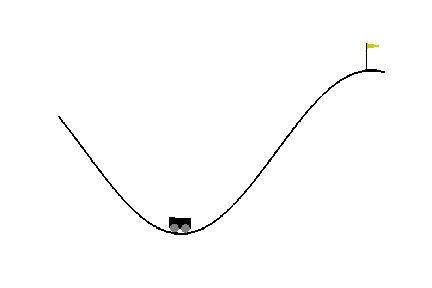
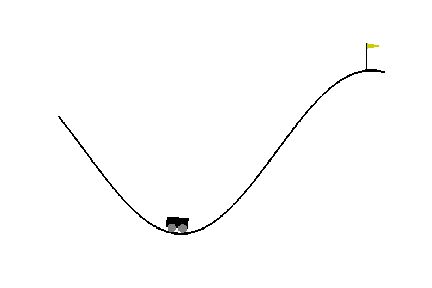
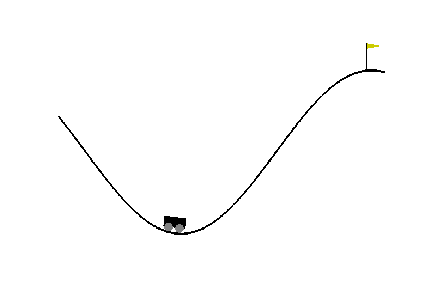
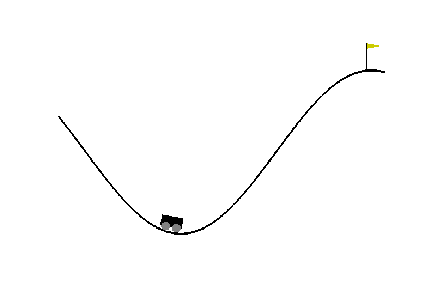
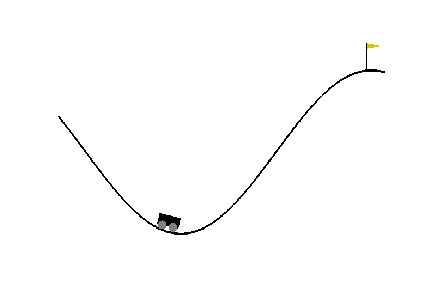
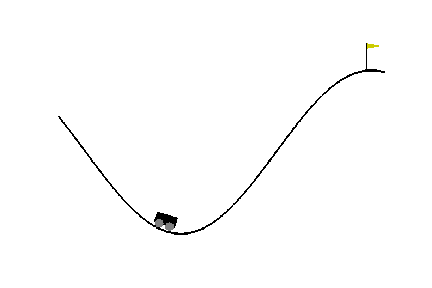
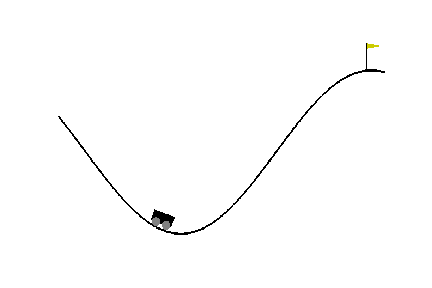
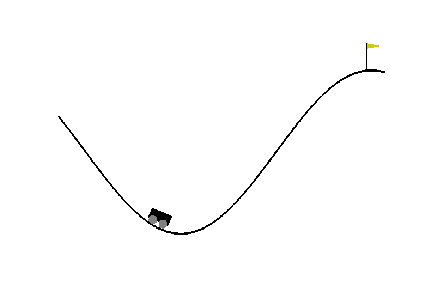
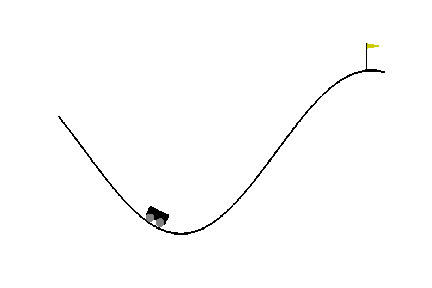
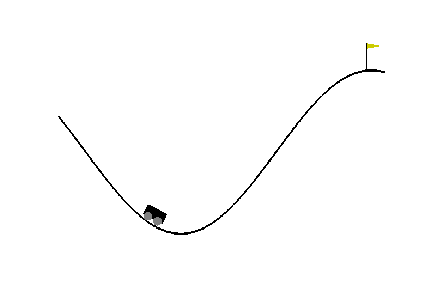
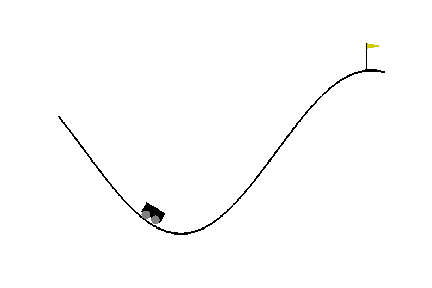
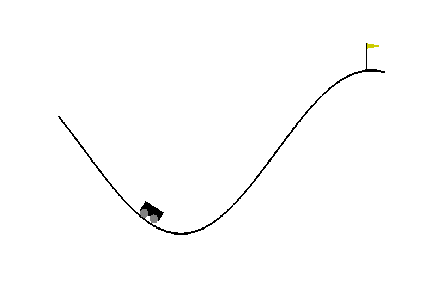
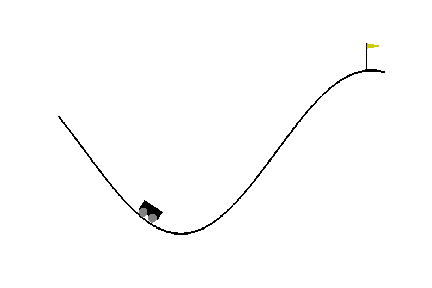
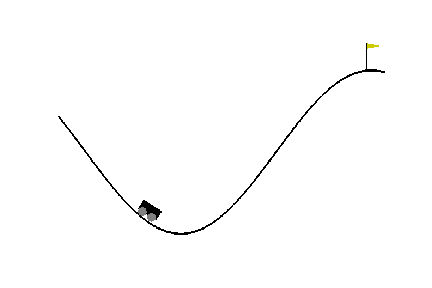
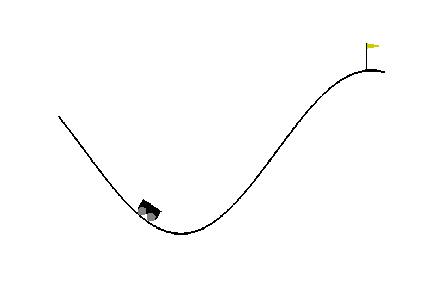
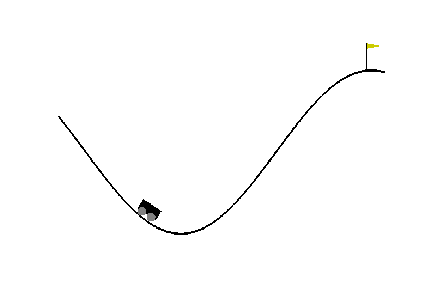
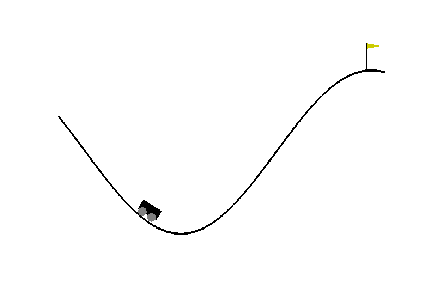
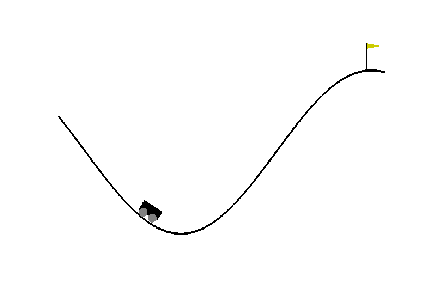
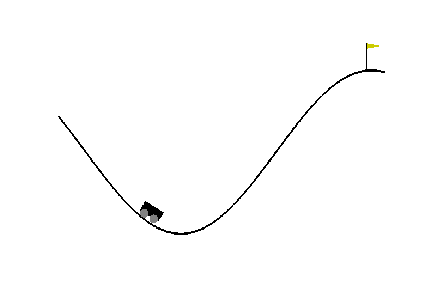
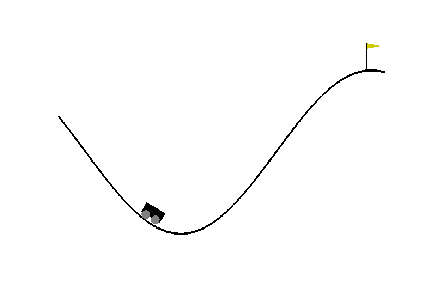
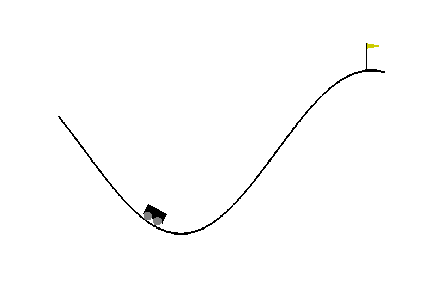
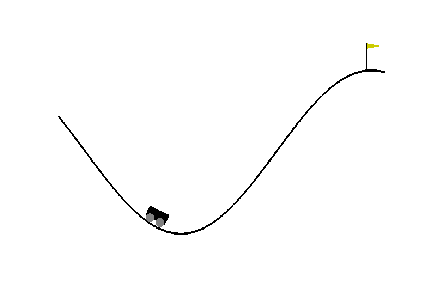
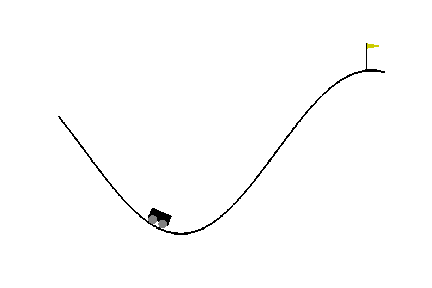
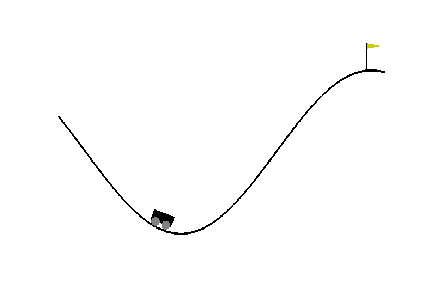
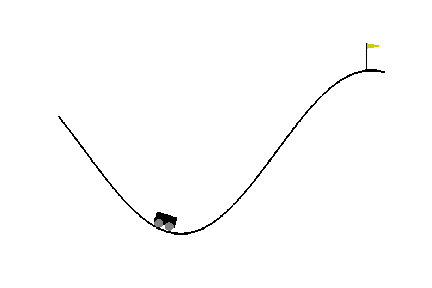
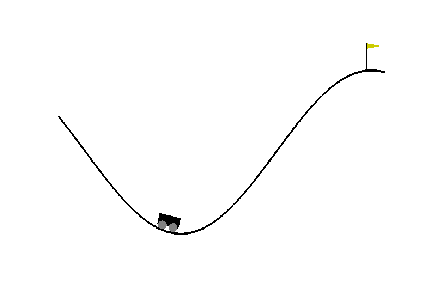
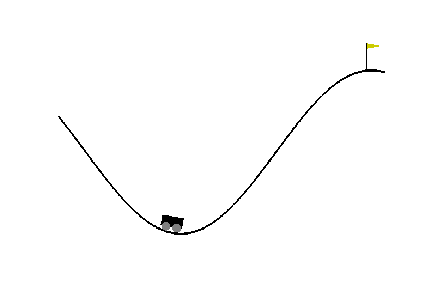
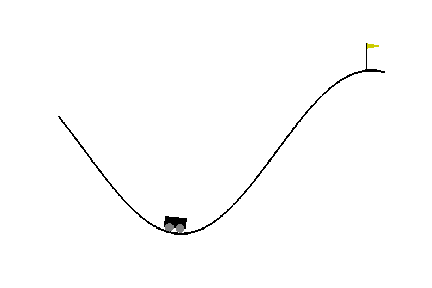
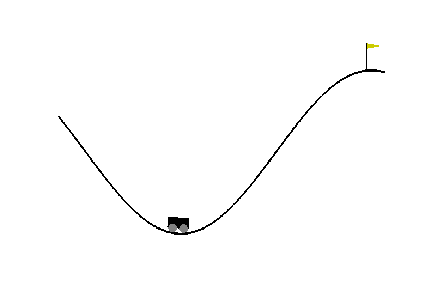
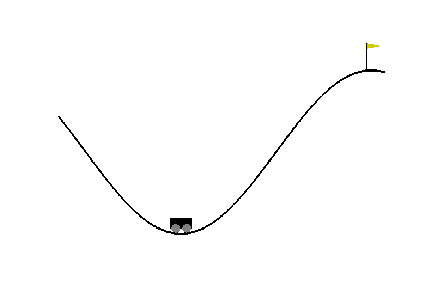
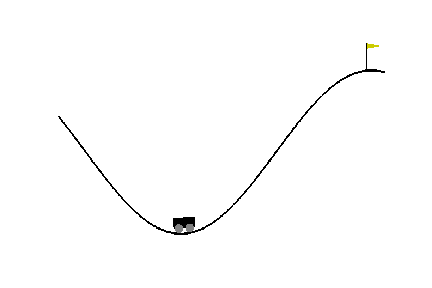
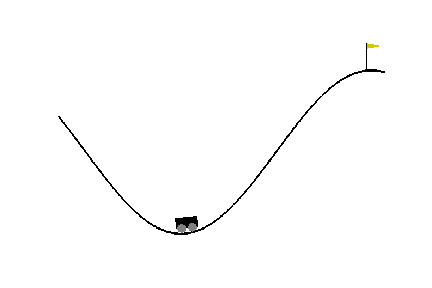
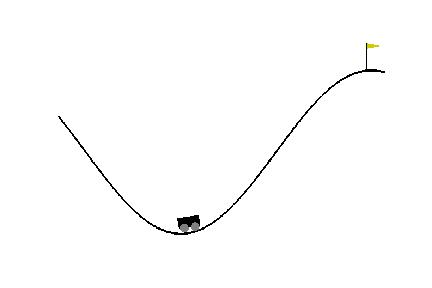
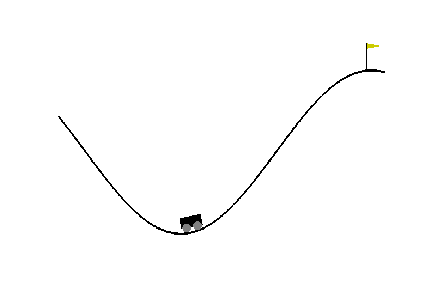
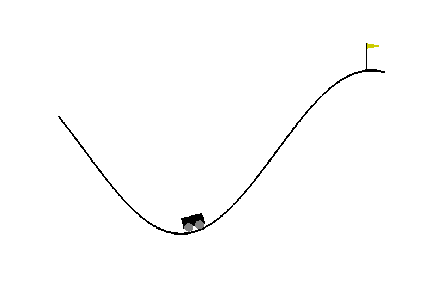
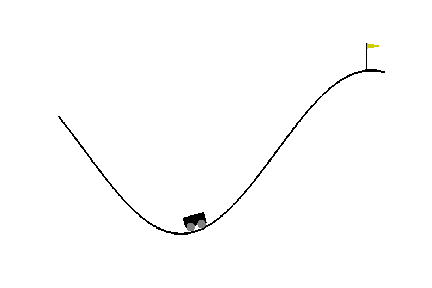
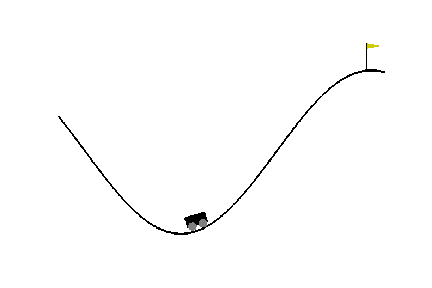
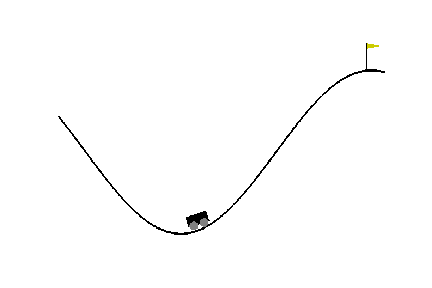
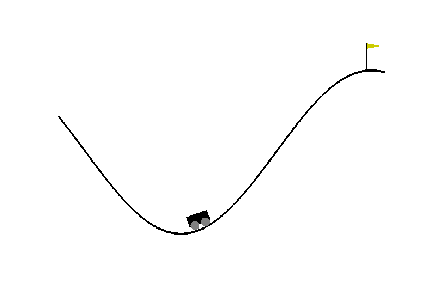
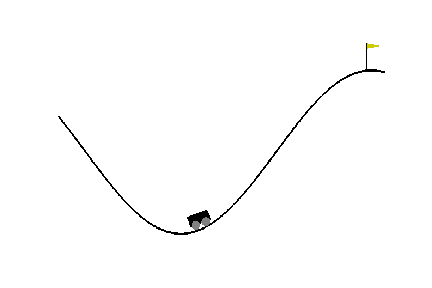
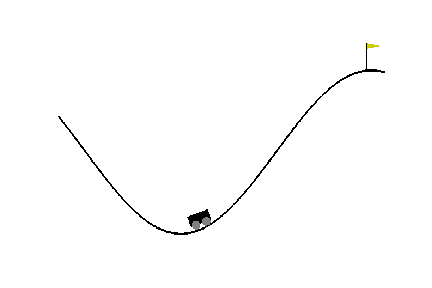
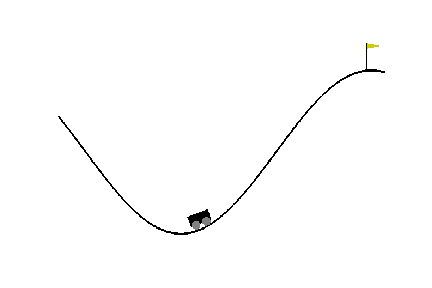
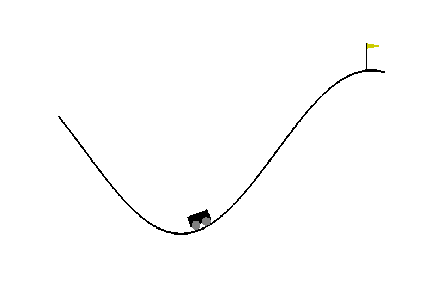
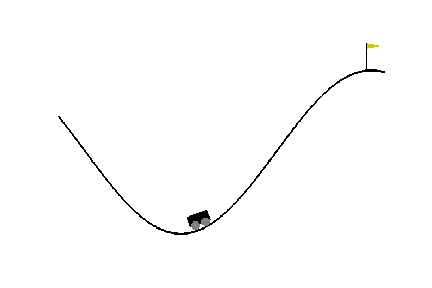
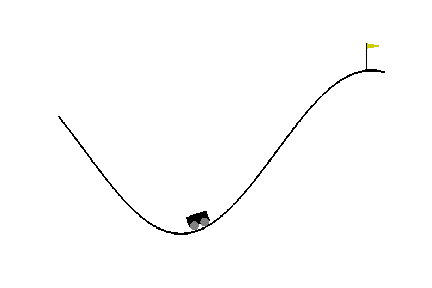
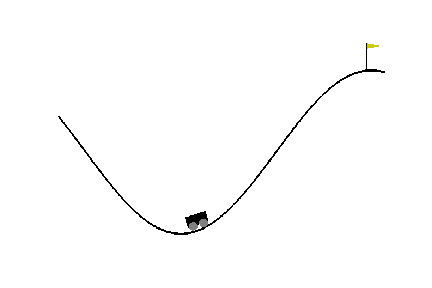
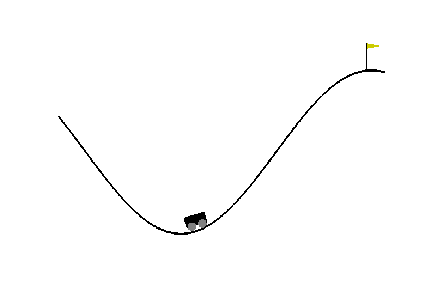
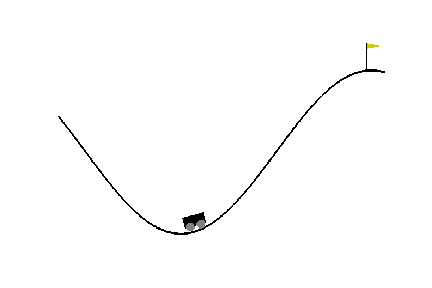
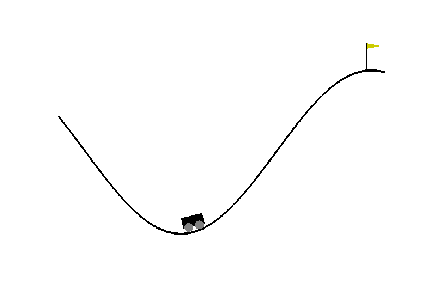
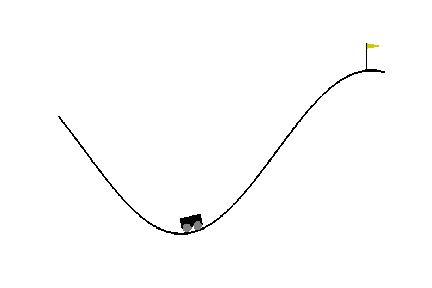
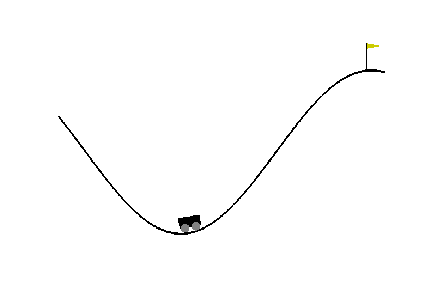
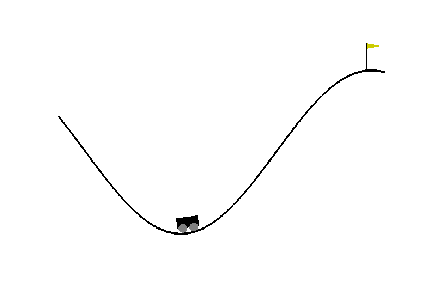
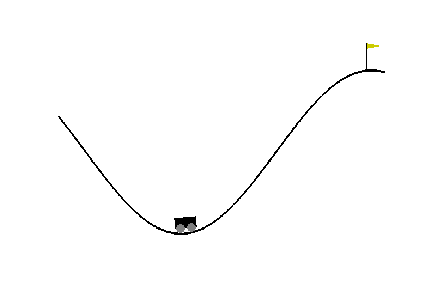
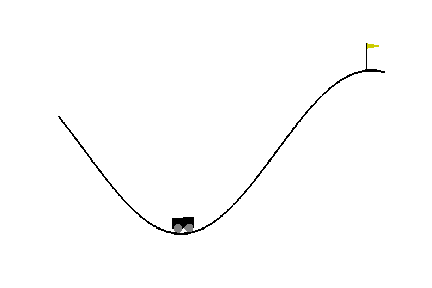
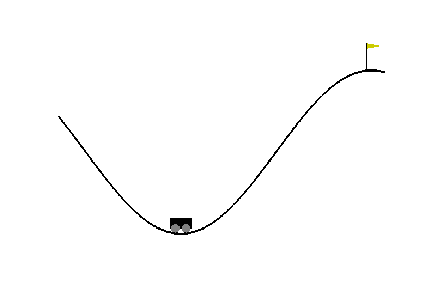
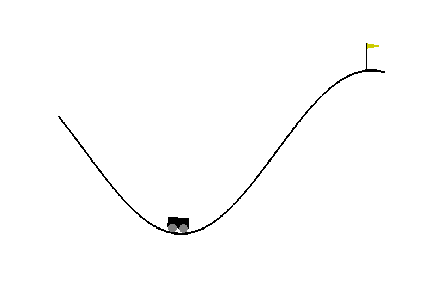
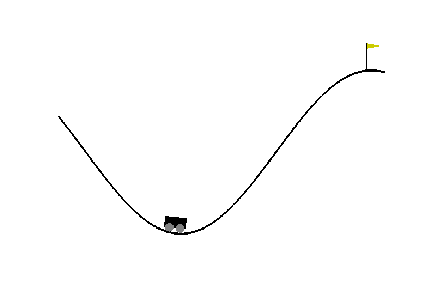
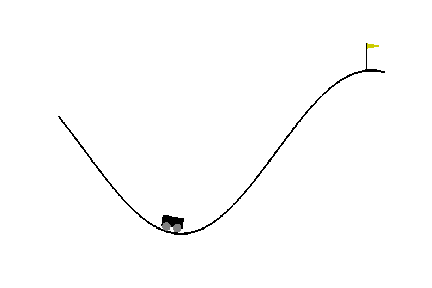
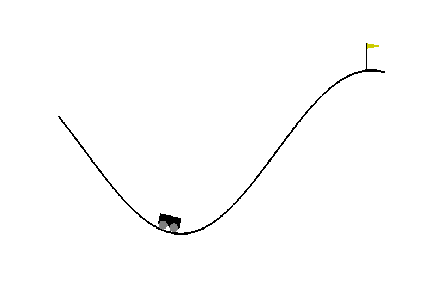
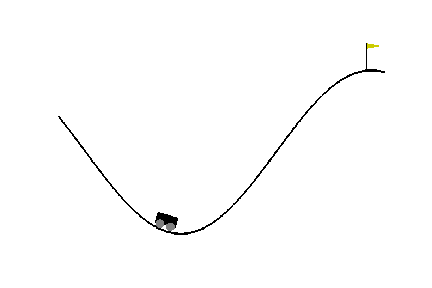
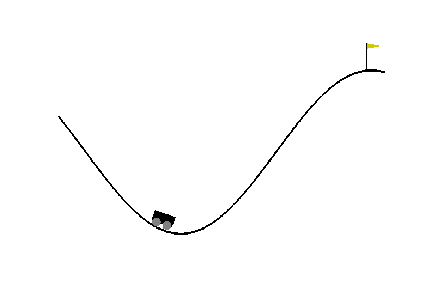
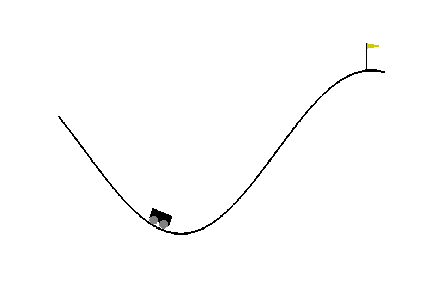
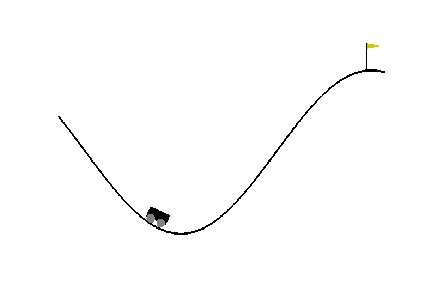
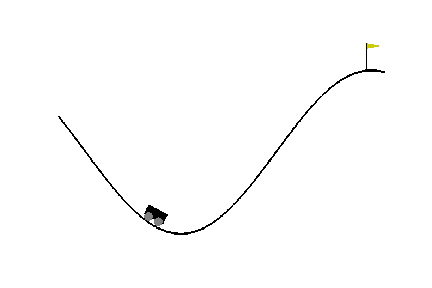
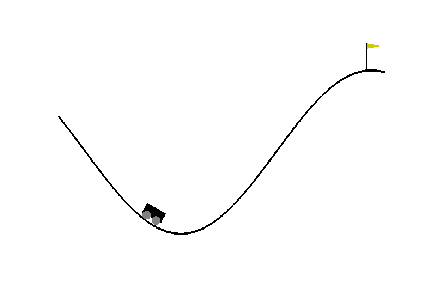
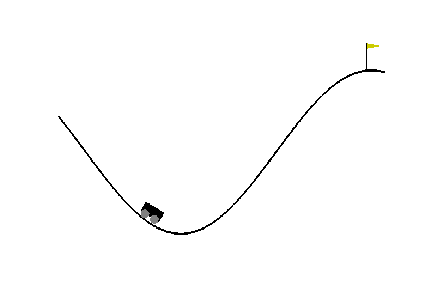
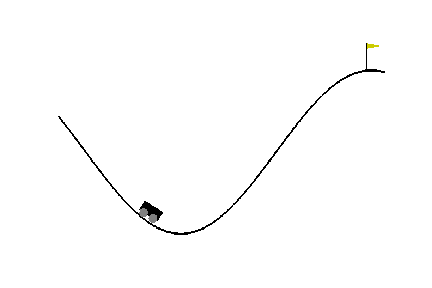
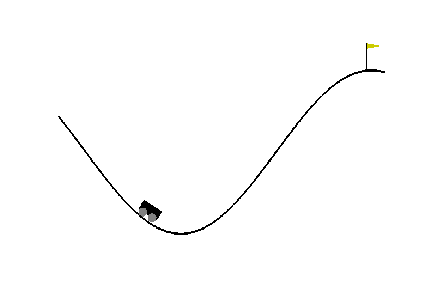
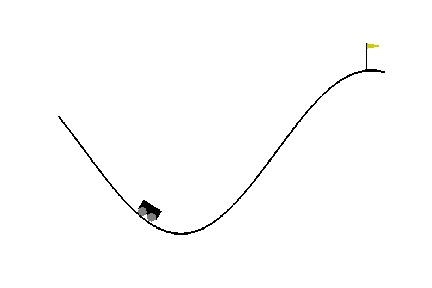
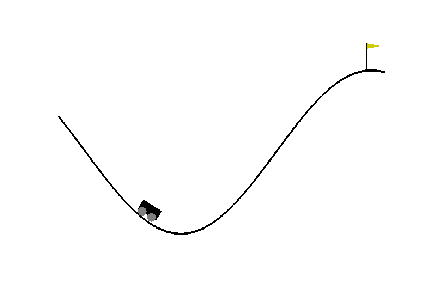
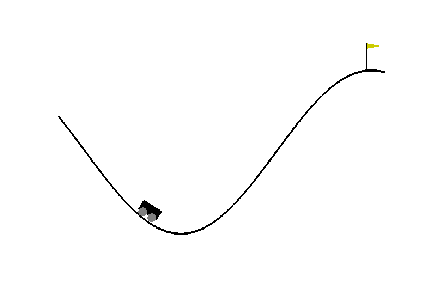
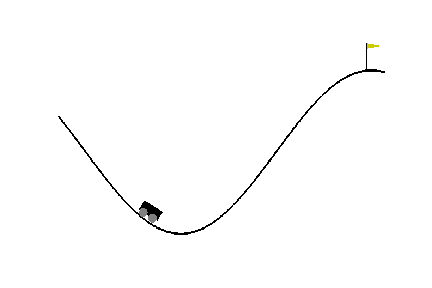
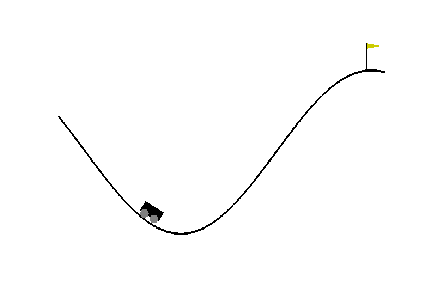
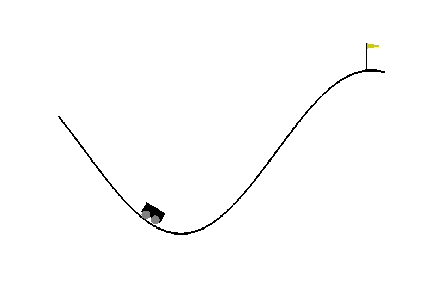
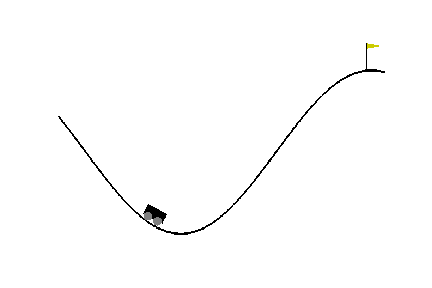
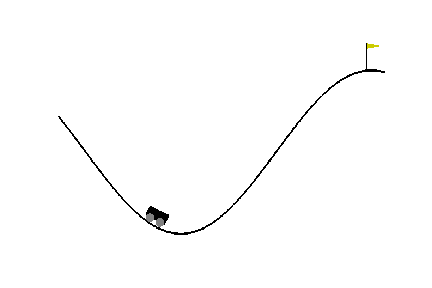
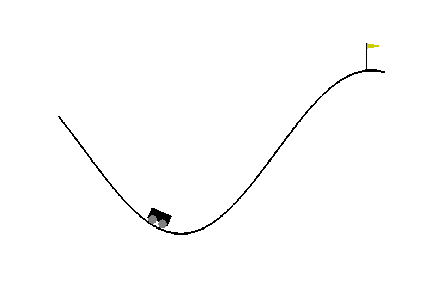
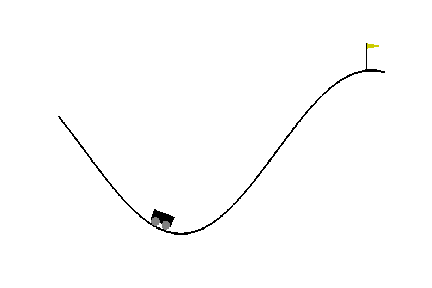
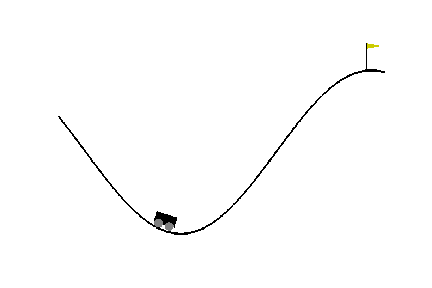
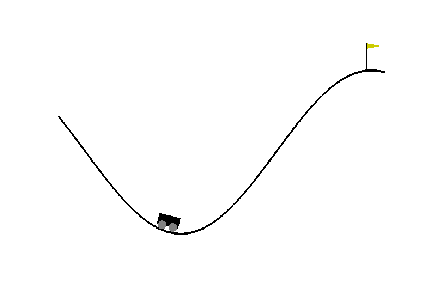
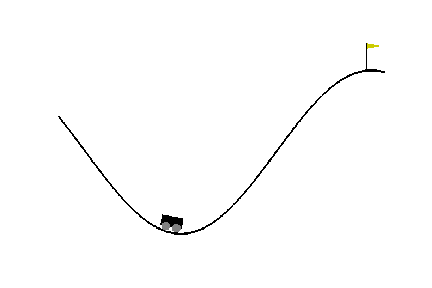
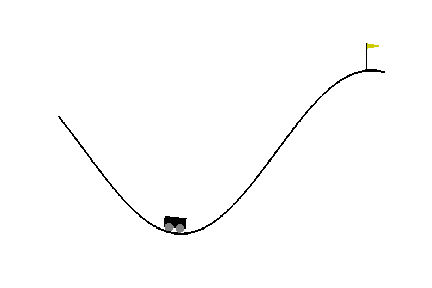
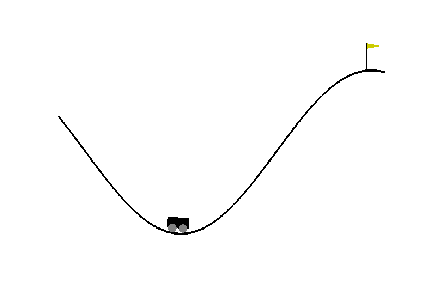
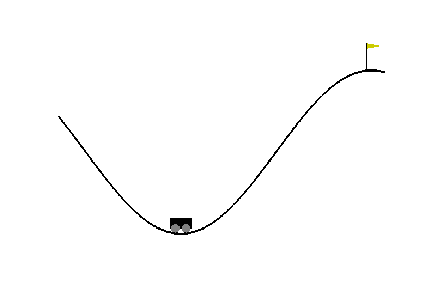
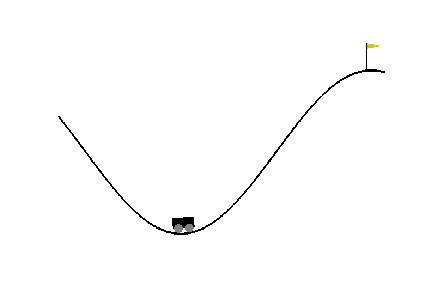
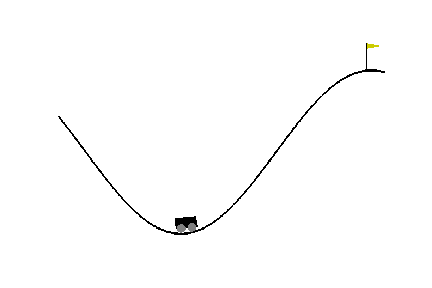
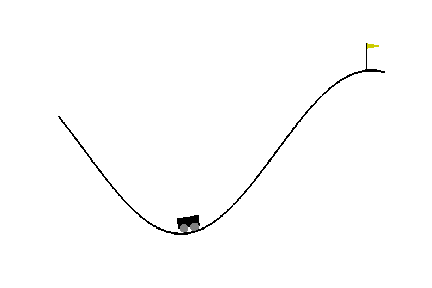
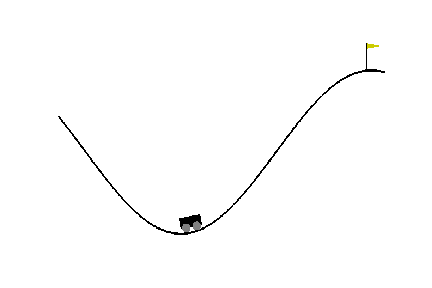
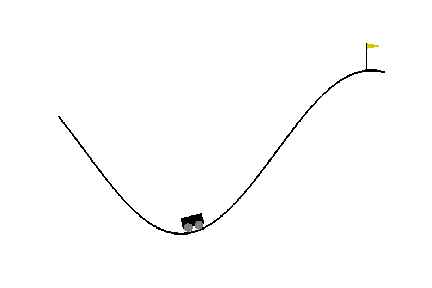
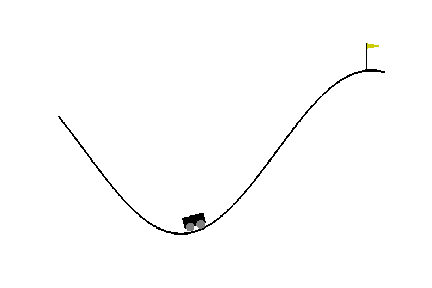
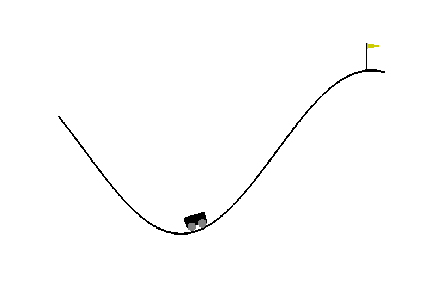
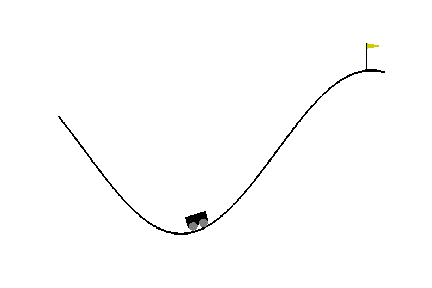
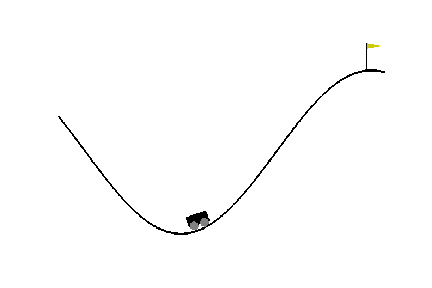
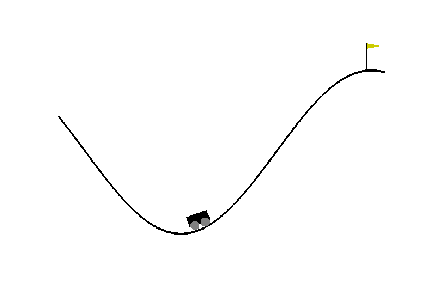
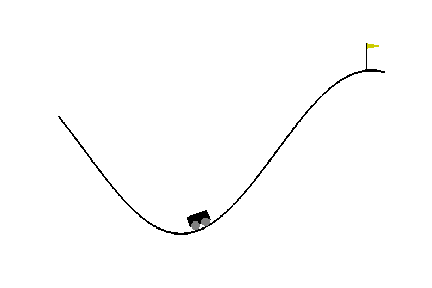
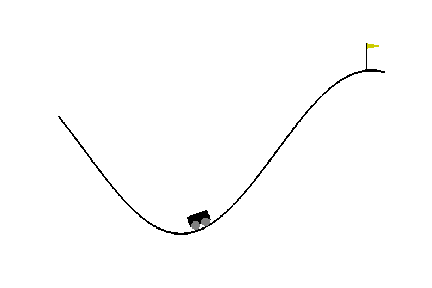
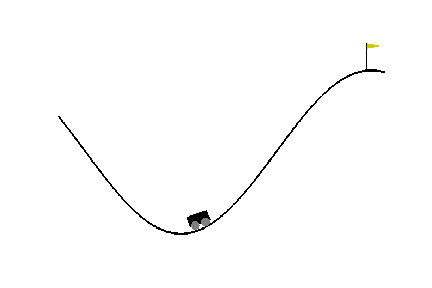
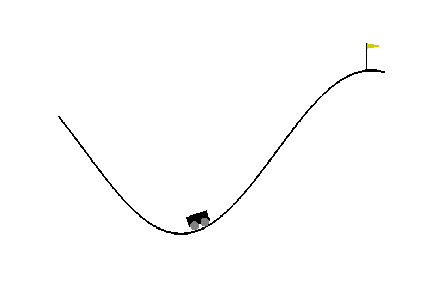
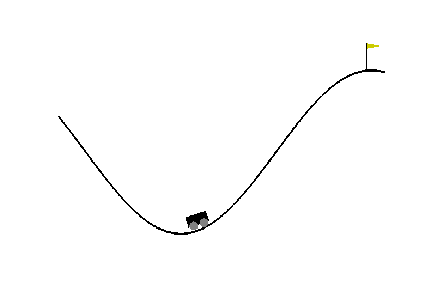
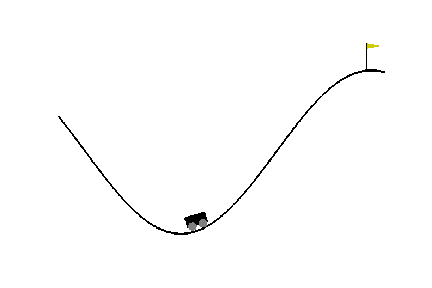
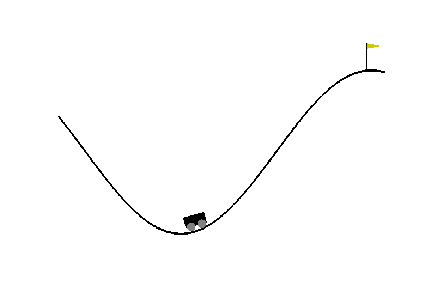
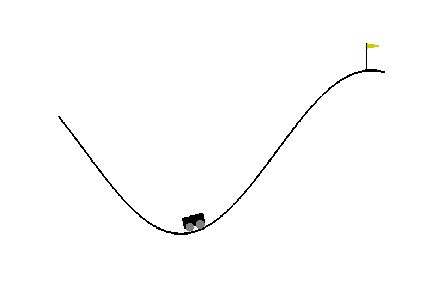
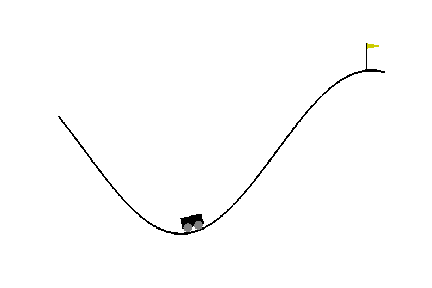
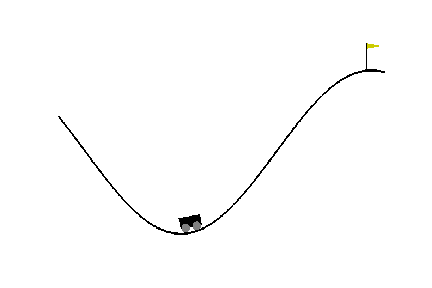
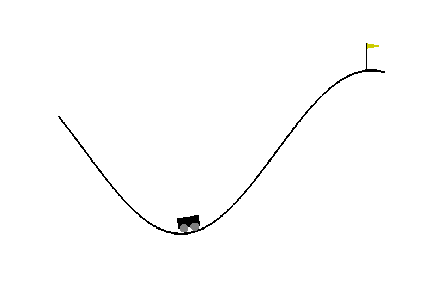
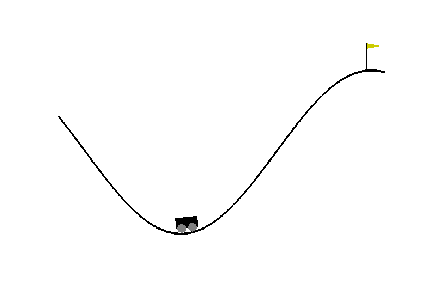
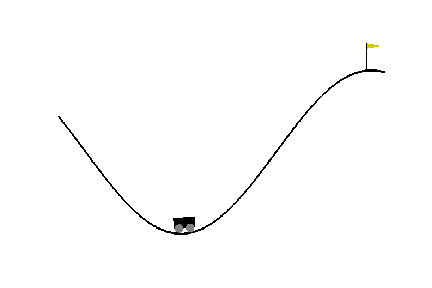
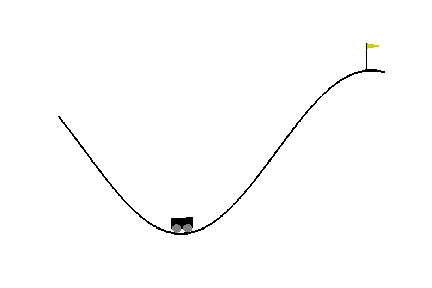
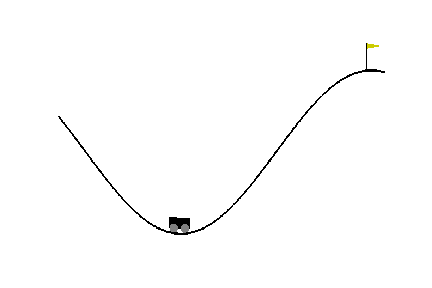
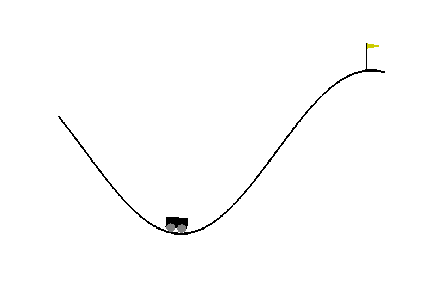
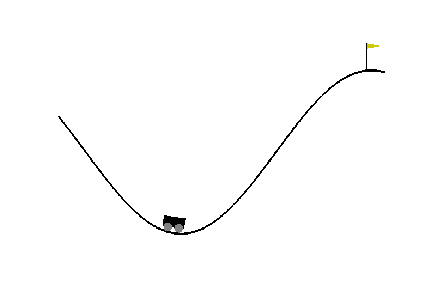
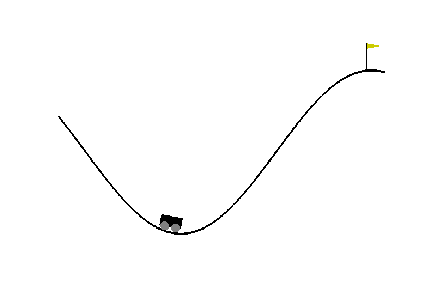
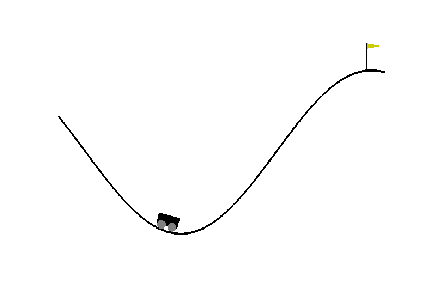
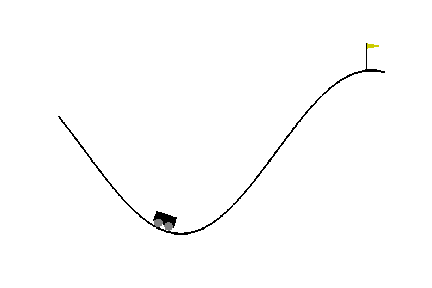
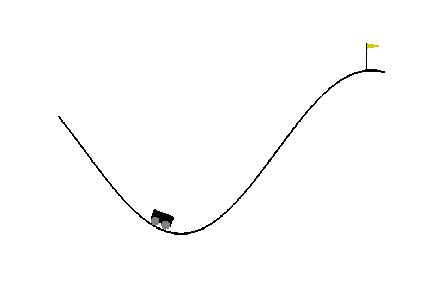
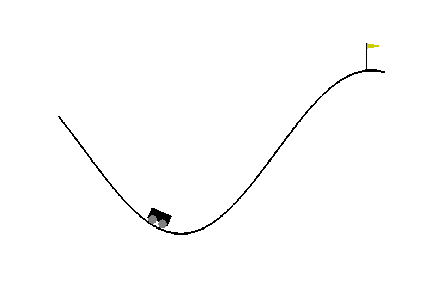
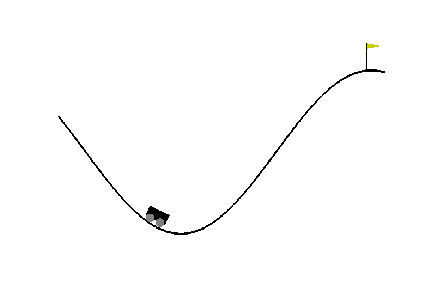
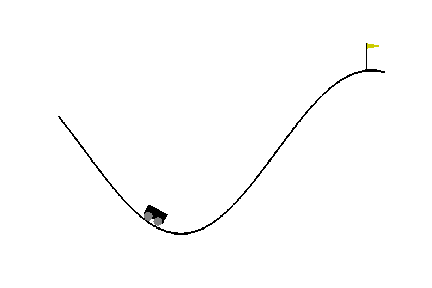
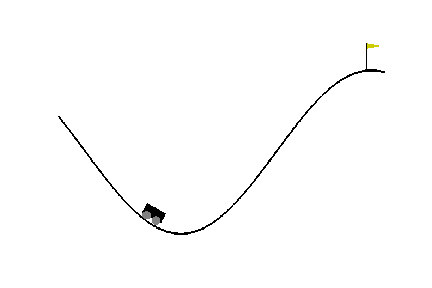
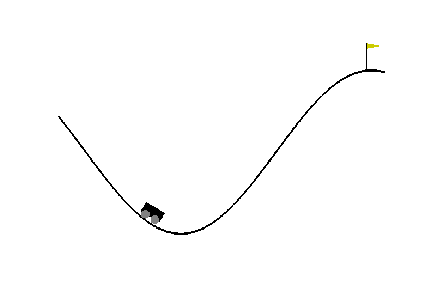
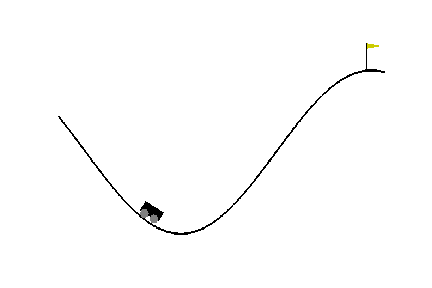
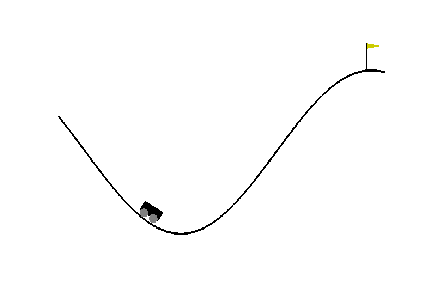
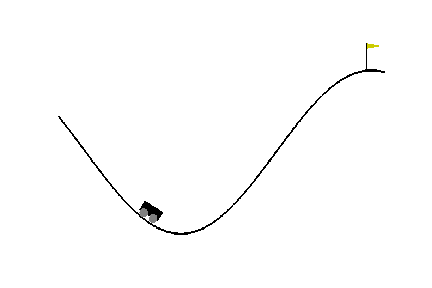
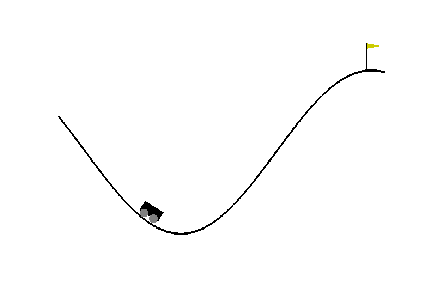
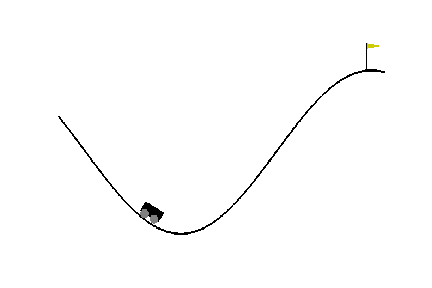
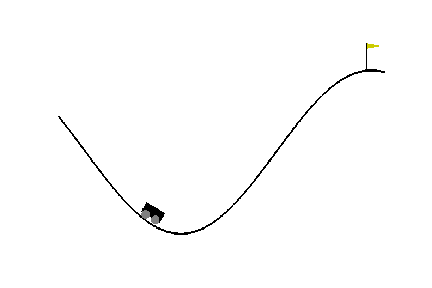
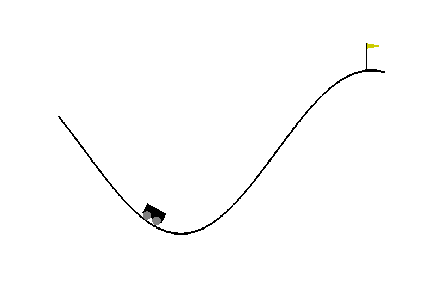
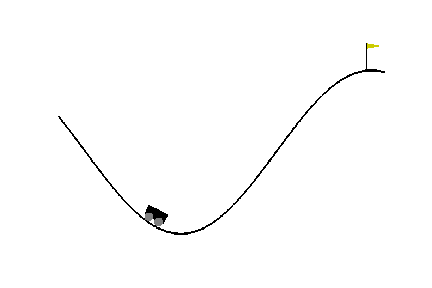
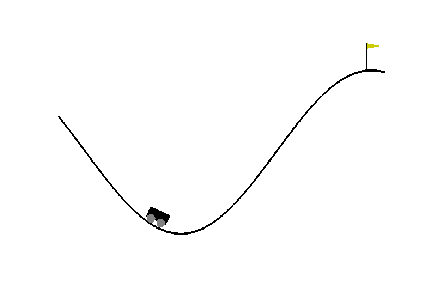
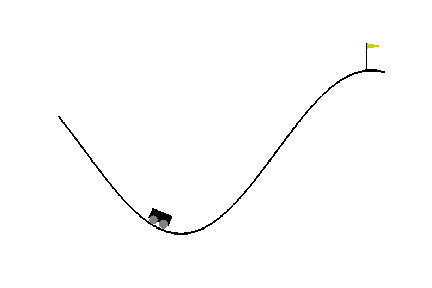
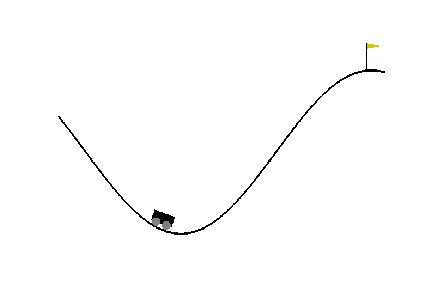
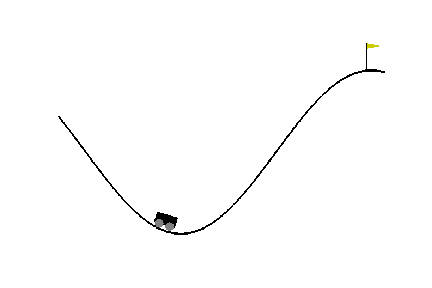
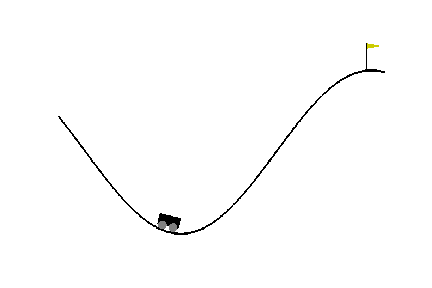
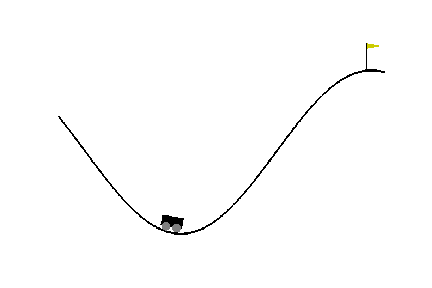
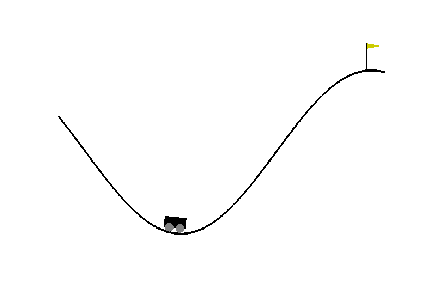
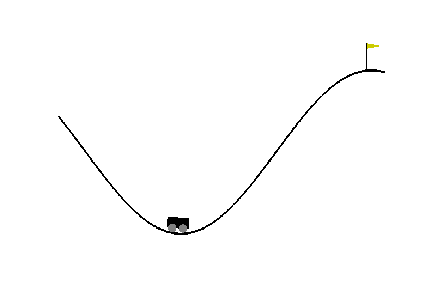
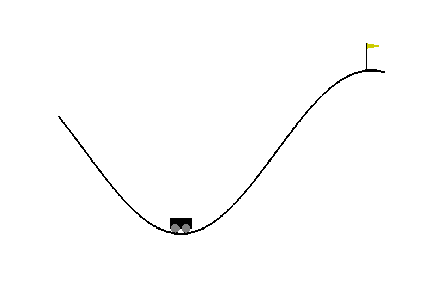
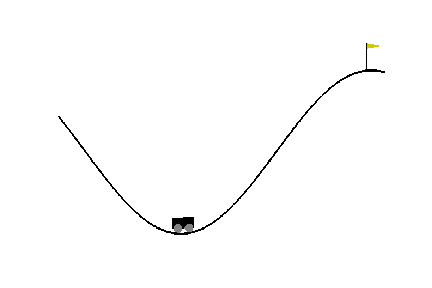
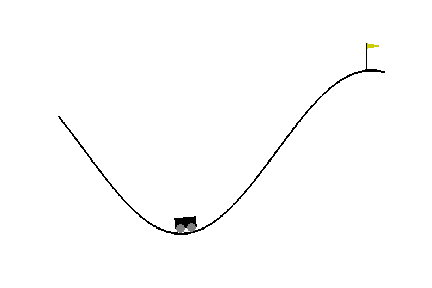
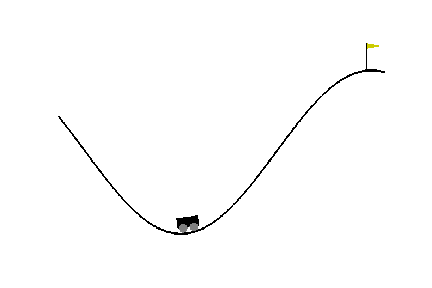
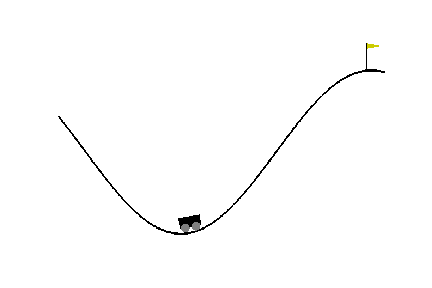
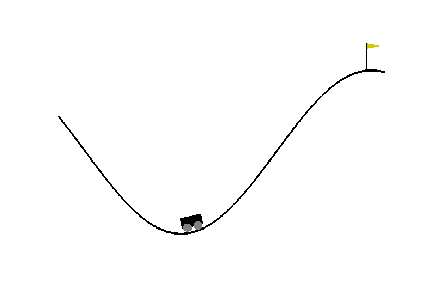
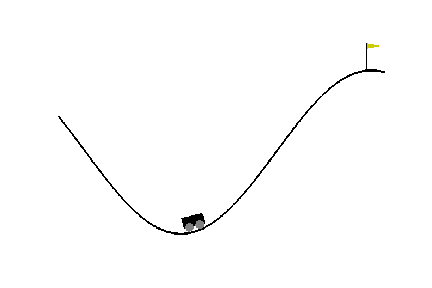
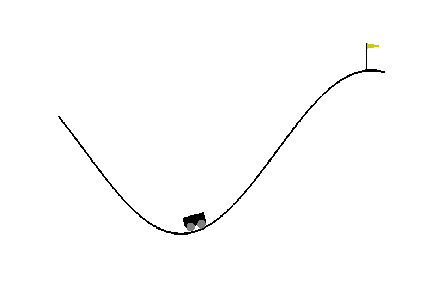
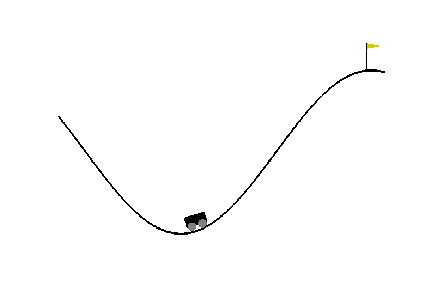
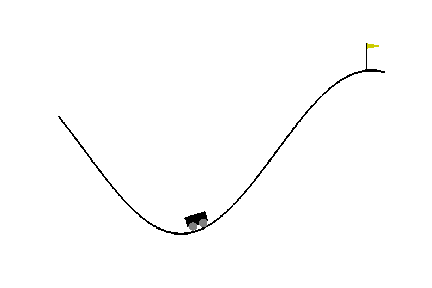
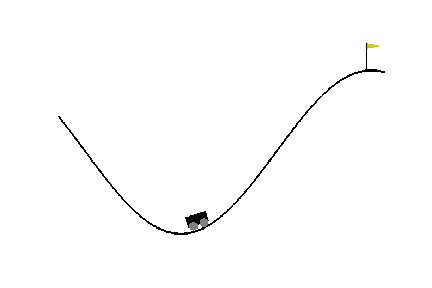
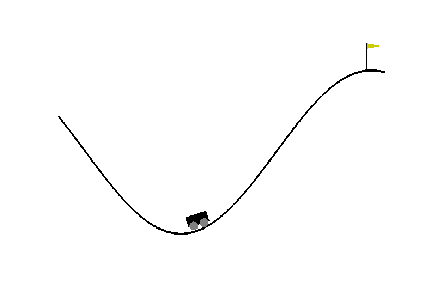
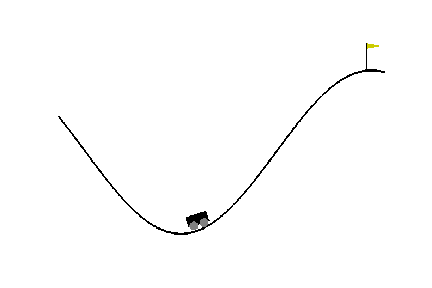
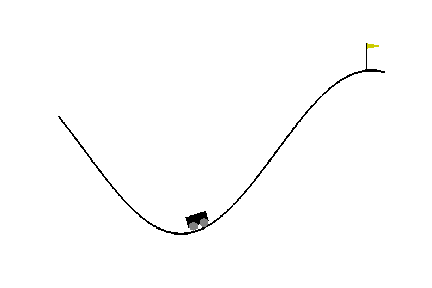
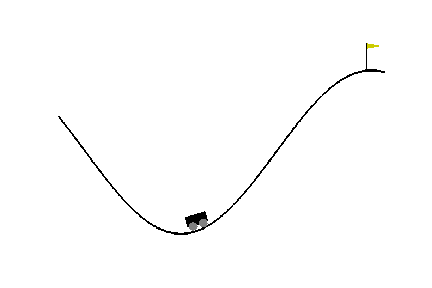
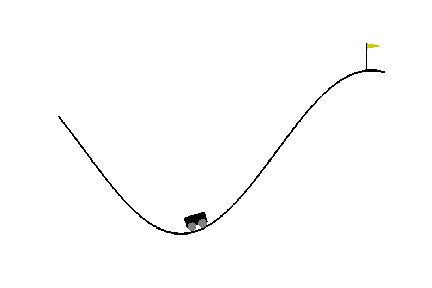
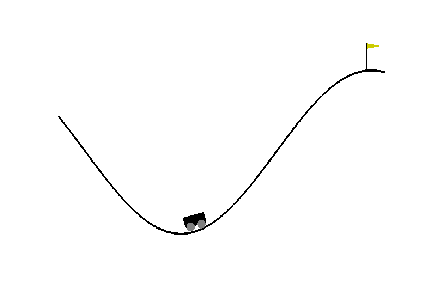
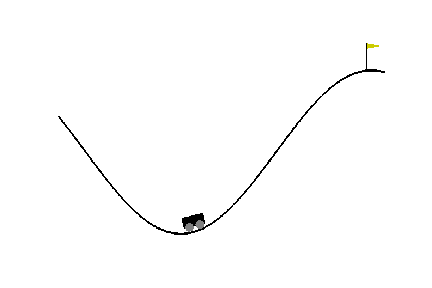
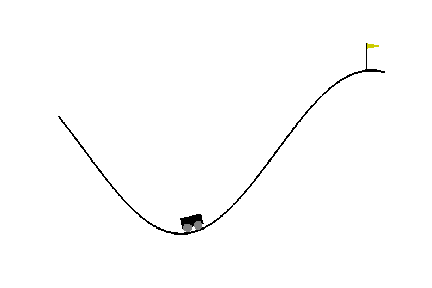
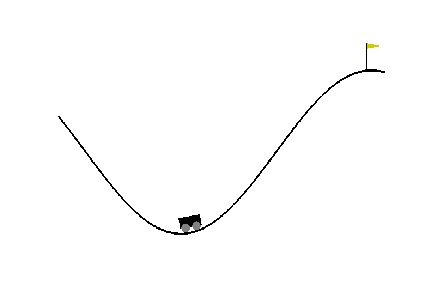
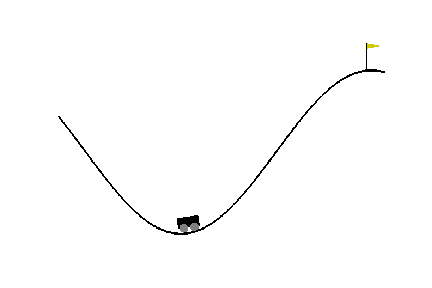
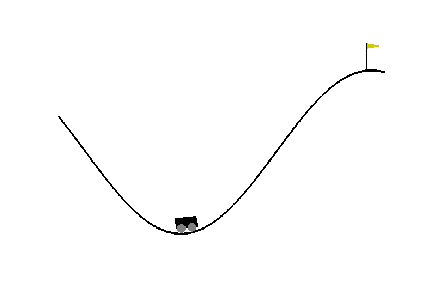
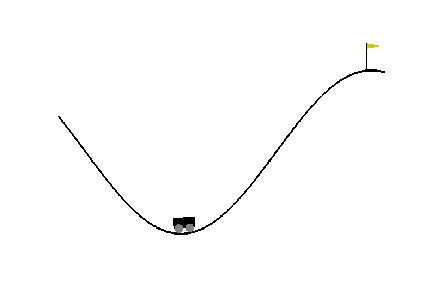
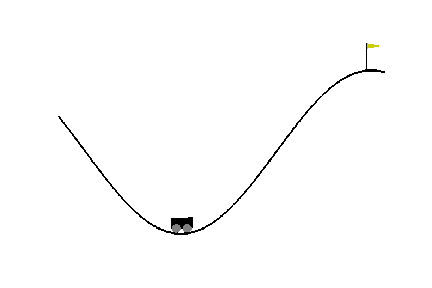
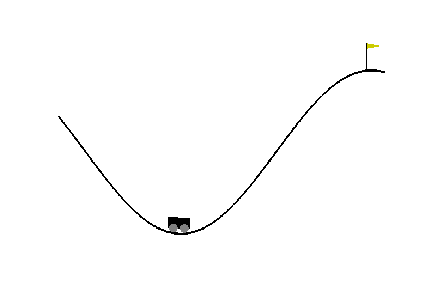
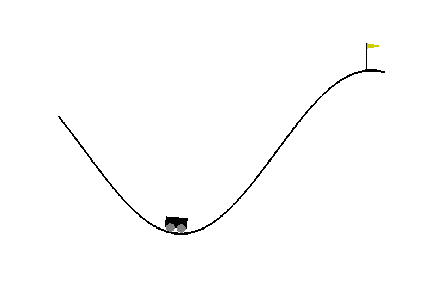
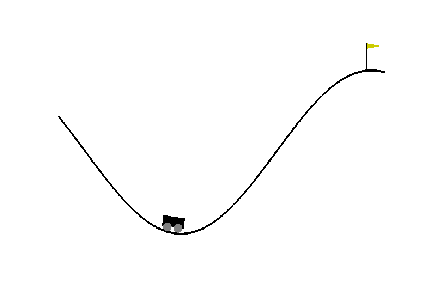
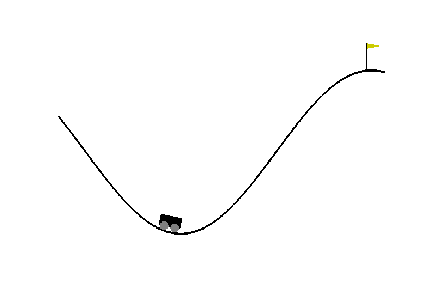
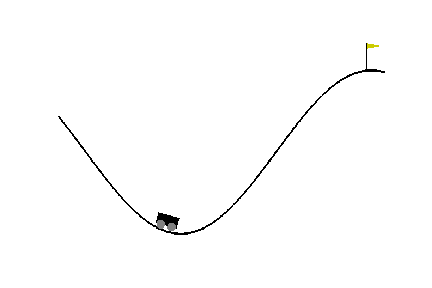
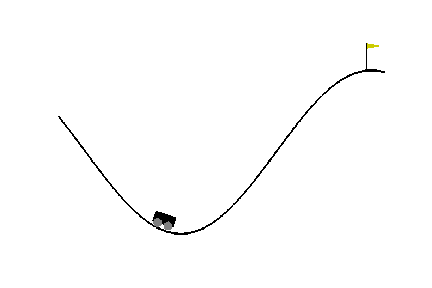
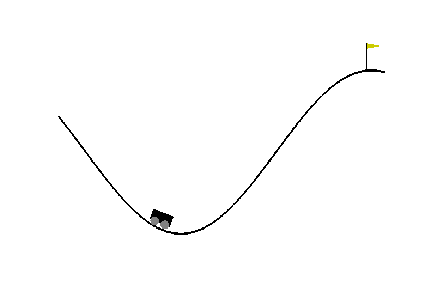
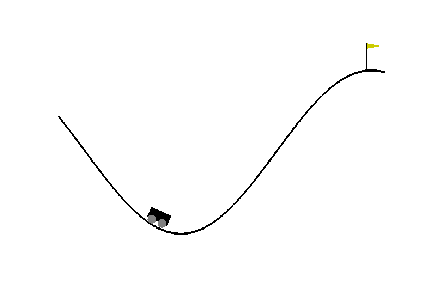
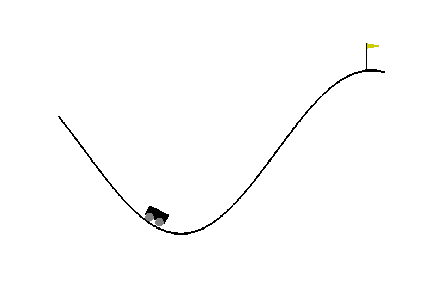
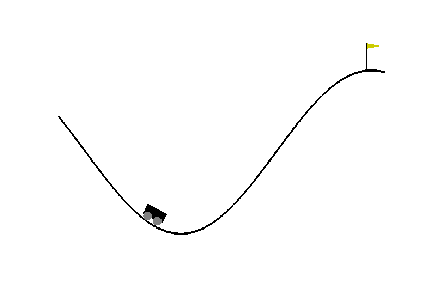
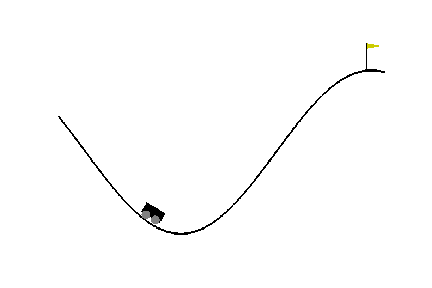
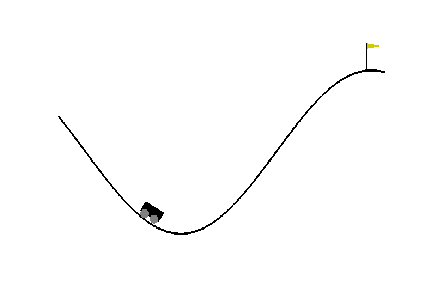
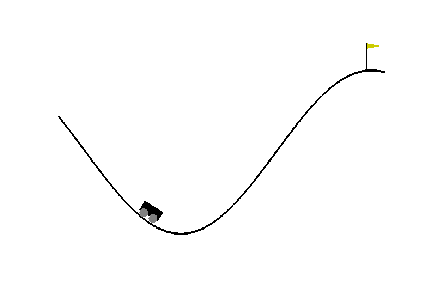
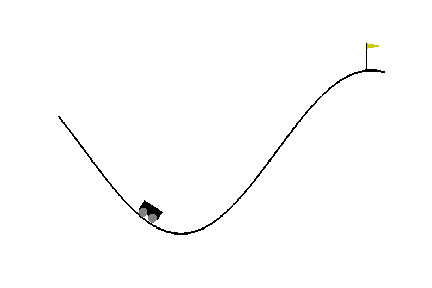
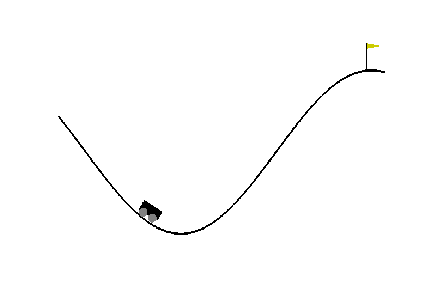
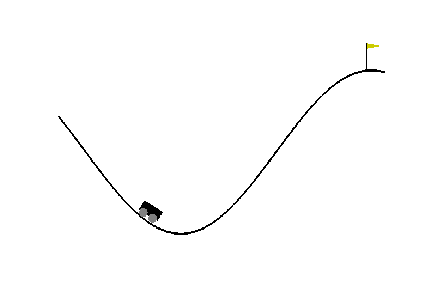
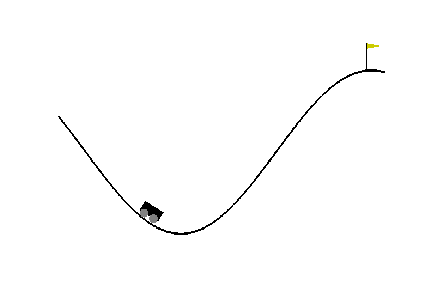
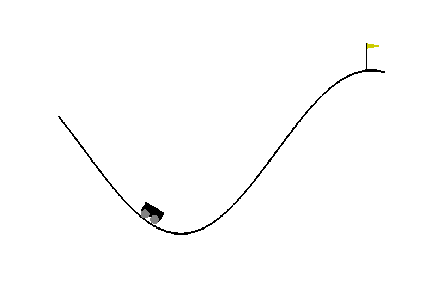
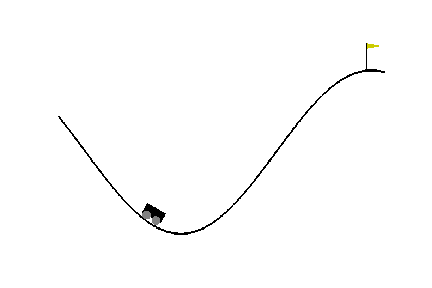
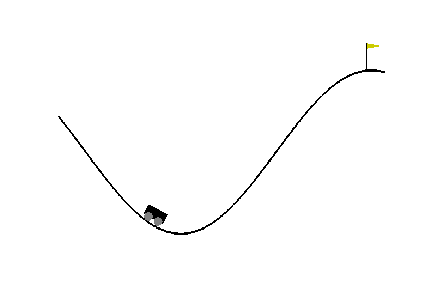
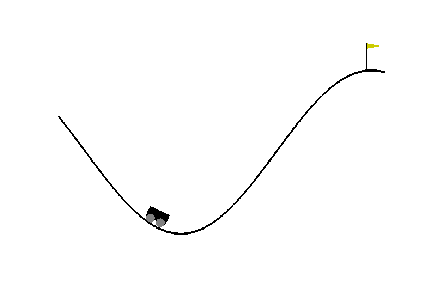
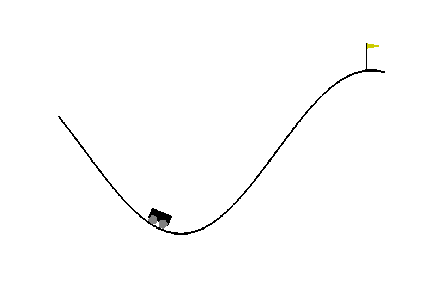
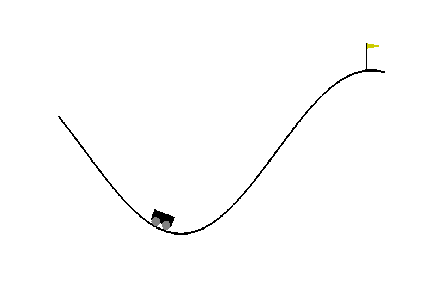
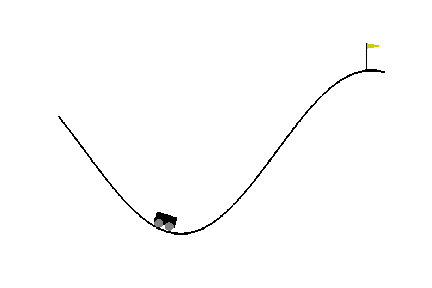
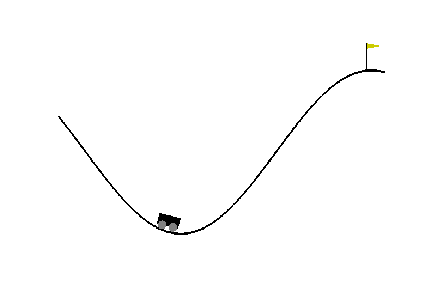
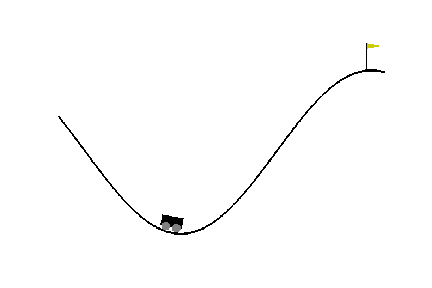
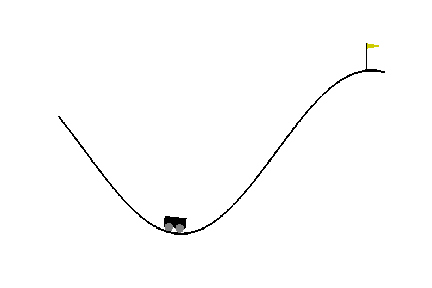
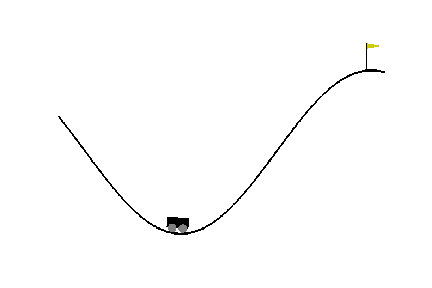
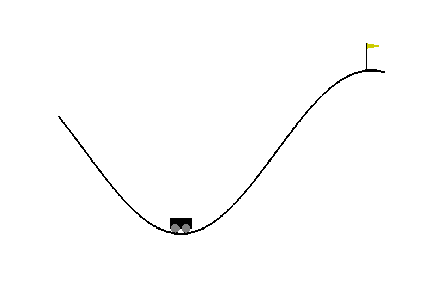

In [10]:
stat = e.train(qtf,plot=True)
e.test(qtf,gif=True)

### PyTorch

In [11]:
qtorch = QLearningTorch(learning_rate=0.01,
                   use_bias=True,featurizer=None,scaler=None)

Epsilon : 1.0, Num Steps : 199, Avg Reward with Window Size 100 : -200.0:   1%|          | 1/100 [00:00<00:14,  6.65it/s]

Model Created!


Epsilon : 3.7074446659261245e-44, Num Steps : 199, Avg Reward with Window Size 100 : -200.0: 100%|██████████| 100/100 [00:15<00:00,  6.46it/s]
/Users/shyam/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/shyam/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


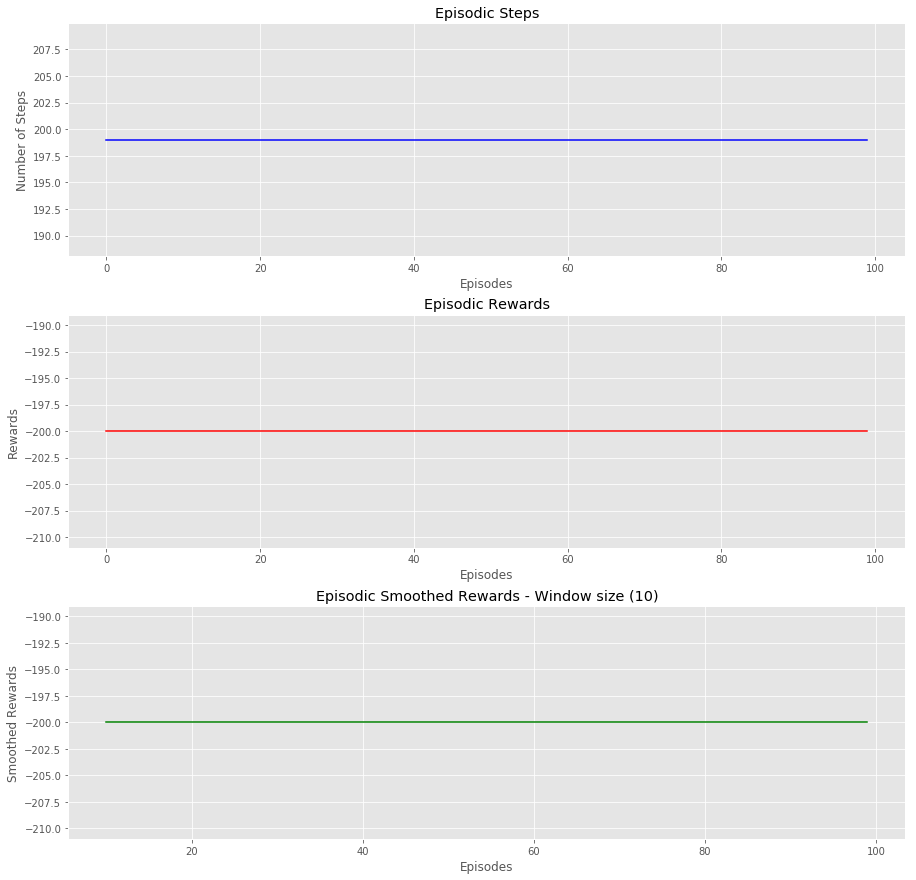

Total reward for episode 0: -200.0



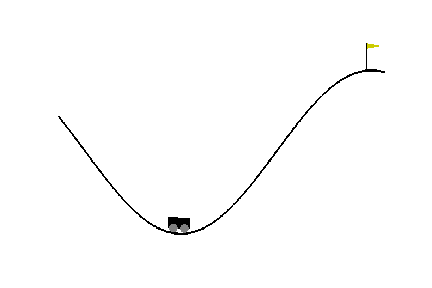
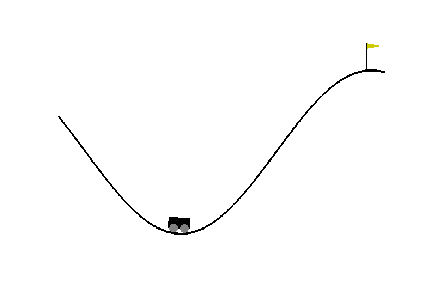
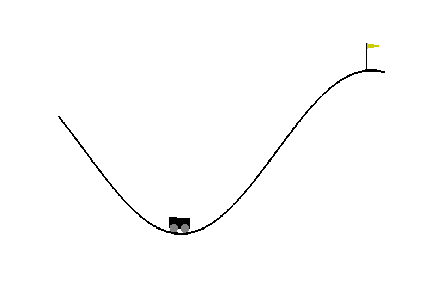
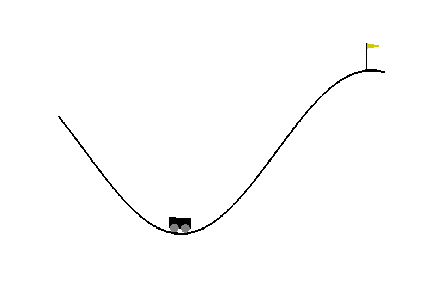
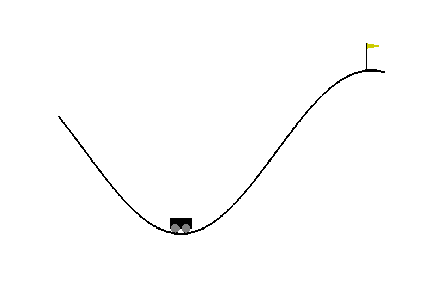
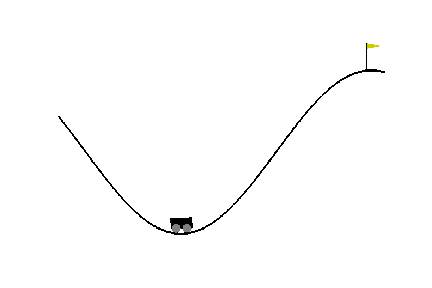
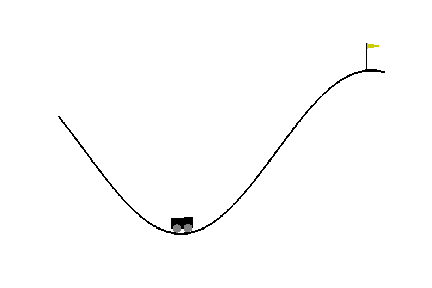
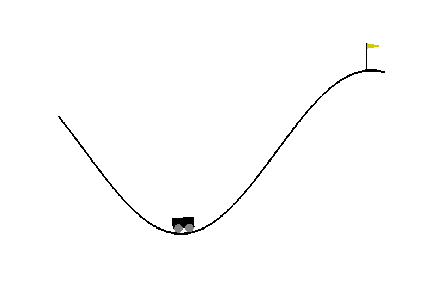
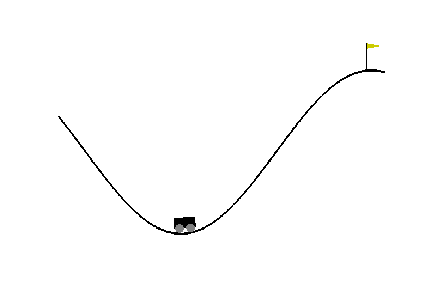
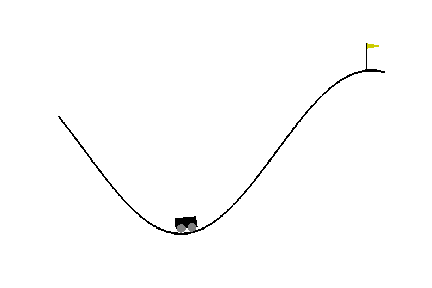
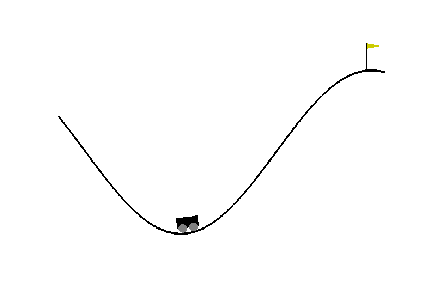
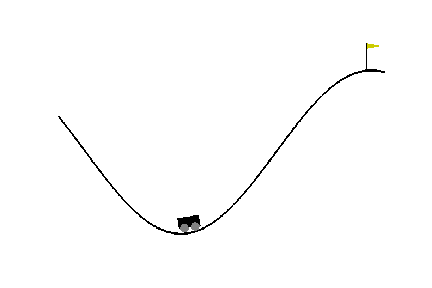
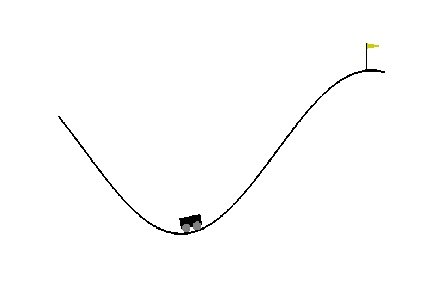
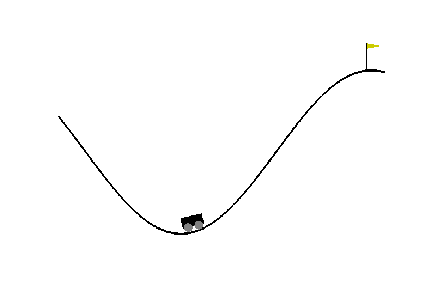
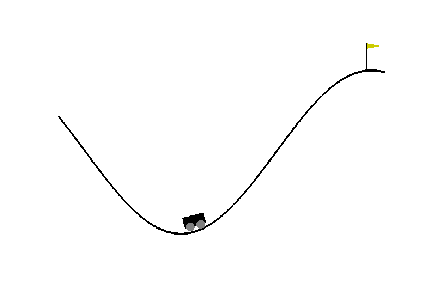
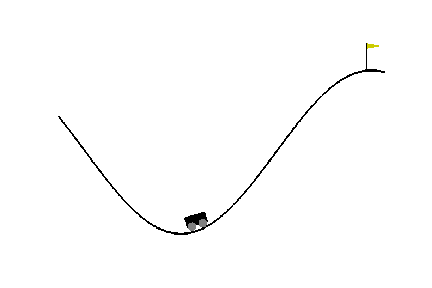
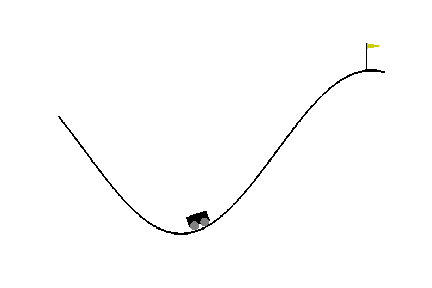
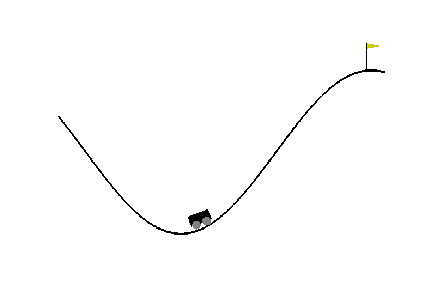
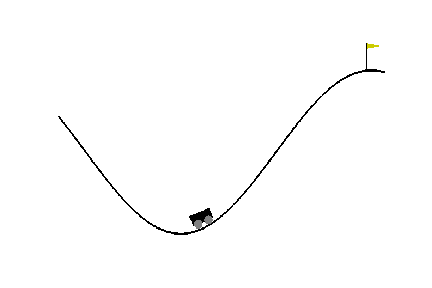
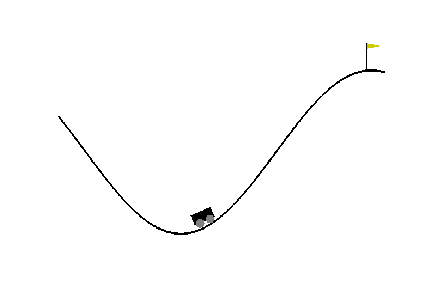
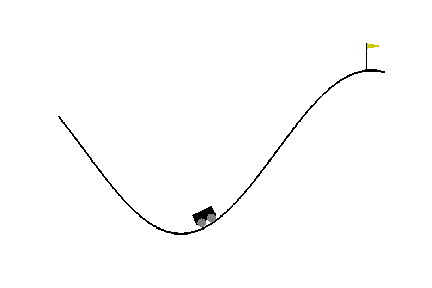
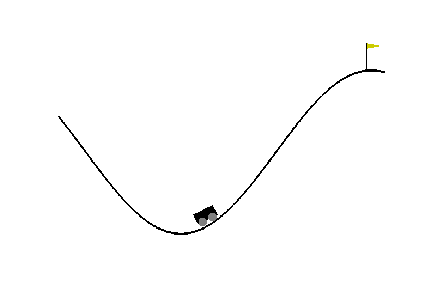
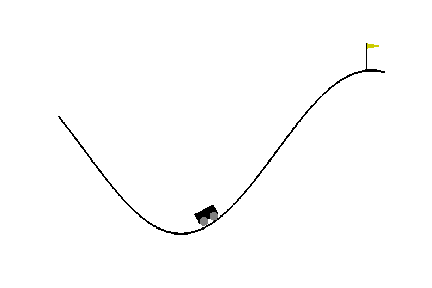
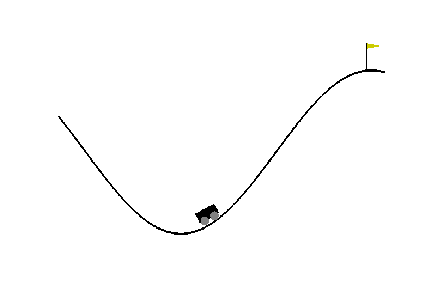
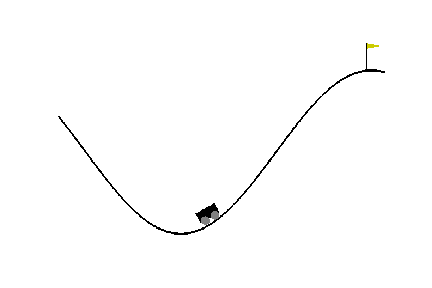
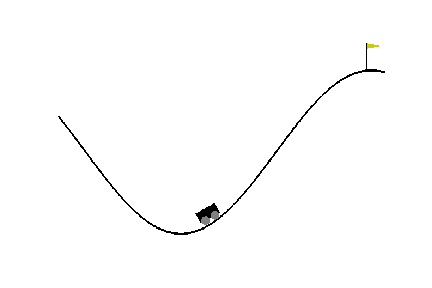
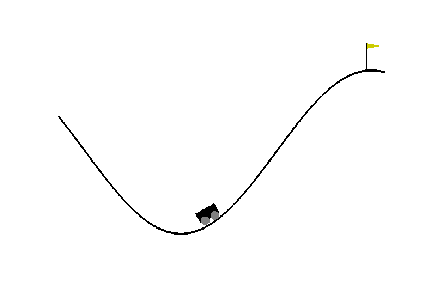
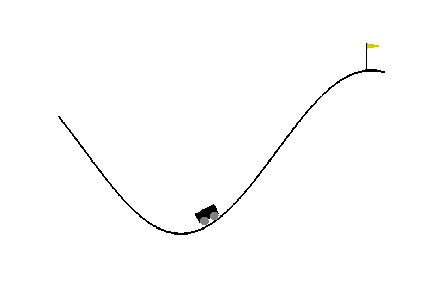
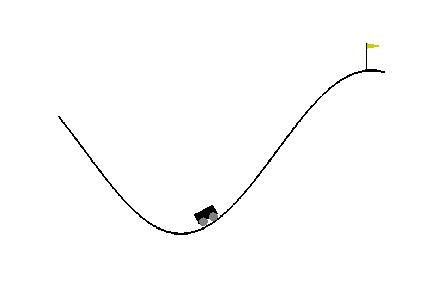
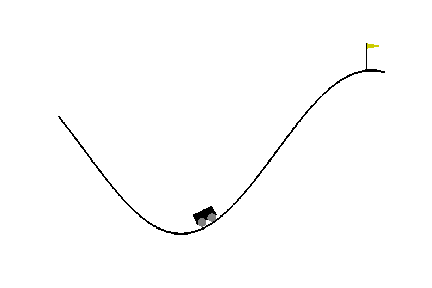
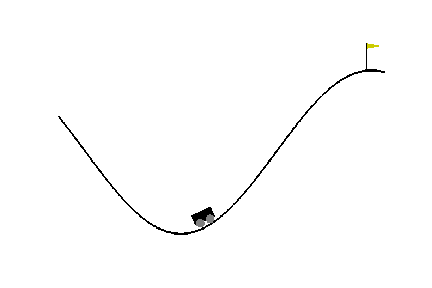
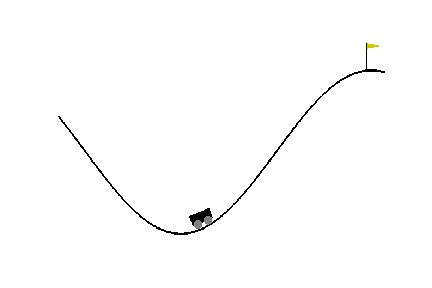
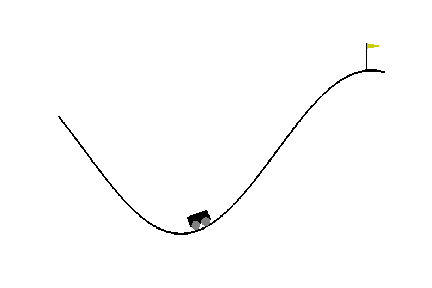
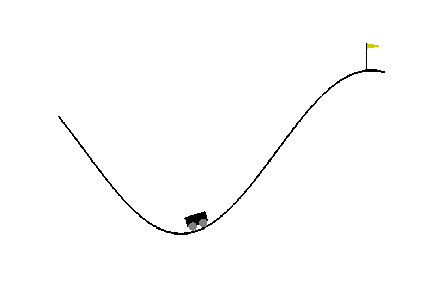
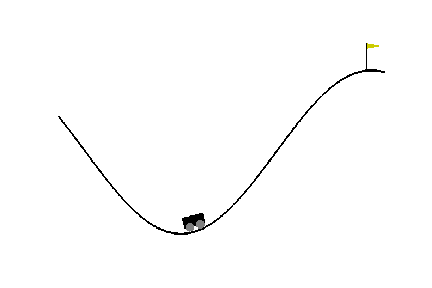
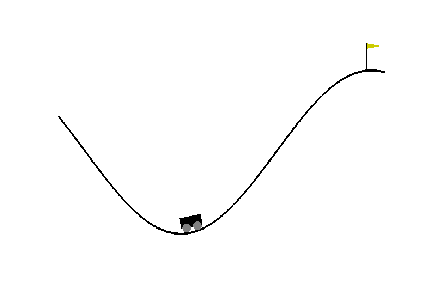
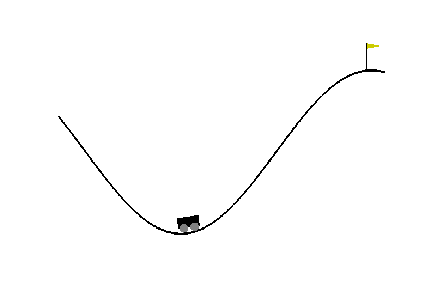
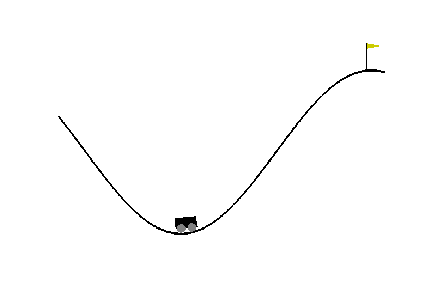
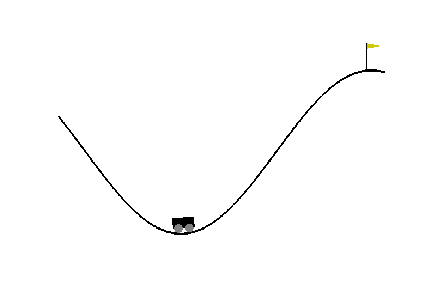
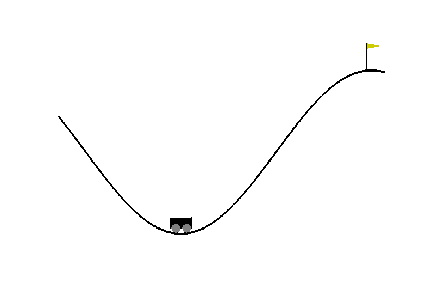
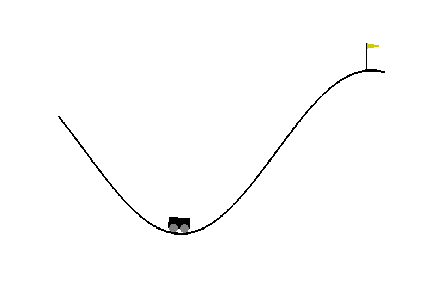
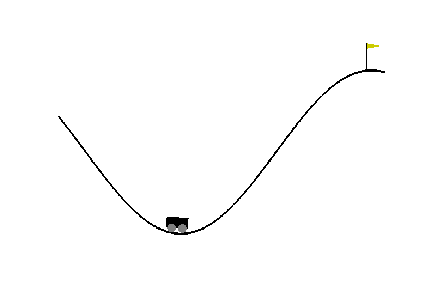
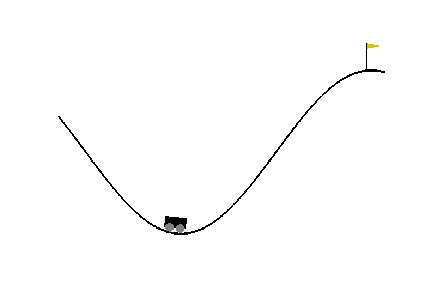
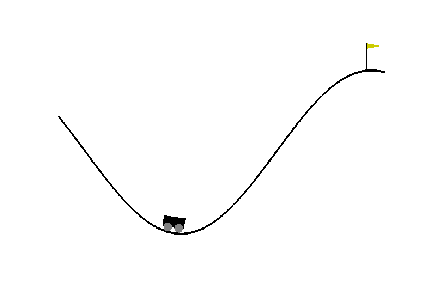
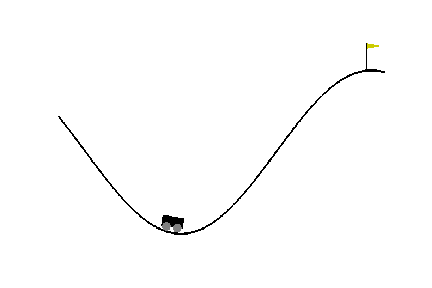
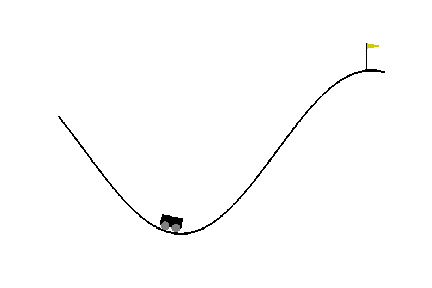
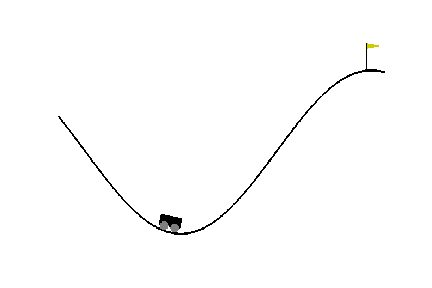
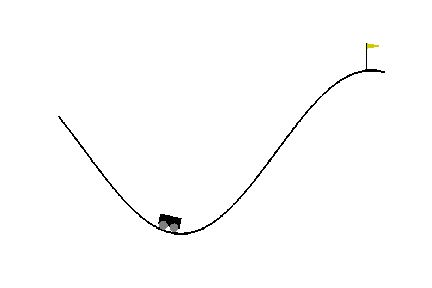
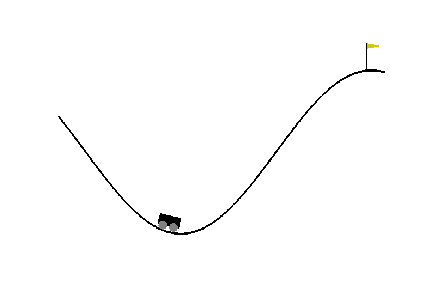
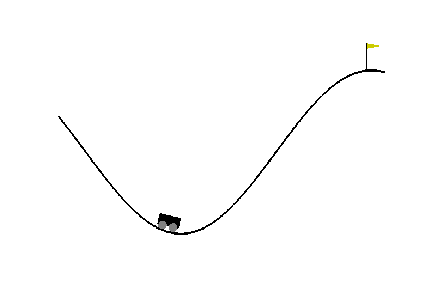
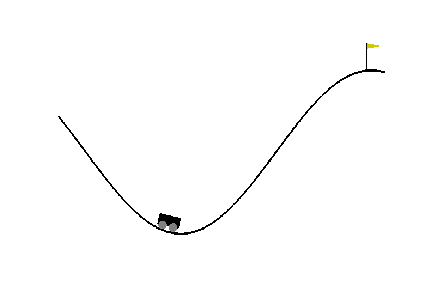
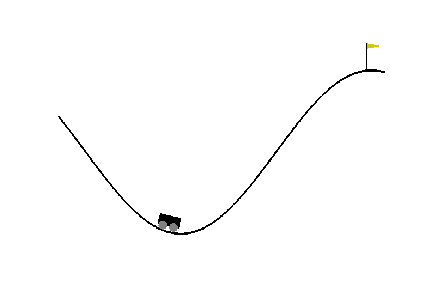
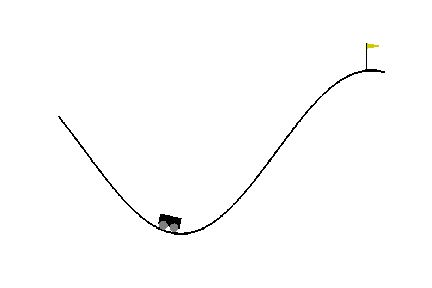
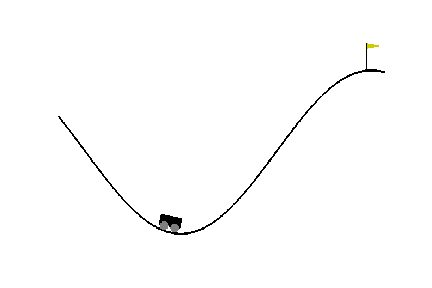
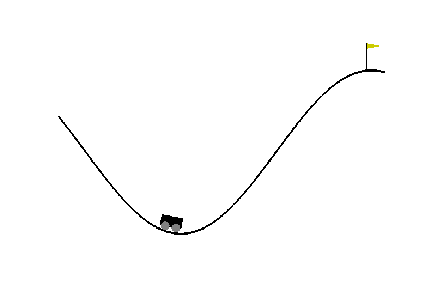
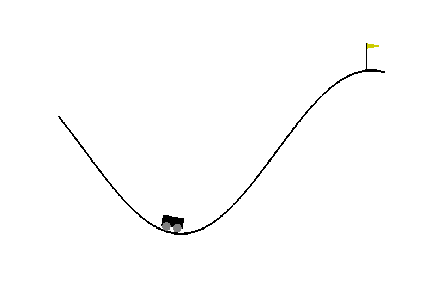
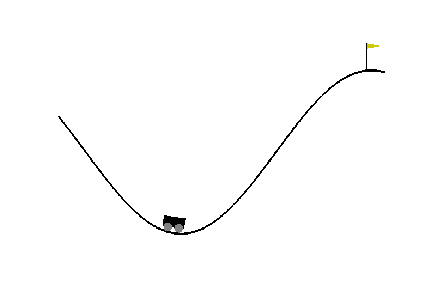
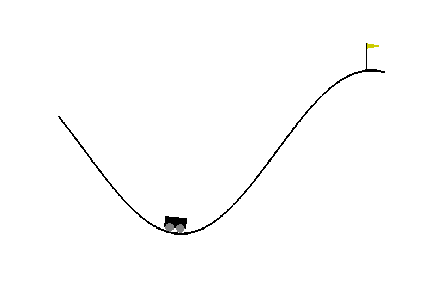
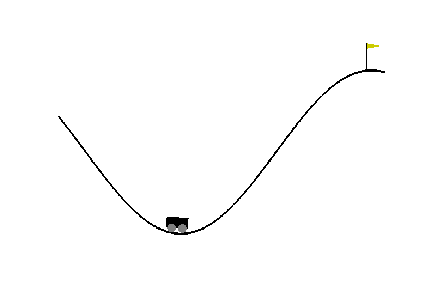
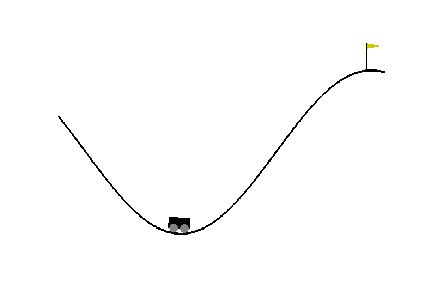
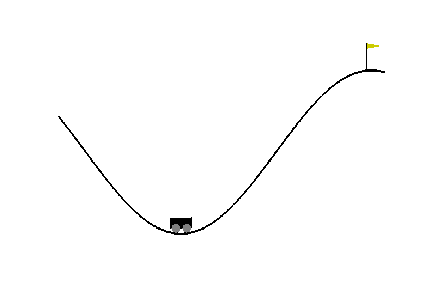
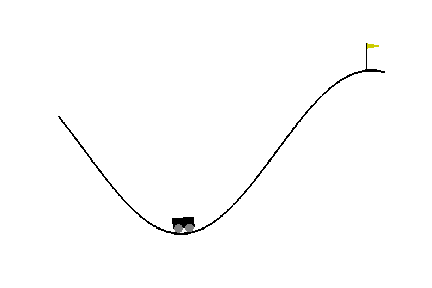
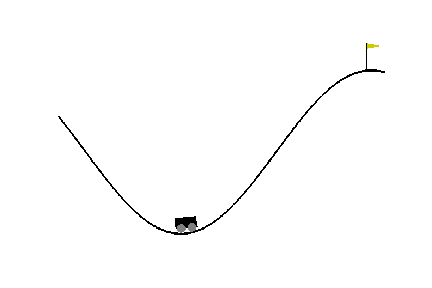
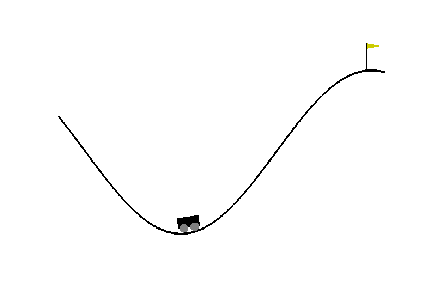
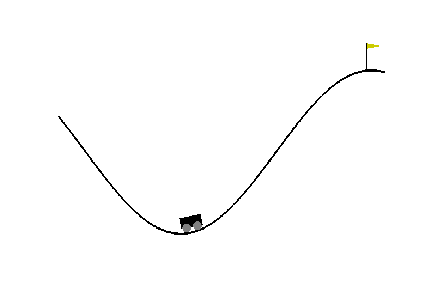
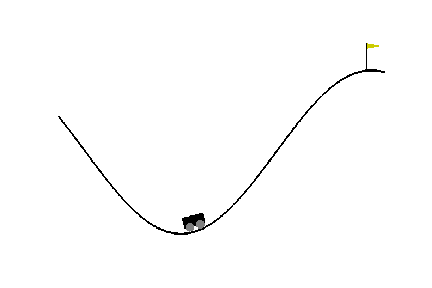
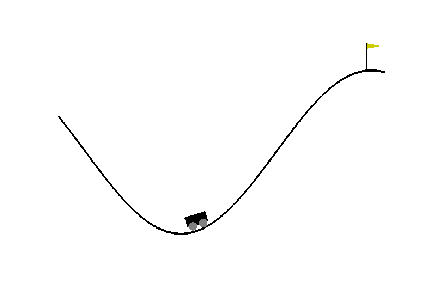
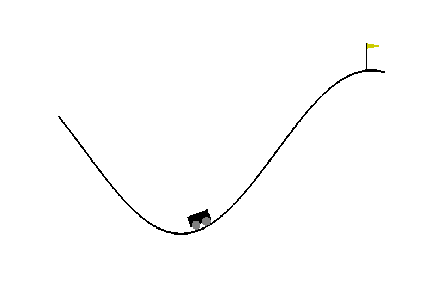
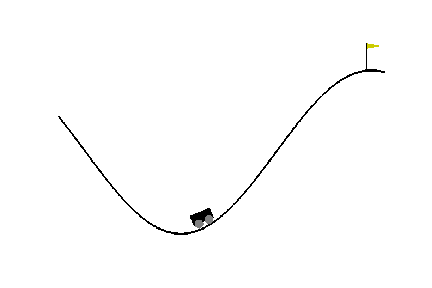
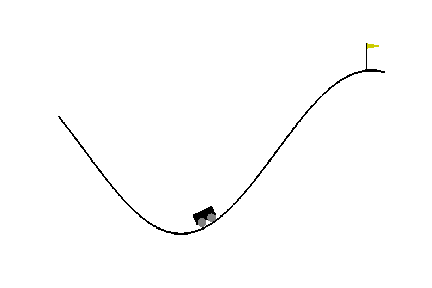
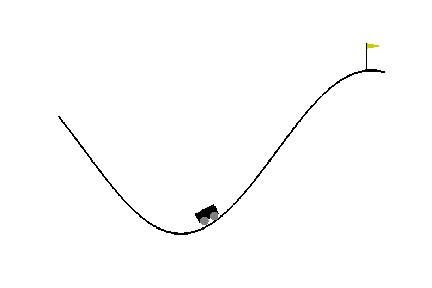
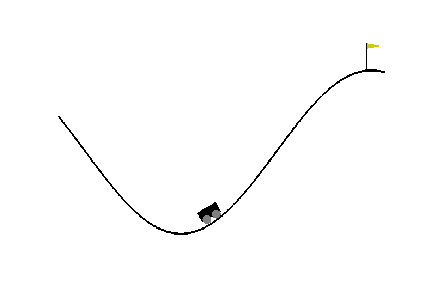
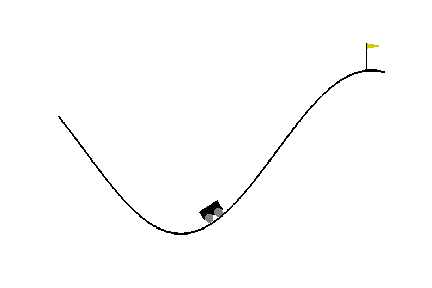
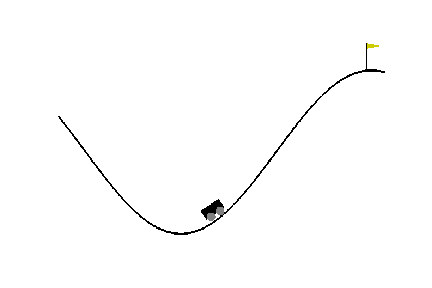
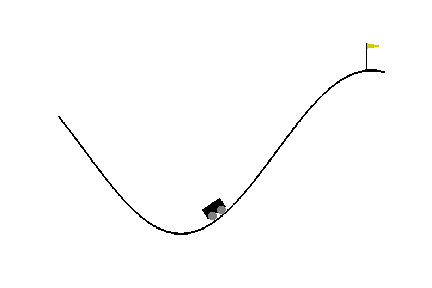
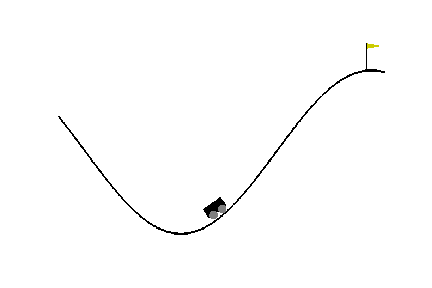
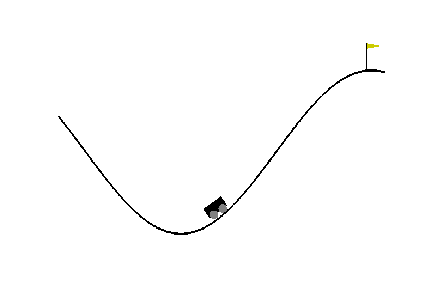
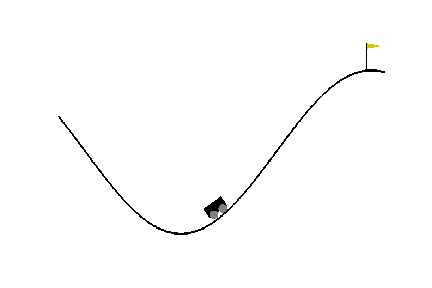
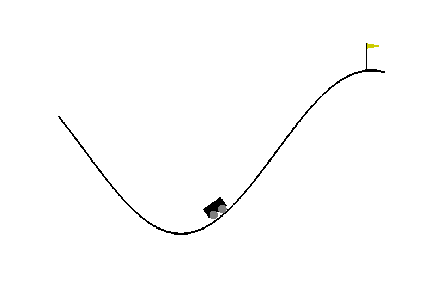
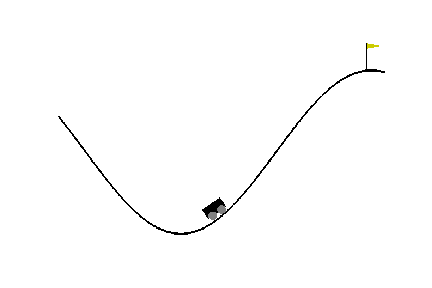
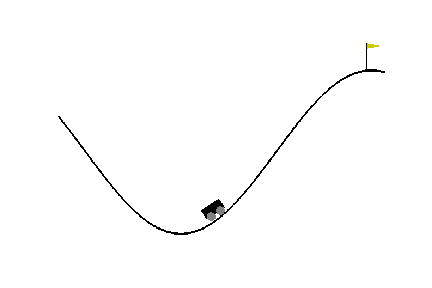
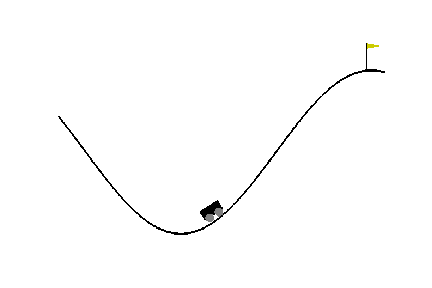
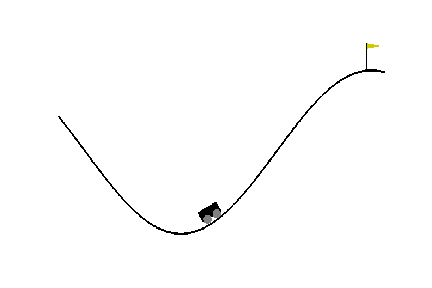
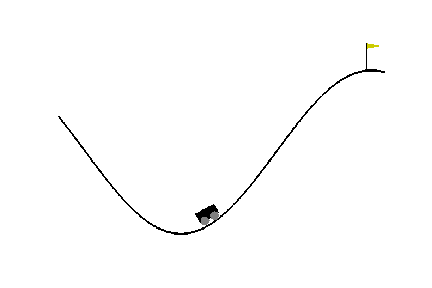
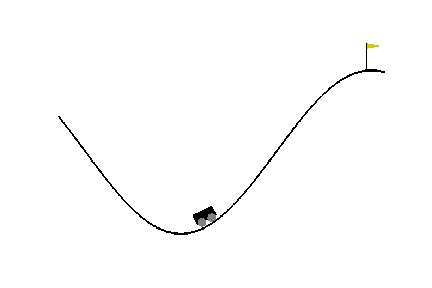
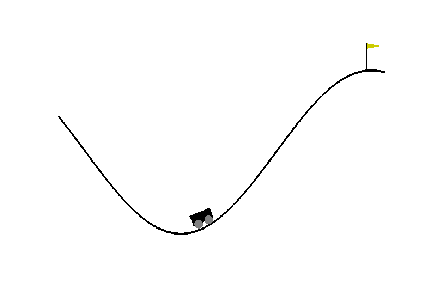
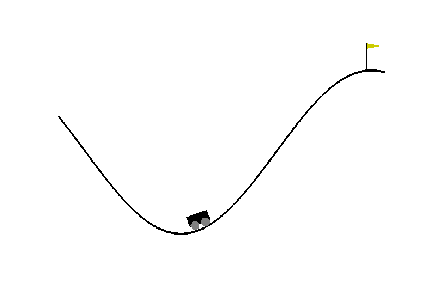
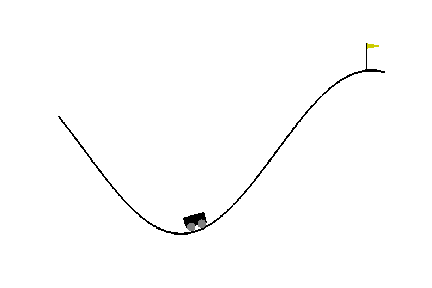
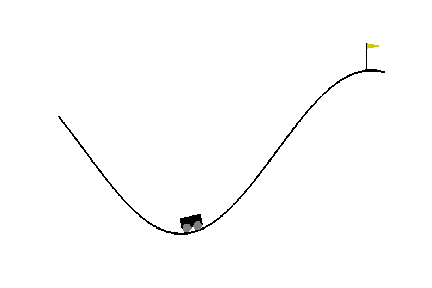
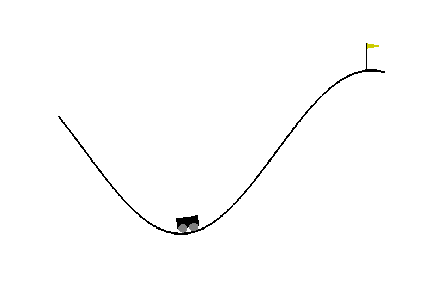
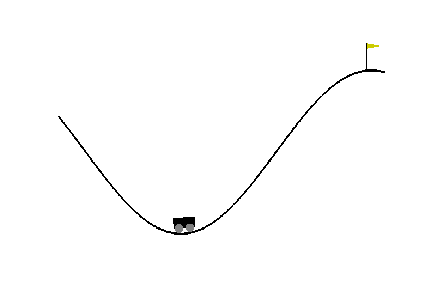
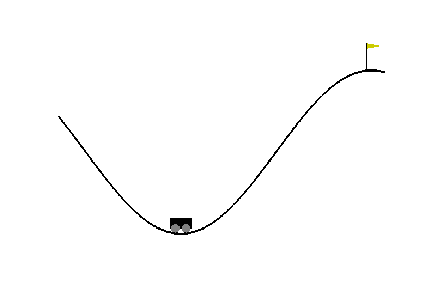
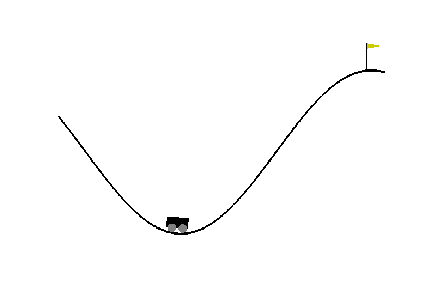
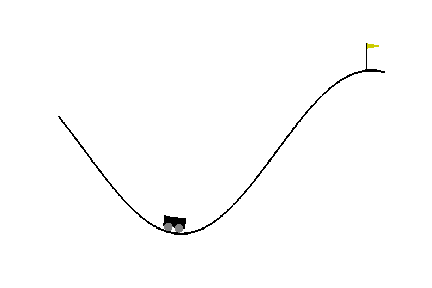
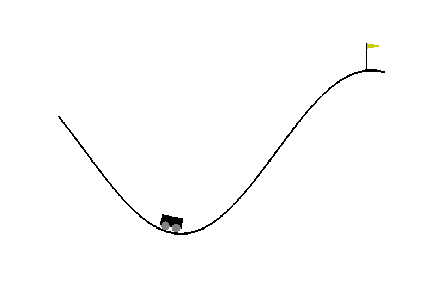
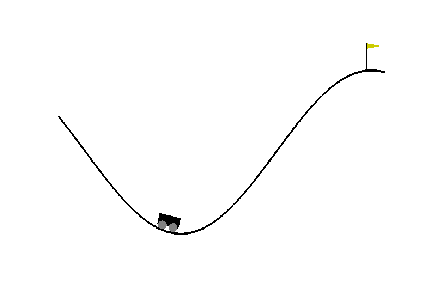
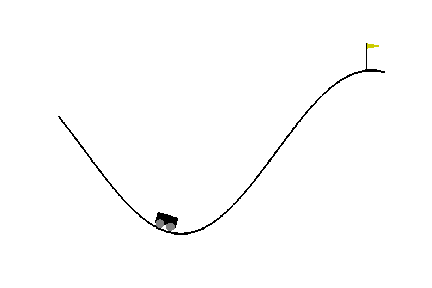
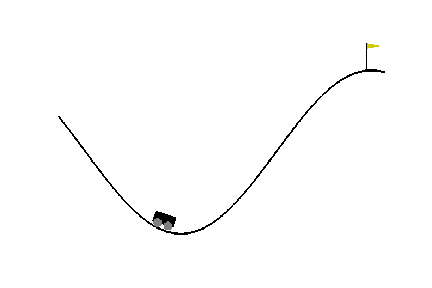
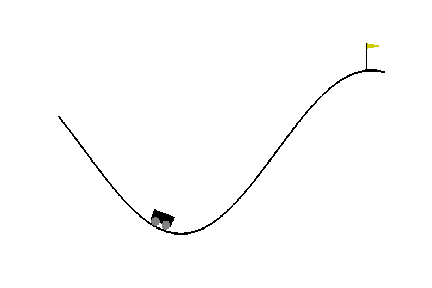
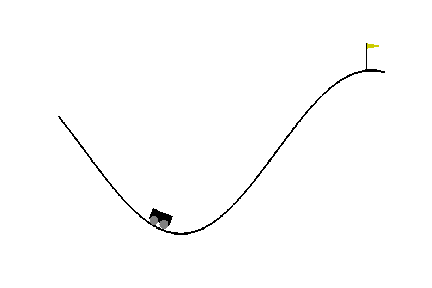
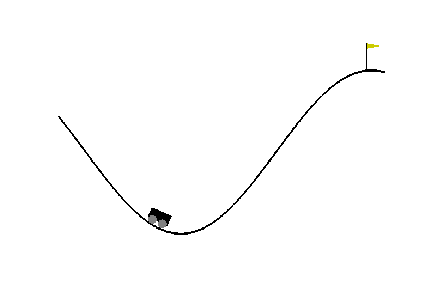
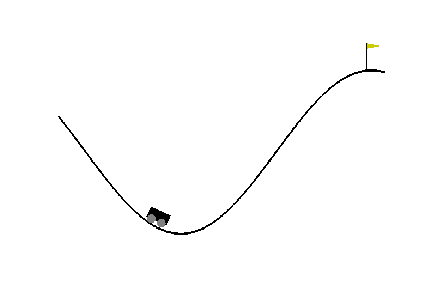
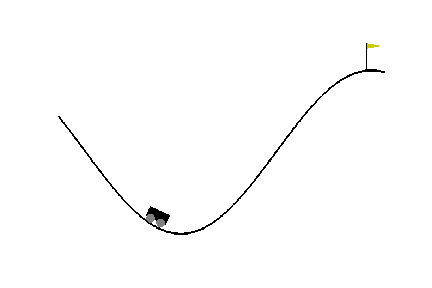
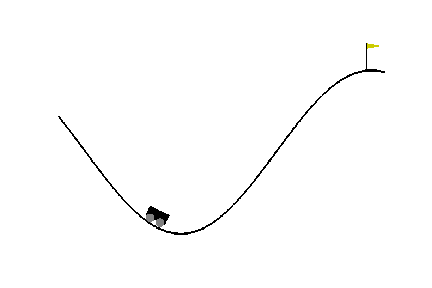
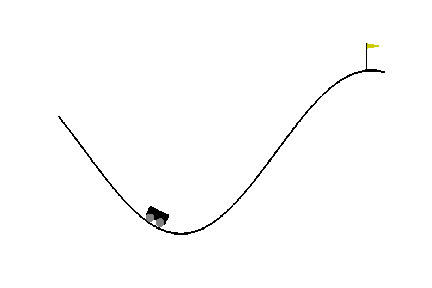
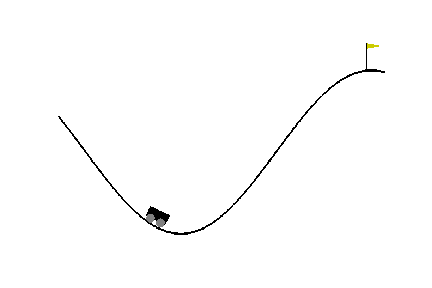
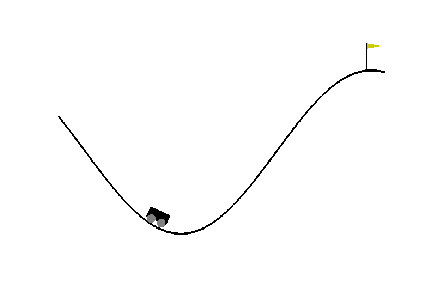
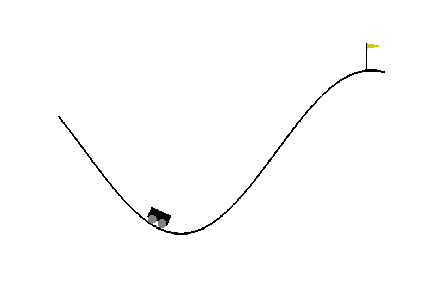
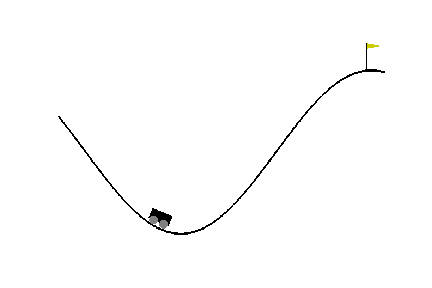
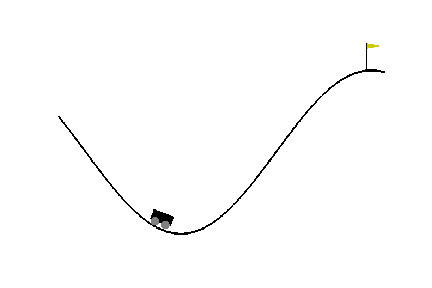
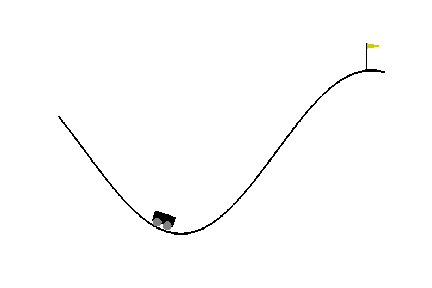
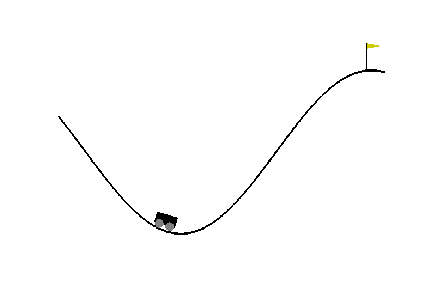
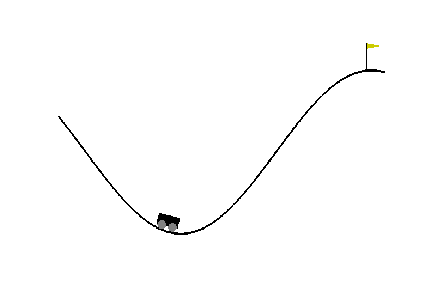
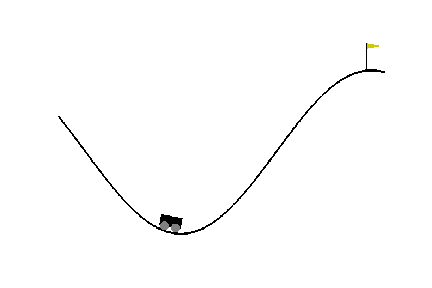
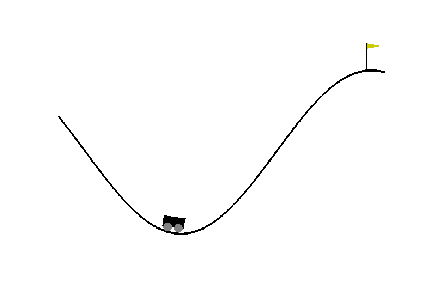
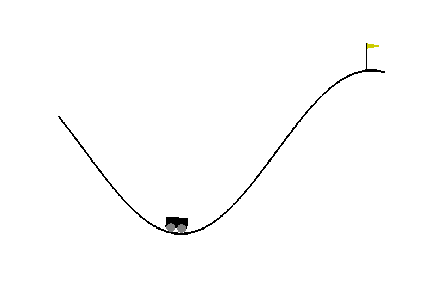
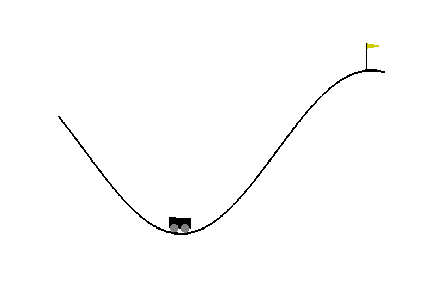
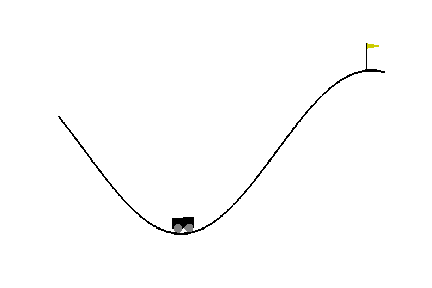
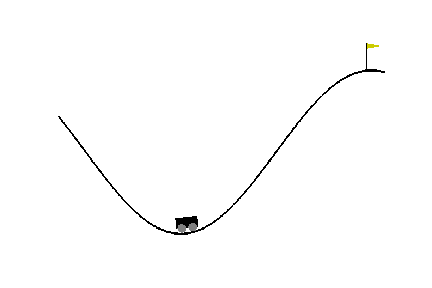
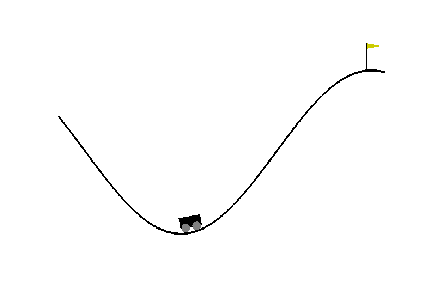
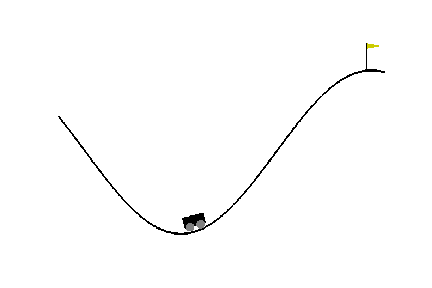
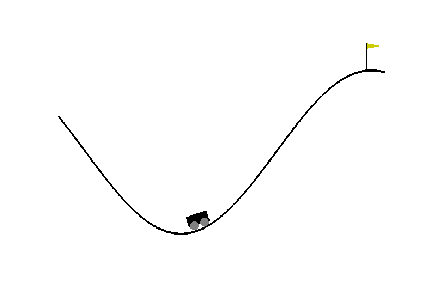
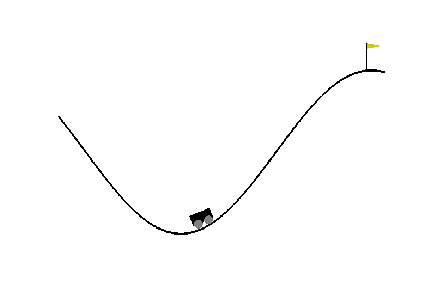
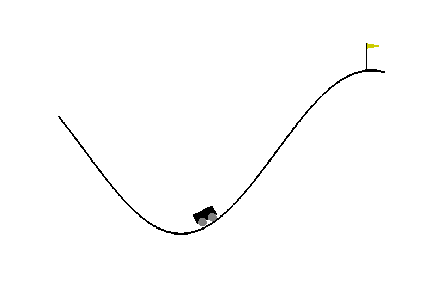
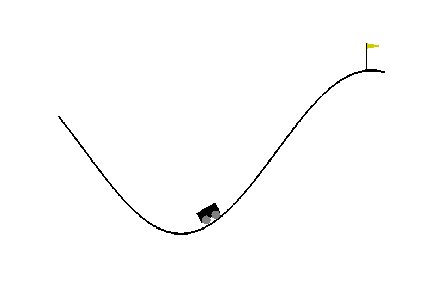
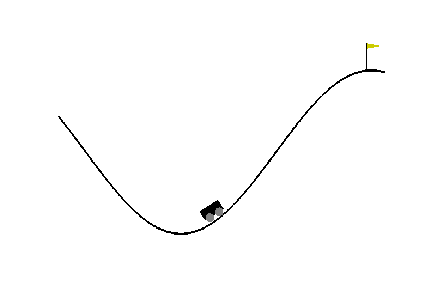
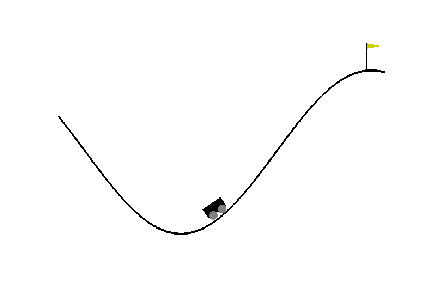
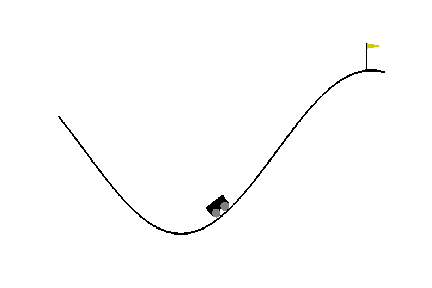
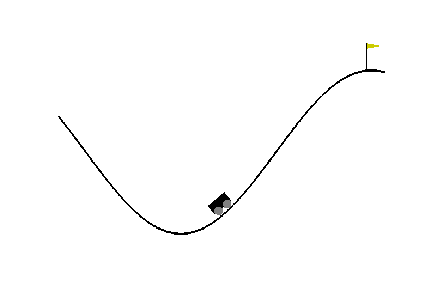
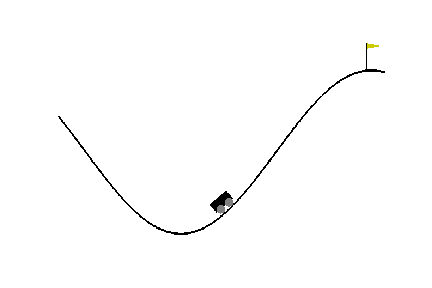
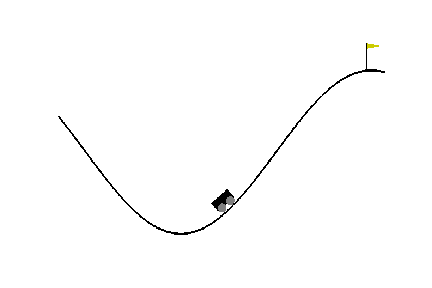
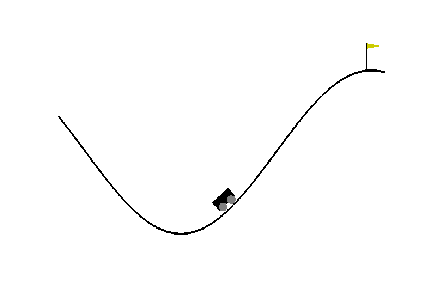
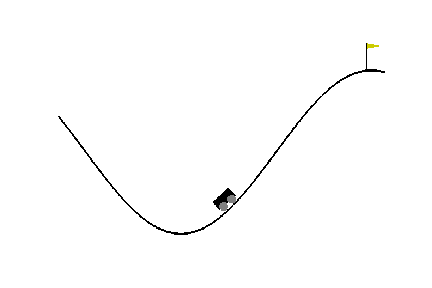
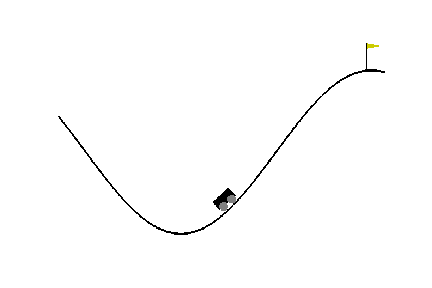
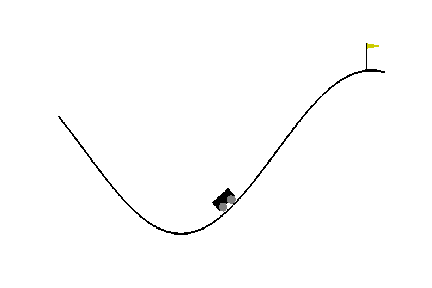
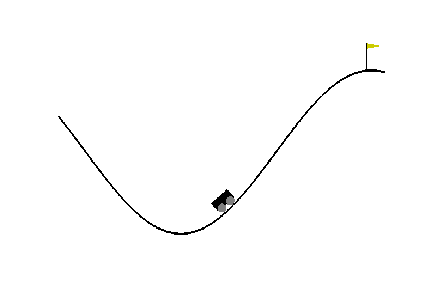
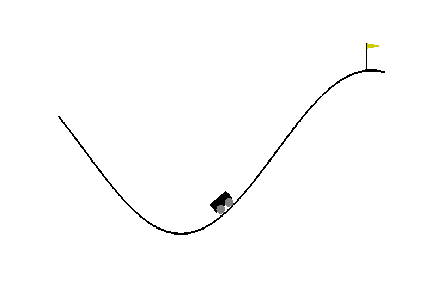
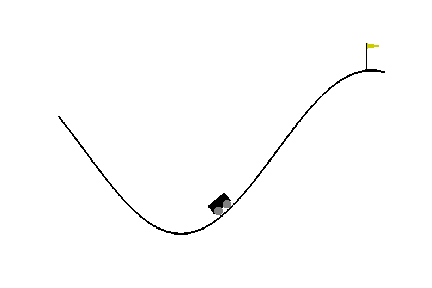
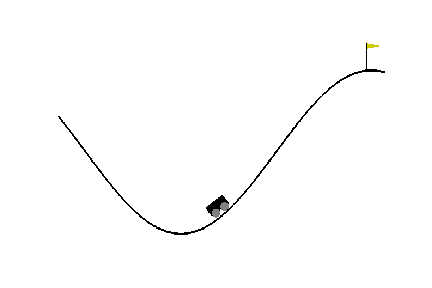
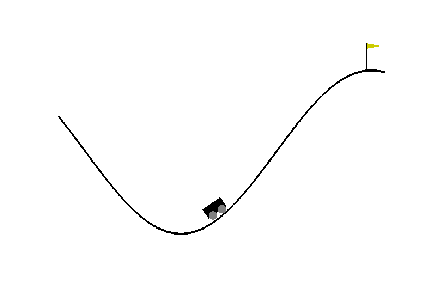
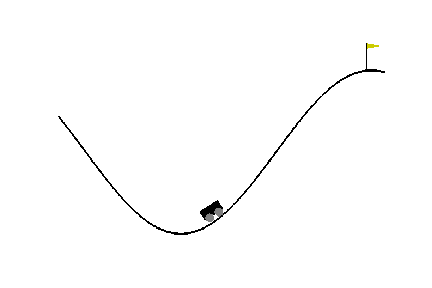
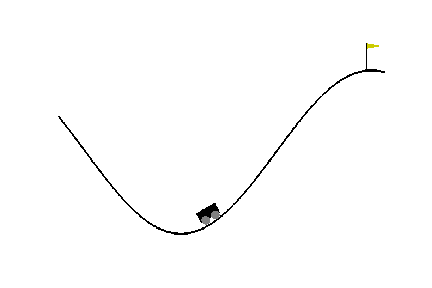
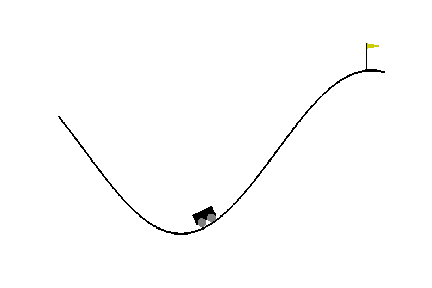
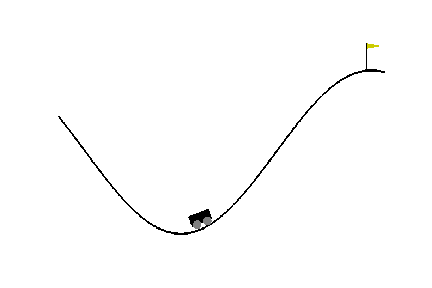
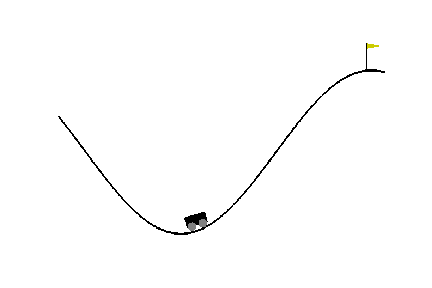
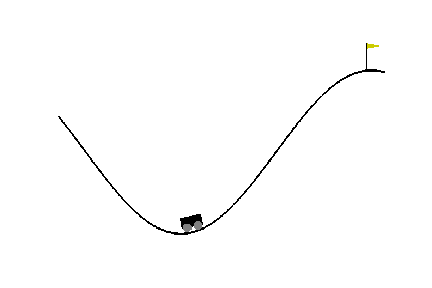
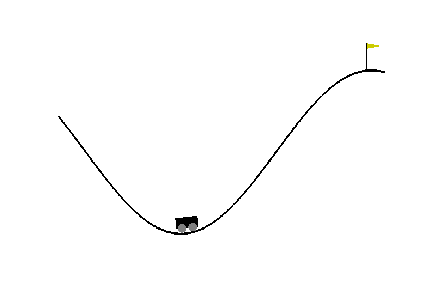
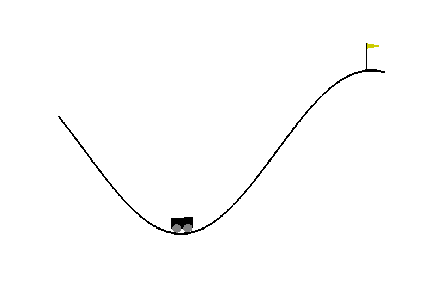
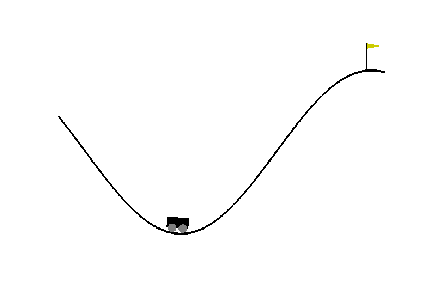
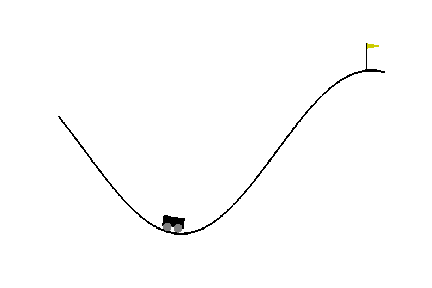
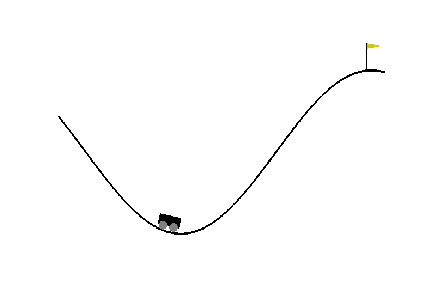
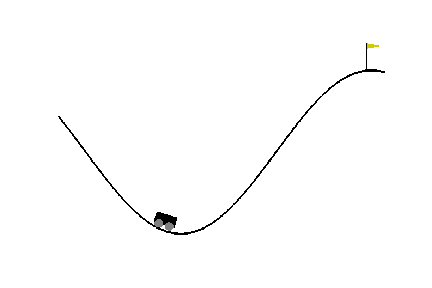
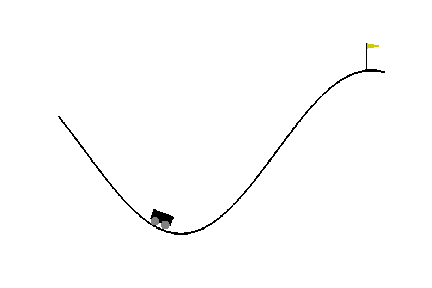
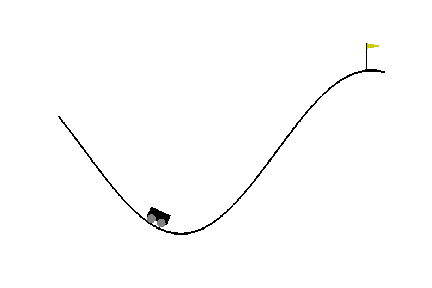
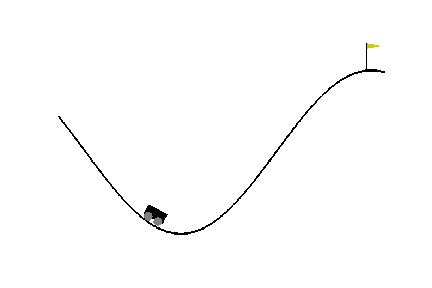
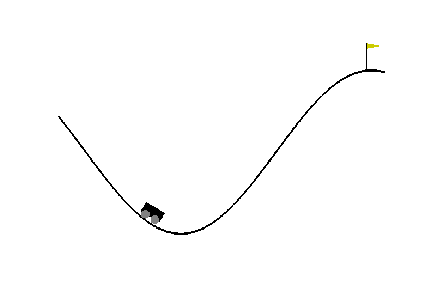
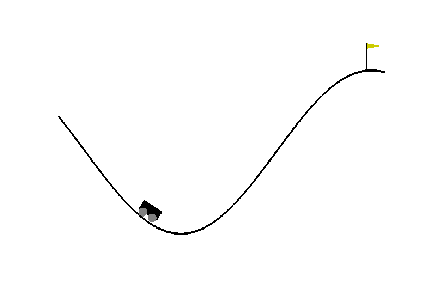
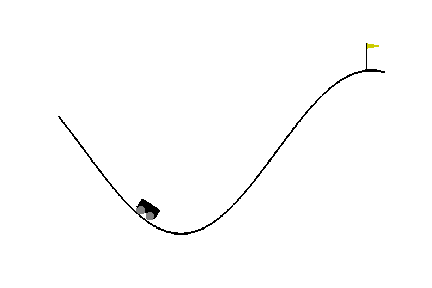
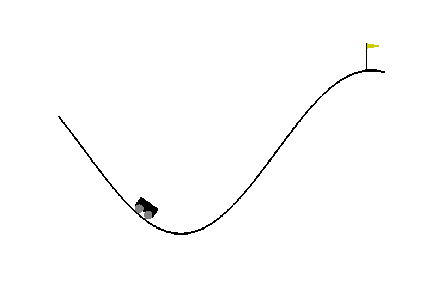
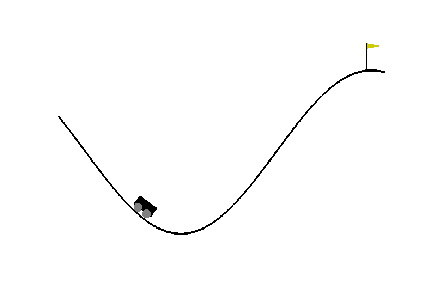
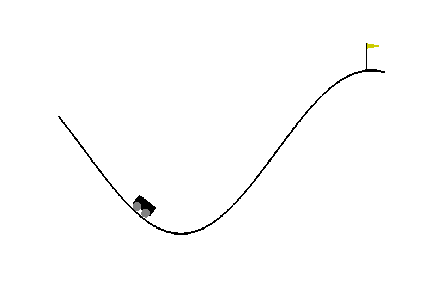
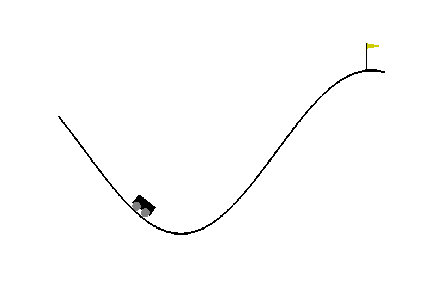
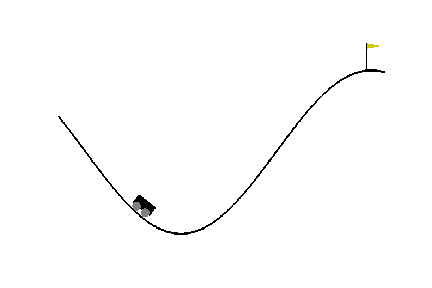
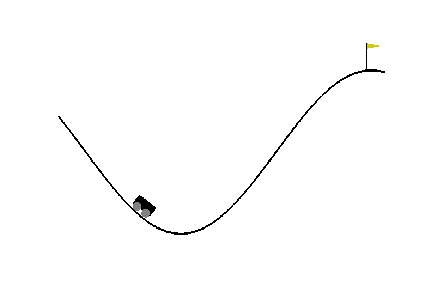
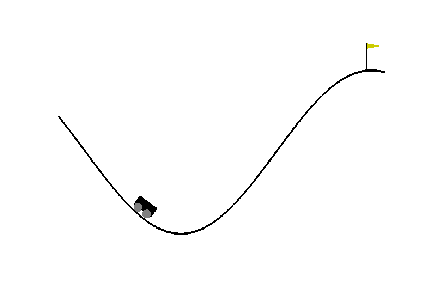
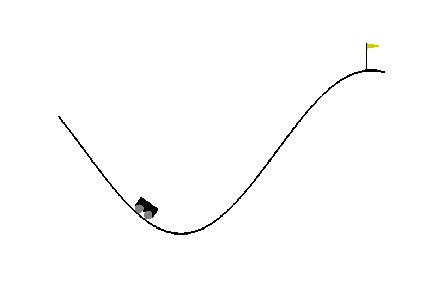
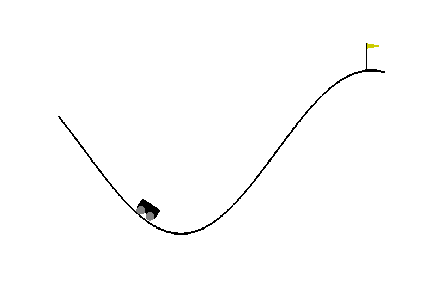
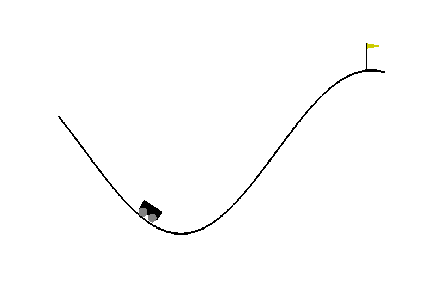
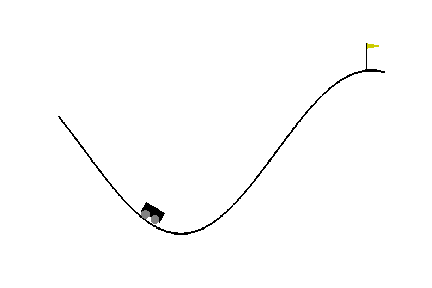
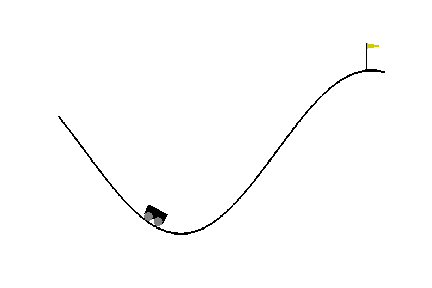
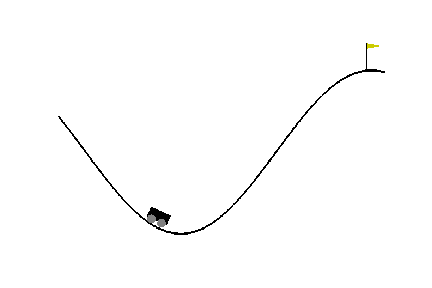
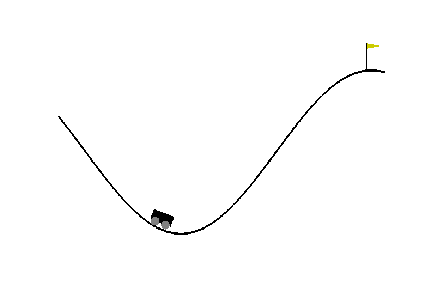
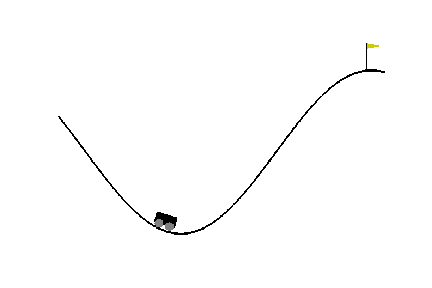
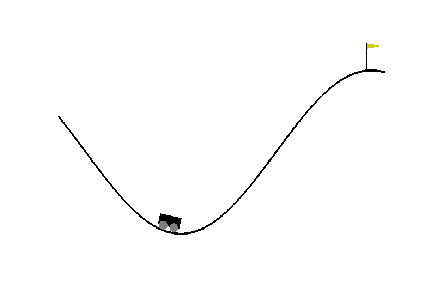
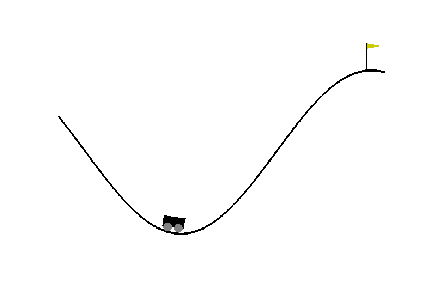
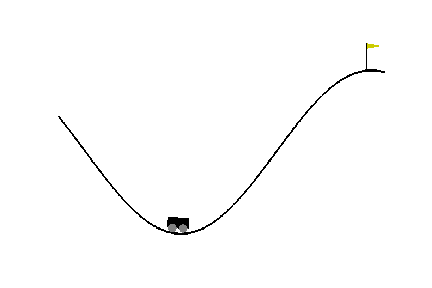
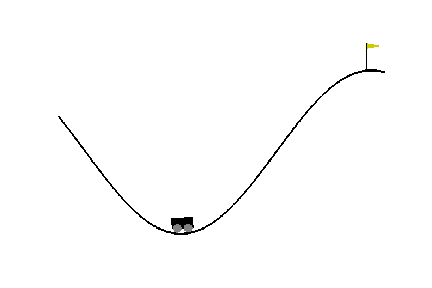
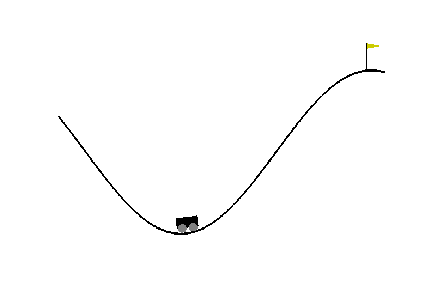
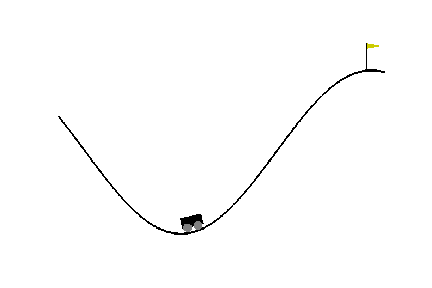
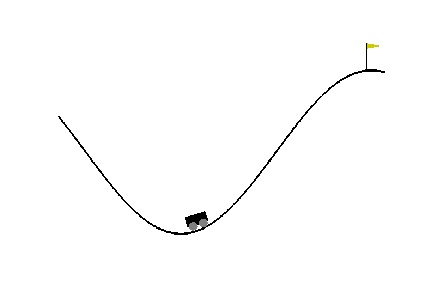
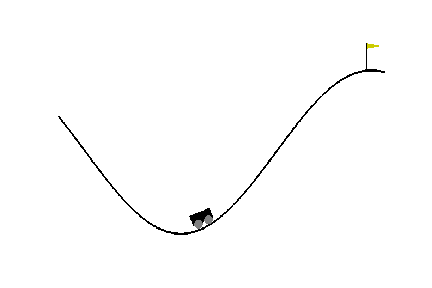
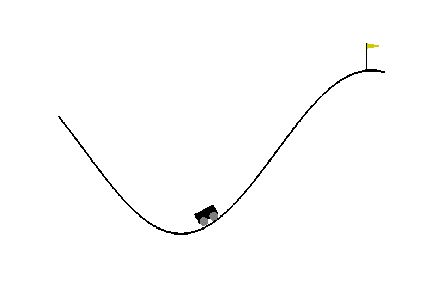
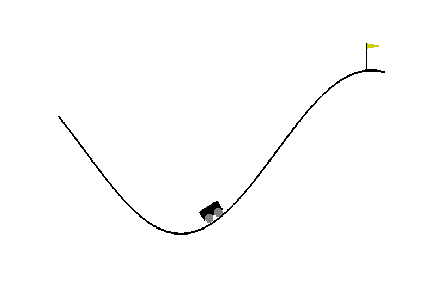
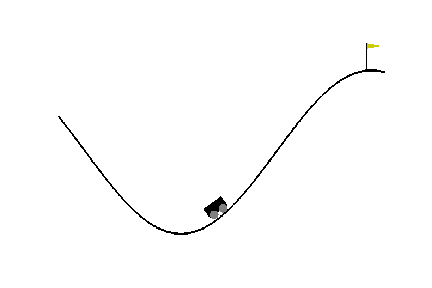
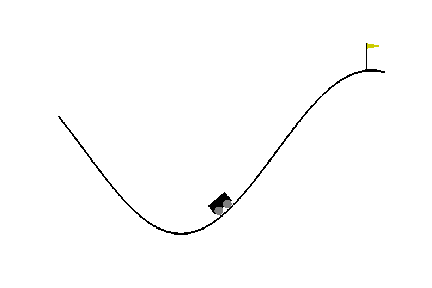
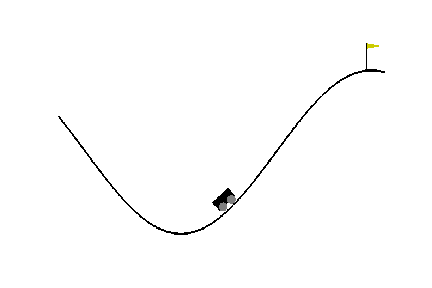
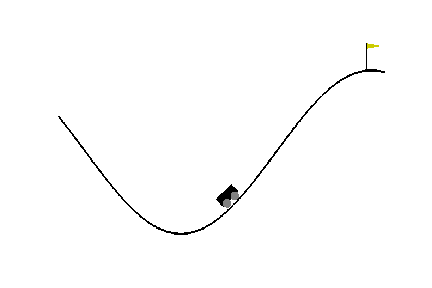
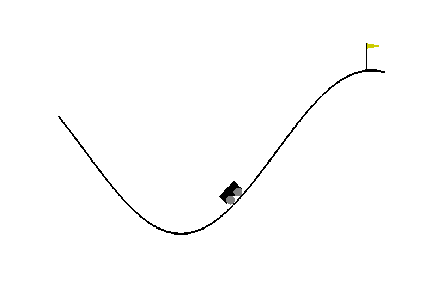
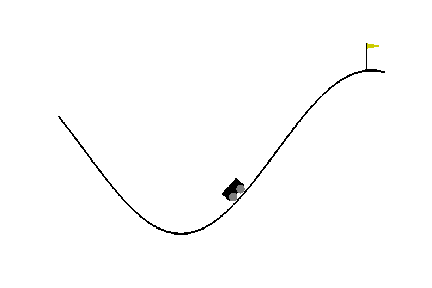
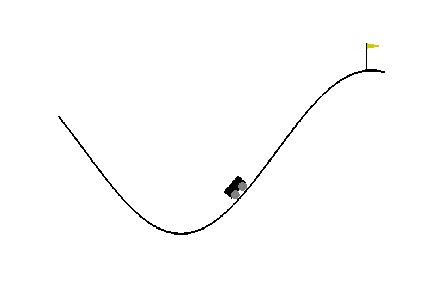
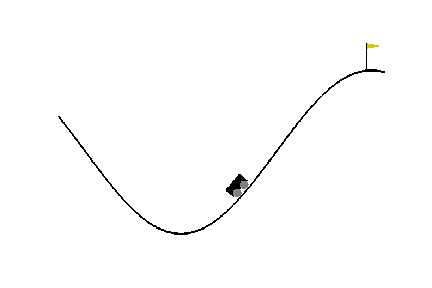
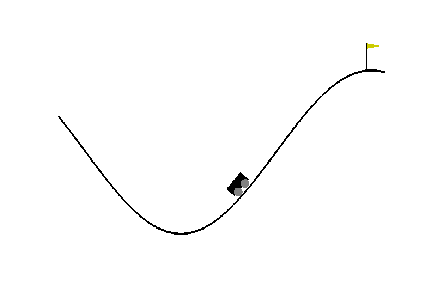
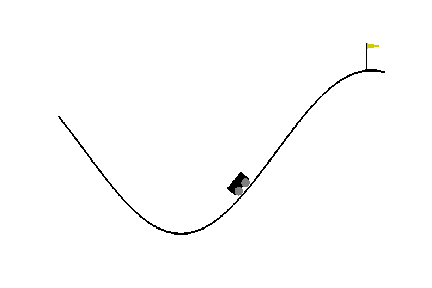
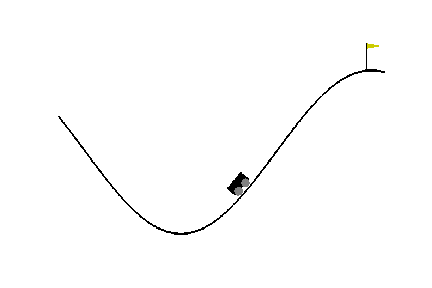
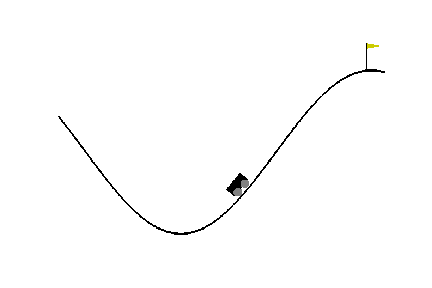
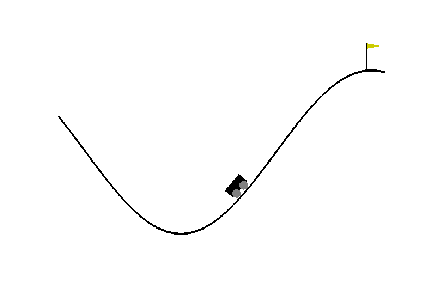
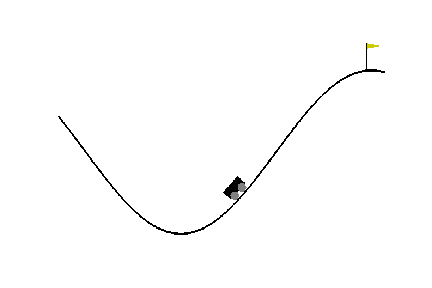
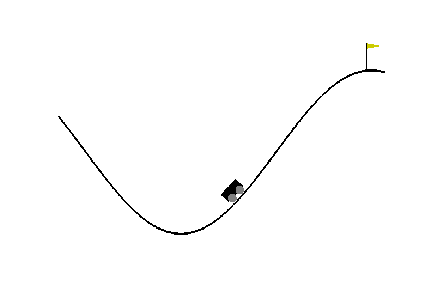
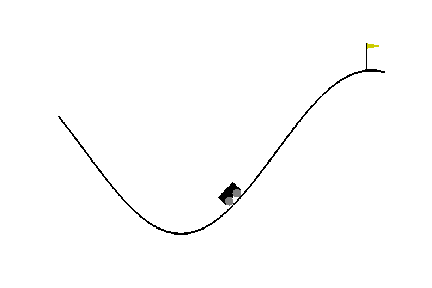
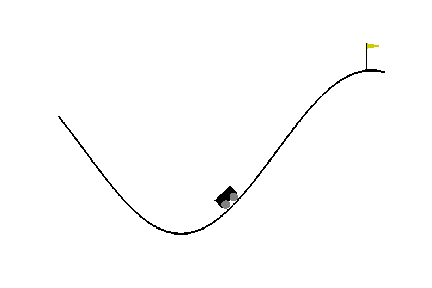

In [12]:
stat = e.train(qtorch,plot=True)
e.test(qtorch,gif=True)